### XGBoost

Let's try Kaggle's all time favorite: XGBoost. Maybe we get a score out of it.

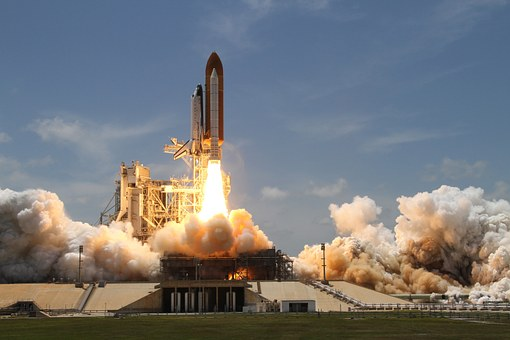

In [1]:
from xgboost import XGBClassifier
import preprocessing
import utils
import numpy as np
import pandas as pd

In [2]:
data = utils.get_dataset()

In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
%%capture
df = preprocessing.morten_preprocessing_pipeline(data)

In [5]:
columns = ["Responsiveness",
           "Recency",
           "Dt_Customer",
           "Income",
           "MntMeatProducts",
           "MntWines",
           "Partner",
           "MntGoldProds", 
           "MntSweetProducts",
           "Education",
           "MntFishProducts",
           "NumWebVisitsMonth",
           
           "Response"]

In [6]:
df = df[columns]

In [141]:
buying = ["MntMeatProducts","MntGoldProds", "MntSweetProducts", "MntFishProducts", "MntWines"]

In [142]:
df_buying = df[buying]

In [158]:
temp_df = df.drop(columns=["Response"])

In [159]:
%%capture
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp_df = scaler.fit_transform(temp_df)
#X_test = scaler.fit_transform(X_test)

In [160]:
##### from sklearn.decomposition import PCA
# try PCA
pca = PCA(n_components=5)
pca.fit(temp_df)
print(abs( pca.components_ ))
print(pca.explained_variance_ratio_)

[[ 0.00892471  0.00690182  0.01083776  0.00308163  0.04047167  0.02463879
   0.99737441  0.02448939  0.02541436  0.00453606  0.02760018  0.02677787]
 [ 0.17614559  0.03541888  0.04450527  0.06280675  0.45990377  0.40607329
   0.0708945   0.29201595  0.37218849  0.02482977  0.39494088  0.44717715]
 [ 0.00274335  0.15125428  0.87546995  0.01098758  0.01916671  0.11273123
   0.00901451  0.1484036   0.04541922  0.15626356  0.04025643  0.38374977]
 [ 0.03304912  0.98556807  0.13276761  0.00367704  0.01719556  0.05471532
   0.00304113  0.02528977  0.0053345   0.02617099  0.0312126   0.06554913]
 [ 0.11408231  0.0561135   0.1122334   0.01914974  0.02894327  0.31594733
   0.00223177  0.10595137  0.15999709  0.89248329  0.17901046  0.06936946]]
[ 0.29281691  0.21209969  0.12534271  0.10862458  0.08833514]


In [161]:
pca_s = pca.fit_transform(temp_df)

In [164]:
df_2 = df.drop(columns=columns)

In [165]:
df_2["PCA1"] = pca_s[:,0]
df_2["PCA2"] = pca_s[:,1]
df_2["PCA3"] = pca_s[:,2]
df_2["PCA4"] = pca_s[:,3]
df_2["PCA5"] = pca_s[:,4]
df_2["Response"] = df["Response"]

In [192]:
X_train, X_test, y_train, y_test = utils.data_split(df, 0.2)

In [205]:
df_analysis = pd.DataFrame(columns=["Colsample", "learning_rate", "Max_depth", "Profit"])

In [206]:
df_analysis

,Colsample,learning_rate,Max_depth,Profit


In [207]:
for colsample in range(1,10):
    colsample = colsample/10
    for learning_rate in range(1,100):
        learning_rate = learning_rate/100
        for depth in range(2,30):
        # fit model through training data
            i = i
            model = XGBClassifier(colsample_by_tree=colsample,
                                  learning_rate=learning_rate,
                                  max_depth=depth,
                               n_estimators=1000000,
                                  eval_metric="auc",
                                  scale_pos_weight=np.sum(y_train==0)/np.sum(y_train==1),
                                  n_jobs=4, silent=0, verbose=1)
            model.fit(X_train, y_train,
                      eval_set=[(X_train, y_train), (X_test, y_test)],
                     verbose=False, early_stopping_rounds=20)
            y_pred = model.predict(X_test)
            print("Colsample:", colsample, " learning_rate: ",learning_rate, " Max_depth:", depth, "Profit:", utils.profit_share(y_pred, y_test))
            df_analysis = df_analysis.append({"Colsample":colsample, "learning_rate":learning_rate, "Max_depth":depth, "Profit":utils.profit_share(y_pred, y_test)}, ignore_index=True)

Colsample: 0.1  learning_rate:  0.01  Max_depth: 2 Profit: 0.22
Colsample: 0.1  learning_rate:  0.01  Max_depth: 3 Profit: 0.41
Colsample: 0.1  learning_rate:  0.01  Max_depth: 4 Profit: 0.39
Colsample: 0.1  learning_rate:  0.01  Max_depth: 5 Profit: 0.41
Colsample: 0.1  learning_rate:  0.01  Max_depth: 6 Profit: 0.34
Colsample: 0.1  learning_rate:  0.01  Max_depth: 7 Profit: 0.27
Colsample: 0.1  learning_rate:  0.01  Max_depth: 8 Profit: 0.3
Colsample: 0.1  learning_rate:  0.01  Max_depth: 9 Profit: 0.3
Colsample: 0.1  learning_rate:  0.01  Max_depth: 10 Profit: 0.3
Colsample: 0.1  learning_rate:  0.01  Max_depth: 11 Profit: 0.26
Colsample: 0.1  learning_rate:  0.01  Max_depth: 12 Profit: 0.26
Colsample: 0.1  learning_rate:  0.01  Max_depth: 13 Profit: 0.26
Colsample: 0.1  learning_rate:  0.01  Max_depth: 14 Profit: 0.26
Colsample: 0.1  learning_rate:  0.01  Max_depth: 15 Profit: 0.26
Colsample: 0.1  learning_rate:  0.01  Max_depth: 16 Profit: 0.26
Colsample: 0.1  learning_rate:  0.01

Colsample: 0.1  learning_rate:  0.05  Max_depth: 17 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 18 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 19 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 20 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 21 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 22 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 23 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 24 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 25 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 26 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 27 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 28 Profit: 0.26
Colsample: 0.1  learning_rate:  0.05  Max_depth: 29 Profit: 0.26
Colsample: 0.1  learning_rate:  0.06  Max_depth: 2 Profit: 0.4
Colsample: 0.1  learning_rate:  0.06  Max_depth: 3 Profit: 0.41
Colsample: 0.1  learning_rat

Colsample: 0.1  learning_rate:  0.1  Max_depth: 5 Profit: 0.41
Colsample: 0.1  learning_rate:  0.1  Max_depth: 6 Profit: 0.43
Colsample: 0.1  learning_rate:  0.1  Max_depth: 7 Profit: 0.41
Colsample: 0.1  learning_rate:  0.1  Max_depth: 8 Profit: 0.41
Colsample: 0.1  learning_rate:  0.1  Max_depth: 9 Profit: 0.38
Colsample: 0.1  learning_rate:  0.1  Max_depth: 10 Profit: 0.4
Colsample: 0.1  learning_rate:  0.1  Max_depth: 11 Profit: 0.39
Colsample: 0.1  learning_rate:  0.1  Max_depth: 12 Profit: 0.39
Colsample: 0.1  learning_rate:  0.1  Max_depth: 13 Profit: 0.38
Colsample: 0.1  learning_rate:  0.1  Max_depth: 14 Profit: 0.37
Colsample: 0.1  learning_rate:  0.1  Max_depth: 15 Profit: 0.36
Colsample: 0.1  learning_rate:  0.1  Max_depth: 16 Profit: 0.38
Colsample: 0.1  learning_rate:  0.1  Max_depth: 17 Profit: 0.38
Colsample: 0.1  learning_rate:  0.1  Max_depth: 18 Profit: 0.38
Colsample: 0.1  learning_rate:  0.1  Max_depth: 19 Profit: 0.38
Colsample: 0.1  learning_rate:  0.1  Max_depth

Colsample: 0.1  learning_rate:  0.14  Max_depth: 21 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 22 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 23 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 24 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 25 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 26 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 27 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 28 Profit: 0.34
Colsample: 0.1  learning_rate:  0.14  Max_depth: 29 Profit: 0.34
Colsample: 0.1  learning_rate:  0.15  Max_depth: 2 Profit: 0.42
Colsample: 0.1  learning_rate:  0.15  Max_depth: 3 Profit: 0.4
Colsample: 0.1  learning_rate:  0.15  Max_depth: 4 Profit: 0.4
Colsample: 0.1  learning_rate:  0.15  Max_depth: 5 Profit: 0.44
Colsample: 0.1  learning_rate:  0.15  Max_depth: 6 Profit: 0.43
Colsample: 0.1  learning_rate:  0.15  Max_depth: 7 Profit: 0.41
Colsample: 0.1  learning_rate:  0

Colsample: 0.1  learning_rate:  0.19  Max_depth: 9 Profit: 0.43
Colsample: 0.1  learning_rate:  0.19  Max_depth: 10 Profit: 0.42
Colsample: 0.1  learning_rate:  0.19  Max_depth: 11 Profit: 0.35
Colsample: 0.1  learning_rate:  0.19  Max_depth: 12 Profit: 0.36
Colsample: 0.1  learning_rate:  0.19  Max_depth: 13 Profit: 0.37
Colsample: 0.1  learning_rate:  0.19  Max_depth: 14 Profit: 0.42
Colsample: 0.1  learning_rate:  0.19  Max_depth: 15 Profit: 0.39
Colsample: 0.1  learning_rate:  0.19  Max_depth: 16 Profit: 0.37
Colsample: 0.1  learning_rate:  0.19  Max_depth: 17 Profit: 0.4
Colsample: 0.1  learning_rate:  0.19  Max_depth: 18 Profit: 0.4
Colsample: 0.1  learning_rate:  0.19  Max_depth: 19 Profit: 0.4
Colsample: 0.1  learning_rate:  0.19  Max_depth: 20 Profit: 0.4
Colsample: 0.1  learning_rate:  0.19  Max_depth: 21 Profit: 0.4
Colsample: 0.1  learning_rate:  0.19  Max_depth: 22 Profit: 0.4
Colsample: 0.1  learning_rate:  0.19  Max_depth: 23 Profit: 0.4
Colsample: 0.1  learning_rate:  0

Colsample: 0.1  learning_rate:  0.23  Max_depth: 25 Profit: 0.4
Colsample: 0.1  learning_rate:  0.23  Max_depth: 26 Profit: 0.4
Colsample: 0.1  learning_rate:  0.23  Max_depth: 27 Profit: 0.4
Colsample: 0.1  learning_rate:  0.23  Max_depth: 28 Profit: 0.4
Colsample: 0.1  learning_rate:  0.23  Max_depth: 29 Profit: 0.4
Colsample: 0.1  learning_rate:  0.24  Max_depth: 2 Profit: 0.41
Colsample: 0.1  learning_rate:  0.24  Max_depth: 3 Profit: 0.4
Colsample: 0.1  learning_rate:  0.24  Max_depth: 4 Profit: 0.4
Colsample: 0.1  learning_rate:  0.24  Max_depth: 5 Profit: 0.43
Colsample: 0.1  learning_rate:  0.24  Max_depth: 6 Profit: 0.38
Colsample: 0.1  learning_rate:  0.24  Max_depth: 7 Profit: 0.46
Colsample: 0.1  learning_rate:  0.24  Max_depth: 8 Profit: 0.41
Colsample: 0.1  learning_rate:  0.24  Max_depth: 9 Profit: 0.39
Colsample: 0.1  learning_rate:  0.24  Max_depth: 10 Profit: 0.33
Colsample: 0.1  learning_rate:  0.24  Max_depth: 11 Profit: 0.41
Colsample: 0.1  learning_rate:  0.24  Ma

Colsample: 0.1  learning_rate:  0.28  Max_depth: 13 Profit: 0.41
Colsample: 0.1  learning_rate:  0.28  Max_depth: 14 Profit: 0.39
Colsample: 0.1  learning_rate:  0.28  Max_depth: 15 Profit: 0.41
Colsample: 0.1  learning_rate:  0.28  Max_depth: 16 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 17 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 18 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 19 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 20 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 21 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 22 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 23 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 24 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 25 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 26 Profit: 0.36
Colsample: 0.1  learning_rate:  0.28  Max_depth: 27 Profit: 0.36
Colsample: 0.1  learning_

Colsample: 0.1  learning_rate:  0.33  Max_depth: 2 Profit: 0.41
Colsample: 0.1  learning_rate:  0.33  Max_depth: 3 Profit: 0.42
Colsample: 0.1  learning_rate:  0.33  Max_depth: 4 Profit: 0.41
Colsample: 0.1  learning_rate:  0.33  Max_depth: 5 Profit: 0.44
Colsample: 0.1  learning_rate:  0.33  Max_depth: 6 Profit: 0.44
Colsample: 0.1  learning_rate:  0.33  Max_depth: 7 Profit: 0.42
Colsample: 0.1  learning_rate:  0.33  Max_depth: 8 Profit: 0.38
Colsample: 0.1  learning_rate:  0.33  Max_depth: 9 Profit: 0.4
Colsample: 0.1  learning_rate:  0.33  Max_depth: 10 Profit: 0.44
Colsample: 0.1  learning_rate:  0.33  Max_depth: 11 Profit: 0.41
Colsample: 0.1  learning_rate:  0.33  Max_depth: 12 Profit: 0.4
Colsample: 0.1  learning_rate:  0.33  Max_depth: 13 Profit: 0.4
Colsample: 0.1  learning_rate:  0.33  Max_depth: 14 Profit: 0.38
Colsample: 0.1  learning_rate:  0.33  Max_depth: 15 Profit: 0.42
Colsample: 0.1  learning_rate:  0.33  Max_depth: 16 Profit: 0.4
Colsample: 0.1  learning_rate:  0.33 

Colsample: 0.1  learning_rate:  0.37  Max_depth: 18 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 19 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 20 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 21 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 22 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 23 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 24 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 25 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 26 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 27 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 28 Profit: 0.45
Colsample: 0.1  learning_rate:  0.37  Max_depth: 29 Profit: 0.45
Colsample: 0.1  learning_rate:  0.38  Max_depth: 2 Profit: 0.39
Colsample: 0.1  learning_rate:  0.38  Max_depth: 3 Profit: 0.42
Colsample: 0.1  learning_rate:  0.38  Max_depth: 4 Profit: 0.39
Colsample: 0.1  learning_rat

Colsample: 0.1  learning_rate:  0.42  Max_depth: 7 Profit: 0.44
Colsample: 0.1  learning_rate:  0.42  Max_depth: 8 Profit: 0.42
Colsample: 0.1  learning_rate:  0.42  Max_depth: 9 Profit: 0.38
Colsample: 0.1  learning_rate:  0.42  Max_depth: 10 Profit: 0.34
Colsample: 0.1  learning_rate:  0.42  Max_depth: 11 Profit: 0.36
Colsample: 0.1  learning_rate:  0.42  Max_depth: 12 Profit: 0.38
Colsample: 0.1  learning_rate:  0.42  Max_depth: 13 Profit: 0.39
Colsample: 0.1  learning_rate:  0.42  Max_depth: 14 Profit: 0.41
Colsample: 0.1  learning_rate:  0.42  Max_depth: 15 Profit: 0.4
Colsample: 0.1  learning_rate:  0.42  Max_depth: 16 Profit: 0.41
Colsample: 0.1  learning_rate:  0.42  Max_depth: 17 Profit: 0.39
Colsample: 0.1  learning_rate:  0.42  Max_depth: 18 Profit: 0.37
Colsample: 0.1  learning_rate:  0.42  Max_depth: 19 Profit: 0.37
Colsample: 0.1  learning_rate:  0.42  Max_depth: 20 Profit: 0.37
Colsample: 0.1  learning_rate:  0.42  Max_depth: 21 Profit: 0.37
Colsample: 0.1  learning_rate

Colsample: 0.1  learning_rate:  0.46  Max_depth: 24 Profit: 0.42
Colsample: 0.1  learning_rate:  0.46  Max_depth: 25 Profit: 0.42
Colsample: 0.1  learning_rate:  0.46  Max_depth: 26 Profit: 0.42
Colsample: 0.1  learning_rate:  0.46  Max_depth: 27 Profit: 0.42
Colsample: 0.1  learning_rate:  0.46  Max_depth: 28 Profit: 0.42
Colsample: 0.1  learning_rate:  0.46  Max_depth: 29 Profit: 0.42
Colsample: 0.1  learning_rate:  0.47  Max_depth: 2 Profit: 0.44
Colsample: 0.1  learning_rate:  0.47  Max_depth: 3 Profit: 0.41
Colsample: 0.1  learning_rate:  0.47  Max_depth: 4 Profit: 0.39
Colsample: 0.1  learning_rate:  0.47  Max_depth: 5 Profit: 0.42
Colsample: 0.1  learning_rate:  0.47  Max_depth: 6 Profit: 0.44
Colsample: 0.1  learning_rate:  0.47  Max_depth: 7 Profit: 0.39
Colsample: 0.1  learning_rate:  0.47  Max_depth: 8 Profit: 0.43
Colsample: 0.1  learning_rate:  0.47  Max_depth: 9 Profit: 0.43
Colsample: 0.1  learning_rate:  0.47  Max_depth: 10 Profit: 0.48
Colsample: 0.1  learning_rate:  0

Colsample: 0.1  learning_rate:  0.51  Max_depth: 14 Profit: 0.4
Colsample: 0.1  learning_rate:  0.51  Max_depth: 15 Profit: 0.42
Colsample: 0.1  learning_rate:  0.51  Max_depth: 16 Profit: 0.38
Colsample: 0.1  learning_rate:  0.51  Max_depth: 17 Profit: 0.42
Colsample: 0.1  learning_rate:  0.51  Max_depth: 18 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 19 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 20 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 21 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 22 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 23 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 24 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 25 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 26 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 27 Profit: 0.41
Colsample: 0.1  learning_rate:  0.51  Max_depth: 28 Profit: 0.41
Colsample: 0.1  learning_r

Colsample: 0.1  learning_rate:  0.56  Max_depth: 3 Profit: 0.36
Colsample: 0.1  learning_rate:  0.56  Max_depth: 4 Profit: 0.39
Colsample: 0.1  learning_rate:  0.56  Max_depth: 5 Profit: 0.44
Colsample: 0.1  learning_rate:  0.56  Max_depth: 6 Profit: 0.41
Colsample: 0.1  learning_rate:  0.56  Max_depth: 7 Profit: 0.43
Colsample: 0.1  learning_rate:  0.56  Max_depth: 8 Profit: 0.39
Colsample: 0.1  learning_rate:  0.56  Max_depth: 9 Profit: 0.4
Colsample: 0.1  learning_rate:  0.56  Max_depth: 10 Profit: 0.38
Colsample: 0.1  learning_rate:  0.56  Max_depth: 11 Profit: 0.39
Colsample: 0.1  learning_rate:  0.56  Max_depth: 12 Profit: 0.36
Colsample: 0.1  learning_rate:  0.56  Max_depth: 13 Profit: 0.34
Colsample: 0.1  learning_rate:  0.56  Max_depth: 14 Profit: 0.44
Colsample: 0.1  learning_rate:  0.56  Max_depth: 15 Profit: 0.41
Colsample: 0.1  learning_rate:  0.56  Max_depth: 16 Profit: 0.39
Colsample: 0.1  learning_rate:  0.56  Max_depth: 17 Profit: 0.37
Colsample: 0.1  learning_rate:  0

Colsample: 0.1  learning_rate:  0.6  Max_depth: 19 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 20 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 21 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 22 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 23 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 24 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 25 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 26 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 27 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 28 Profit: 0.39
Colsample: 0.1  learning_rate:  0.6  Max_depth: 29 Profit: 0.39
Colsample: 0.1  learning_rate:  0.61  Max_depth: 2 Profit: 0.41
Colsample: 0.1  learning_rate:  0.61  Max_depth: 3 Profit: 0.4
Colsample: 0.1  learning_rate:  0.61  Max_depth: 4 Profit: 0.4
Colsample: 0.1  learning_rate:  0.61  Max_depth: 5 Profit: 0.41
Colsample: 0.1  learning_rate:  0.61  Max_

Colsample: 0.1  learning_rate:  0.65  Max_depth: 7 Profit: 0.38
Colsample: 0.1  learning_rate:  0.65  Max_depth: 8 Profit: 0.37
Colsample: 0.1  learning_rate:  0.65  Max_depth: 9 Profit: 0.38
Colsample: 0.1  learning_rate:  0.65  Max_depth: 10 Profit: 0.47
Colsample: 0.1  learning_rate:  0.65  Max_depth: 11 Profit: 0.39
Colsample: 0.1  learning_rate:  0.65  Max_depth: 12 Profit: 0.36
Colsample: 0.1  learning_rate:  0.65  Max_depth: 13 Profit: 0.37
Colsample: 0.1  learning_rate:  0.65  Max_depth: 14 Profit: 0.42
Colsample: 0.1  learning_rate:  0.65  Max_depth: 15 Profit: 0.36
Colsample: 0.1  learning_rate:  0.65  Max_depth: 16 Profit: 0.44
Colsample: 0.1  learning_rate:  0.65  Max_depth: 17 Profit: 0.44
Colsample: 0.1  learning_rate:  0.65  Max_depth: 18 Profit: 0.44
Colsample: 0.1  learning_rate:  0.65  Max_depth: 19 Profit: 0.44
Colsample: 0.1  learning_rate:  0.65  Max_depth: 20 Profit: 0.44
Colsample: 0.1  learning_rate:  0.65  Max_depth: 21 Profit: 0.44
Colsample: 0.1  learning_rat

Colsample: 0.1  learning_rate:  0.69  Max_depth: 22 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 23 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 24 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 25 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 26 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 27 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 28 Profit: 0.36
Colsample: 0.1  learning_rate:  0.69  Max_depth: 29 Profit: 0.36
Colsample: 0.1  learning_rate:  0.7  Max_depth: 2 Profit: 0.42
Colsample: 0.1  learning_rate:  0.7  Max_depth: 3 Profit: 0.42
Colsample: 0.1  learning_rate:  0.7  Max_depth: 4 Profit: 0.38
Colsample: 0.1  learning_rate:  0.7  Max_depth: 5 Profit: 0.38
Colsample: 0.1  learning_rate:  0.7  Max_depth: 6 Profit: 0.39
Colsample: 0.1  learning_rate:  0.7  Max_depth: 7 Profit: 0.35
Colsample: 0.1  learning_rate:  0.7  Max_depth: 8 Profit: 0.38
Colsample: 0.1  learning_rate:  0.7  Ma

Colsample: 0.1  learning_rate:  0.74  Max_depth: 10 Profit: 0.36
Colsample: 0.1  learning_rate:  0.74  Max_depth: 11 Profit: 0.35
Colsample: 0.1  learning_rate:  0.74  Max_depth: 12 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 13 Profit: 0.35
Colsample: 0.1  learning_rate:  0.74  Max_depth: 14 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 15 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 16 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 17 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 18 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 19 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 20 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 21 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 22 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 23 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74  Max_depth: 24 Profit: 0.4
Colsample: 0.1  learning_rate:  0.74 

Colsample: 0.1  learning_rate:  0.78  Max_depth: 26 Profit: 0.4
Colsample: 0.1  learning_rate:  0.78  Max_depth: 27 Profit: 0.4
Colsample: 0.1  learning_rate:  0.78  Max_depth: 28 Profit: 0.4
Colsample: 0.1  learning_rate:  0.78  Max_depth: 29 Profit: 0.4
Colsample: 0.1  learning_rate:  0.79  Max_depth: 2 Profit: 0.38
Colsample: 0.1  learning_rate:  0.79  Max_depth: 3 Profit: 0.38
Colsample: 0.1  learning_rate:  0.79  Max_depth: 4 Profit: 0.4
Colsample: 0.1  learning_rate:  0.79  Max_depth: 5 Profit: 0.38
Colsample: 0.1  learning_rate:  0.79  Max_depth: 6 Profit: 0.42
Colsample: 0.1  learning_rate:  0.79  Max_depth: 7 Profit: 0.38
Colsample: 0.1  learning_rate:  0.79  Max_depth: 8 Profit: 0.41
Colsample: 0.1  learning_rate:  0.79  Max_depth: 9 Profit: 0.44
Colsample: 0.1  learning_rate:  0.79  Max_depth: 10 Profit: 0.41
Colsample: 0.1  learning_rate:  0.79  Max_depth: 11 Profit: 0.43
Colsample: 0.1  learning_rate:  0.79  Max_depth: 12 Profit: 0.35
Colsample: 0.1  learning_rate:  0.79  

Colsample: 0.1  learning_rate:  0.83  Max_depth: 15 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 16 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 17 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 18 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 19 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 20 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 21 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 22 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 23 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 24 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 25 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 26 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 27 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 28 Profit: 0.36
Colsample: 0.1  learning_rate:  0.83  Max_depth: 29 Profit: 0.36
Colsample: 0.1  learning_

Colsample: 0.1  learning_rate:  0.88  Max_depth: 5 Profit: 0.4
Colsample: 0.1  learning_rate:  0.88  Max_depth: 6 Profit: 0.43
Colsample: 0.1  learning_rate:  0.88  Max_depth: 7 Profit: 0.35
Colsample: 0.1  learning_rate:  0.88  Max_depth: 8 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 9 Profit: 0.43
Colsample: 0.1  learning_rate:  0.88  Max_depth: 10 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 11 Profit: 0.35
Colsample: 0.1  learning_rate:  0.88  Max_depth: 12 Profit: 0.35
Colsample: 0.1  learning_rate:  0.88  Max_depth: 13 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 14 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 15 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 16 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 17 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 18 Profit: 0.41
Colsample: 0.1  learning_rate:  0.88  Max_depth: 19 Profit: 0.41
Colsample: 0.1  learning_rate: 

Colsample: 0.1  learning_rate:  0.92  Max_depth: 21 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 22 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 23 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 24 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 25 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 26 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 27 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 28 Profit: 0.34
Colsample: 0.1  learning_rate:  0.92  Max_depth: 29 Profit: 0.34
Colsample: 0.1  learning_rate:  0.93  Max_depth: 2 Profit: 0.39
Colsample: 0.1  learning_rate:  0.93  Max_depth: 3 Profit: 0.39
Colsample: 0.1  learning_rate:  0.93  Max_depth: 4 Profit: 0.4
Colsample: 0.1  learning_rate:  0.93  Max_depth: 5 Profit: 0.38
Colsample: 0.1  learning_rate:  0.93  Max_depth: 6 Profit: 0.33
Colsample: 0.1  learning_rate:  0.93  Max_depth: 7 Profit: 0.34
Colsample: 0.1  learning_rate:  

Colsample: 0.1  learning_rate:  0.97  Max_depth: 9 Profit: 0.44
Colsample: 0.1  learning_rate:  0.97  Max_depth: 10 Profit: 0.42
Colsample: 0.1  learning_rate:  0.97  Max_depth: 11 Profit: 0.38
Colsample: 0.1  learning_rate:  0.97  Max_depth: 12 Profit: 0.35
Colsample: 0.1  learning_rate:  0.97  Max_depth: 13 Profit: 0.37
Colsample: 0.1  learning_rate:  0.97  Max_depth: 14 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 15 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 16 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 17 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 18 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 19 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 20 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 21 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 22 Profit: 0.33
Colsample: 0.1  learning_rate:  0.97  Max_depth: 23 Profit: 0.33
Colsample: 0.1  learning_r

Colsample: 0.2  learning_rate:  0.02  Max_depth: 26 Profit: 0.26
Colsample: 0.2  learning_rate:  0.02  Max_depth: 27 Profit: 0.26
Colsample: 0.2  learning_rate:  0.02  Max_depth: 28 Profit: 0.26
Colsample: 0.2  learning_rate:  0.02  Max_depth: 29 Profit: 0.26
Colsample: 0.2  learning_rate:  0.03  Max_depth: 2 Profit: 0.4
Colsample: 0.2  learning_rate:  0.03  Max_depth: 3 Profit: 0.41
Colsample: 0.2  learning_rate:  0.03  Max_depth: 4 Profit: 0.38
Colsample: 0.2  learning_rate:  0.03  Max_depth: 5 Profit: 0.43
Colsample: 0.2  learning_rate:  0.03  Max_depth: 6 Profit: 0.42
Colsample: 0.2  learning_rate:  0.03  Max_depth: 7 Profit: 0.39
Colsample: 0.2  learning_rate:  0.03  Max_depth: 8 Profit: 0.38
Colsample: 0.2  learning_rate:  0.03  Max_depth: 9 Profit: 0.3
Colsample: 0.2  learning_rate:  0.03  Max_depth: 10 Profit: 0.3
Colsample: 0.2  learning_rate:  0.03  Max_depth: 11 Profit: 0.26
Colsample: 0.2  learning_rate:  0.03  Max_depth: 12 Profit: 0.26
Colsample: 0.2  learning_rate:  0.03

Colsample: 0.2  learning_rate:  0.07  Max_depth: 13 Profit: 0.4
Colsample: 0.2  learning_rate:  0.07  Max_depth: 14 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 15 Profit: 0.37
Colsample: 0.2  learning_rate:  0.07  Max_depth: 16 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 17 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 18 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 19 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 20 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 21 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 22 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 23 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 24 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 25 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 26 Profit: 0.38
Colsample: 0.2  learning_rate:  0.07  Max_depth: 27 Profit: 0.38
Colsample: 0.2  learning_r

Colsample: 0.2  learning_rate:  0.11  Max_depth: 29 Profit: 0.38
Colsample: 0.2  learning_rate:  0.12  Max_depth: 2 Profit: 0.42
Colsample: 0.2  learning_rate:  0.12  Max_depth: 3 Profit: 0.4
Colsample: 0.2  learning_rate:  0.12  Max_depth: 4 Profit: 0.42
Colsample: 0.2  learning_rate:  0.12  Max_depth: 5 Profit: 0.42
Colsample: 0.2  learning_rate:  0.12  Max_depth: 6 Profit: 0.4
Colsample: 0.2  learning_rate:  0.12  Max_depth: 7 Profit: 0.42
Colsample: 0.2  learning_rate:  0.12  Max_depth: 8 Profit: 0.44
Colsample: 0.2  learning_rate:  0.12  Max_depth: 9 Profit: 0.39
Colsample: 0.2  learning_rate:  0.12  Max_depth: 10 Profit: 0.34
Colsample: 0.2  learning_rate:  0.12  Max_depth: 11 Profit: 0.39
Colsample: 0.2  learning_rate:  0.12  Max_depth: 12 Profit: 0.37
Colsample: 0.2  learning_rate:  0.12  Max_depth: 13 Profit: 0.38
Colsample: 0.2  learning_rate:  0.12  Max_depth: 14 Profit: 0.42
Colsample: 0.2  learning_rate:  0.12  Max_depth: 15 Profit: 0.38
Colsample: 0.2  learning_rate:  0.1

Colsample: 0.2  learning_rate:  0.16  Max_depth: 16 Profit: 0.39
Colsample: 0.2  learning_rate:  0.16  Max_depth: 17 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 18 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 19 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 20 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 21 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 22 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 23 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 24 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 25 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 26 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 27 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 28 Profit: 0.37
Colsample: 0.2  learning_rate:  0.16  Max_depth: 29 Profit: 0.37
Colsample: 0.2  learning_rate:  0.17  Max_depth: 2 Profit: 0.41
Colsample: 0.2  learning_r

Colsample: 0.2  learning_rate:  0.21  Max_depth: 4 Profit: 0.38
Colsample: 0.2  learning_rate:  0.21  Max_depth: 5 Profit: 0.43
Colsample: 0.2  learning_rate:  0.21  Max_depth: 6 Profit: 0.38
Colsample: 0.2  learning_rate:  0.21  Max_depth: 7 Profit: 0.43
Colsample: 0.2  learning_rate:  0.21  Max_depth: 8 Profit: 0.39
Colsample: 0.2  learning_rate:  0.21  Max_depth: 9 Profit: 0.41
Colsample: 0.2  learning_rate:  0.21  Max_depth: 10 Profit: 0.38
Colsample: 0.2  learning_rate:  0.21  Max_depth: 11 Profit: 0.44
Colsample: 0.2  learning_rate:  0.21  Max_depth: 12 Profit: 0.37
Colsample: 0.2  learning_rate:  0.21  Max_depth: 13 Profit: 0.38
Colsample: 0.2  learning_rate:  0.21  Max_depth: 14 Profit: 0.38
Colsample: 0.2  learning_rate:  0.21  Max_depth: 15 Profit: 0.38
Colsample: 0.2  learning_rate:  0.21  Max_depth: 16 Profit: 0.4
Colsample: 0.2  learning_rate:  0.21  Max_depth: 17 Profit: 0.4
Colsample: 0.2  learning_rate:  0.21  Max_depth: 18 Profit: 0.4
Colsample: 0.2  learning_rate:  0.

Colsample: 0.2  learning_rate:  0.25  Max_depth: 20 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 21 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 22 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 23 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 24 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 25 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 26 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 27 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 28 Profit: 0.42
Colsample: 0.2  learning_rate:  0.25  Max_depth: 29 Profit: 0.42
Colsample: 0.2  learning_rate:  0.26  Max_depth: 2 Profit: 0.4
Colsample: 0.2  learning_rate:  0.26  Max_depth: 3 Profit: 0.42
Colsample: 0.2  learning_rate:  0.26  Max_depth: 4 Profit: 0.43
Colsample: 0.2  learning_rate:  0.26  Max_depth: 5 Profit: 0.42
Colsample: 0.2  learning_rate:  0.26  Max_depth: 6 Profit: 0.4
Colsample: 0.2  learning_rate:  

Colsample: 0.2  learning_rate:  0.3  Max_depth: 8 Profit: 0.43
Colsample: 0.2  learning_rate:  0.3  Max_depth: 9 Profit: 0.45
Colsample: 0.2  learning_rate:  0.3  Max_depth: 10 Profit: 0.36
Colsample: 0.2  learning_rate:  0.3  Max_depth: 11 Profit: 0.43
Colsample: 0.2  learning_rate:  0.3  Max_depth: 12 Profit: 0.36
Colsample: 0.2  learning_rate:  0.3  Max_depth: 13 Profit: 0.4
Colsample: 0.2  learning_rate:  0.3  Max_depth: 14 Profit: 0.41
Colsample: 0.2  learning_rate:  0.3  Max_depth: 15 Profit: 0.43
Colsample: 0.2  learning_rate:  0.3  Max_depth: 16 Profit: 0.42
Colsample: 0.2  learning_rate:  0.3  Max_depth: 17 Profit: 0.38
Colsample: 0.2  learning_rate:  0.3  Max_depth: 18 Profit: 0.38
Colsample: 0.2  learning_rate:  0.3  Max_depth: 19 Profit: 0.38
Colsample: 0.2  learning_rate:  0.3  Max_depth: 20 Profit: 0.38
Colsample: 0.2  learning_rate:  0.3  Max_depth: 21 Profit: 0.38
Colsample: 0.2  learning_rate:  0.3  Max_depth: 22 Profit: 0.38
Colsample: 0.2  learning_rate:  0.3  Max_de

Colsample: 0.2  learning_rate:  0.34  Max_depth: 24 Profit: 0.47
Colsample: 0.2  learning_rate:  0.34  Max_depth: 25 Profit: 0.47
Colsample: 0.2  learning_rate:  0.34  Max_depth: 26 Profit: 0.47
Colsample: 0.2  learning_rate:  0.34  Max_depth: 27 Profit: 0.47
Colsample: 0.2  learning_rate:  0.34  Max_depth: 28 Profit: 0.47
Colsample: 0.2  learning_rate:  0.34  Max_depth: 29 Profit: 0.47
Colsample: 0.2  learning_rate:  0.35  Max_depth: 2 Profit: 0.45
Colsample: 0.2  learning_rate:  0.35  Max_depth: 3 Profit: 0.41
Colsample: 0.2  learning_rate:  0.35  Max_depth: 4 Profit: 0.39
Colsample: 0.2  learning_rate:  0.35  Max_depth: 5 Profit: 0.44
Colsample: 0.2  learning_rate:  0.35  Max_depth: 6 Profit: 0.41
Colsample: 0.2  learning_rate:  0.35  Max_depth: 7 Profit: 0.42
Colsample: 0.2  learning_rate:  0.35  Max_depth: 8 Profit: 0.38
Colsample: 0.2  learning_rate:  0.35  Max_depth: 9 Profit: 0.44
Colsample: 0.2  learning_rate:  0.35  Max_depth: 10 Profit: 0.42
Colsample: 0.2  learning_rate:  0

Colsample: 0.2  learning_rate:  0.39  Max_depth: 11 Profit: 0.43
Colsample: 0.2  learning_rate:  0.39  Max_depth: 12 Profit: 0.45
Colsample: 0.2  learning_rate:  0.39  Max_depth: 13 Profit: 0.4
Colsample: 0.2  learning_rate:  0.39  Max_depth: 14 Profit: 0.43
Colsample: 0.2  learning_rate:  0.39  Max_depth: 15 Profit: 0.43
Colsample: 0.2  learning_rate:  0.39  Max_depth: 16 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 17 Profit: 0.39
Colsample: 0.2  learning_rate:  0.39  Max_depth: 18 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 19 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 20 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 21 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 22 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 23 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 24 Profit: 0.44
Colsample: 0.2  learning_rate:  0.39  Max_depth: 25 Profit: 0.44
Colsample: 0.2  learning_r

Colsample: 0.2  learning_rate:  0.43  Max_depth: 27 Profit: 0.4
Colsample: 0.2  learning_rate:  0.43  Max_depth: 28 Profit: 0.4
Colsample: 0.2  learning_rate:  0.43  Max_depth: 29 Profit: 0.4
Colsample: 0.2  learning_rate:  0.44  Max_depth: 2 Profit: 0.45
Colsample: 0.2  learning_rate:  0.44  Max_depth: 3 Profit: 0.43
Colsample: 0.2  learning_rate:  0.44  Max_depth: 4 Profit: 0.38
Colsample: 0.2  learning_rate:  0.44  Max_depth: 5 Profit: 0.43
Colsample: 0.2  learning_rate:  0.44  Max_depth: 6 Profit: 0.44
Colsample: 0.2  learning_rate:  0.44  Max_depth: 7 Profit: 0.44
Colsample: 0.2  learning_rate:  0.44  Max_depth: 8 Profit: 0.43
Colsample: 0.2  learning_rate:  0.44  Max_depth: 9 Profit: 0.33
Colsample: 0.2  learning_rate:  0.44  Max_depth: 10 Profit: 0.36
Colsample: 0.2  learning_rate:  0.44  Max_depth: 11 Profit: 0.37
Colsample: 0.2  learning_rate:  0.44  Max_depth: 12 Profit: 0.44
Colsample: 0.2  learning_rate:  0.44  Max_depth: 13 Profit: 0.38
Colsample: 0.2  learning_rate:  0.44

Colsample: 0.2  learning_rate:  0.48  Max_depth: 16 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 17 Profit: 0.39
Colsample: 0.2  learning_rate:  0.48  Max_depth: 18 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 19 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 20 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 21 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 22 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 23 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 24 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 25 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 26 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 27 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 28 Profit: 0.43
Colsample: 0.2  learning_rate:  0.48  Max_depth: 29 Profit: 0.43
Colsample: 0.2  learning_rate:  0.49  Max_depth: 2 Profit: 0.44
Colsample: 0.2  learning_r

Colsample: 0.2  learning_rate:  0.53  Max_depth: 7 Profit: 0.39
Colsample: 0.2  learning_rate:  0.53  Max_depth: 8 Profit: 0.46
Colsample: 0.2  learning_rate:  0.53  Max_depth: 9 Profit: 0.36
Colsample: 0.2  learning_rate:  0.53  Max_depth: 10 Profit: 0.37
Colsample: 0.2  learning_rate:  0.53  Max_depth: 11 Profit: 0.41
Colsample: 0.2  learning_rate:  0.53  Max_depth: 12 Profit: 0.42
Colsample: 0.2  learning_rate:  0.53  Max_depth: 13 Profit: 0.39
Colsample: 0.2  learning_rate:  0.53  Max_depth: 14 Profit: 0.4
Colsample: 0.2  learning_rate:  0.53  Max_depth: 15 Profit: 0.46
Colsample: 0.2  learning_rate:  0.53  Max_depth: 16 Profit: 0.4
Colsample: 0.2  learning_rate:  0.53  Max_depth: 17 Profit: 0.42
Colsample: 0.2  learning_rate:  0.53  Max_depth: 18 Profit: 0.44
Colsample: 0.2  learning_rate:  0.53  Max_depth: 19 Profit: 0.44
Colsample: 0.2  learning_rate:  0.53  Max_depth: 20 Profit: 0.44
Colsample: 0.2  learning_rate:  0.53  Max_depth: 21 Profit: 0.44
Colsample: 0.2  learning_rate:

Colsample: 0.2  learning_rate:  0.57  Max_depth: 23 Profit: 0.36
Colsample: 0.2  learning_rate:  0.57  Max_depth: 24 Profit: 0.36
Colsample: 0.2  learning_rate:  0.57  Max_depth: 25 Profit: 0.36
Colsample: 0.2  learning_rate:  0.57  Max_depth: 26 Profit: 0.36
Colsample: 0.2  learning_rate:  0.57  Max_depth: 27 Profit: 0.36
Colsample: 0.2  learning_rate:  0.57  Max_depth: 28 Profit: 0.36
Colsample: 0.2  learning_rate:  0.57  Max_depth: 29 Profit: 0.36
Colsample: 0.2  learning_rate:  0.58  Max_depth: 2 Profit: 0.44
Colsample: 0.2  learning_rate:  0.58  Max_depth: 3 Profit: 0.43
Colsample: 0.2  learning_rate:  0.58  Max_depth: 4 Profit: 0.39
Colsample: 0.2  learning_rate:  0.58  Max_depth: 5 Profit: 0.41
Colsample: 0.2  learning_rate:  0.58  Max_depth: 6 Profit: 0.42
Colsample: 0.2  learning_rate:  0.58  Max_depth: 7 Profit: 0.46
Colsample: 0.2  learning_rate:  0.58  Max_depth: 8 Profit: 0.42
Colsample: 0.2  learning_rate:  0.58  Max_depth: 9 Profit: 0.38
Colsample: 0.2  learning_rate:  0

Colsample: 0.2  learning_rate:  0.62  Max_depth: 12 Profit: 0.39
Colsample: 0.2  learning_rate:  0.62  Max_depth: 13 Profit: 0.42
Colsample: 0.2  learning_rate:  0.62  Max_depth: 14 Profit: 0.33
Colsample: 0.2  learning_rate:  0.62  Max_depth: 15 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 16 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 17 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 18 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 19 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 20 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 21 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 22 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 23 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 24 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 25 Profit: 0.43
Colsample: 0.2  learning_rate:  0.62  Max_depth: 26 Profit: 0.43
Colsample: 0.2  learning_

Colsample: 0.2  learning_rate:  0.66  Max_depth: 27 Profit: 0.42
Colsample: 0.2  learning_rate:  0.66  Max_depth: 28 Profit: 0.42
Colsample: 0.2  learning_rate:  0.66  Max_depth: 29 Profit: 0.42
Colsample: 0.2  learning_rate:  0.67  Max_depth: 2 Profit: 0.42
Colsample: 0.2  learning_rate:  0.67  Max_depth: 3 Profit: 0.4
Colsample: 0.2  learning_rate:  0.67  Max_depth: 4 Profit: 0.48
Colsample: 0.2  learning_rate:  0.67  Max_depth: 5 Profit: 0.37
Colsample: 0.2  learning_rate:  0.67  Max_depth: 6 Profit: 0.41
Colsample: 0.2  learning_rate:  0.67  Max_depth: 7 Profit: 0.48
Colsample: 0.2  learning_rate:  0.67  Max_depth: 8 Profit: 0.37
Colsample: 0.2  learning_rate:  0.67  Max_depth: 9 Profit: 0.46
Colsample: 0.2  learning_rate:  0.67  Max_depth: 10 Profit: 0.41
Colsample: 0.2  learning_rate:  0.67  Max_depth: 11 Profit: 0.38
Colsample: 0.2  learning_rate:  0.67  Max_depth: 12 Profit: 0.39
Colsample: 0.2  learning_rate:  0.67  Max_depth: 13 Profit: 0.39
Colsample: 0.2  learning_rate:  0.

Colsample: 0.2  learning_rate:  0.71  Max_depth: 15 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 16 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 17 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 18 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 19 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 20 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 21 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 22 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 23 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 24 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 25 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 26 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 27 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 28 Profit: 0.33
Colsample: 0.2  learning_rate:  0.71  Max_depth: 29 Profit: 0.33
Colsample: 0.2  learning_

Colsample: 0.2  learning_rate:  0.76  Max_depth: 5 Profit: 0.38
Colsample: 0.2  learning_rate:  0.76  Max_depth: 6 Profit: 0.41
Colsample: 0.2  learning_rate:  0.76  Max_depth: 7 Profit: 0.37
Colsample: 0.2  learning_rate:  0.76  Max_depth: 8 Profit: 0.41
Colsample: 0.2  learning_rate:  0.76  Max_depth: 9 Profit: 0.36
Colsample: 0.2  learning_rate:  0.76  Max_depth: 10 Profit: 0.42
Colsample: 0.2  learning_rate:  0.76  Max_depth: 11 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76  Max_depth: 12 Profit: 0.41
Colsample: 0.2  learning_rate:  0.76  Max_depth: 13 Profit: 0.36
Colsample: 0.2  learning_rate:  0.76  Max_depth: 14 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76  Max_depth: 15 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76  Max_depth: 16 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76  Max_depth: 17 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76  Max_depth: 18 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76  Max_depth: 19 Profit: 0.4
Colsample: 0.2  learning_rate:  0.76 

Colsample: 0.2  learning_rate:  0.8  Max_depth: 21 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 22 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 23 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 24 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 25 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 26 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 27 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 28 Profit: 0.33
Colsample: 0.2  learning_rate:  0.8  Max_depth: 29 Profit: 0.33
Colsample: 0.2  learning_rate:  0.81  Max_depth: 2 Profit: 0.39
Colsample: 0.2  learning_rate:  0.81  Max_depth: 3 Profit: 0.31
Colsample: 0.2  learning_rate:  0.81  Max_depth: 4 Profit: 0.42
Colsample: 0.2  learning_rate:  0.81  Max_depth: 5 Profit: 0.41
Colsample: 0.2  learning_rate:  0.81  Max_depth: 6 Profit: 0.43
Colsample: 0.2  learning_rate:  0.81  Max_depth: 7 Profit: 0.4
Colsample: 0.2  learning_rate:  0.81  Max

Colsample: 0.2  learning_rate:  0.85  Max_depth: 9 Profit: 0.37
Colsample: 0.2  learning_rate:  0.85  Max_depth: 10 Profit: 0.39
Colsample: 0.2  learning_rate:  0.85  Max_depth: 11 Profit: 0.41
Colsample: 0.2  learning_rate:  0.85  Max_depth: 12 Profit: 0.37
Colsample: 0.2  learning_rate:  0.85  Max_depth: 13 Profit: 0.38
Colsample: 0.2  learning_rate:  0.85  Max_depth: 14 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 15 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 16 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 17 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 18 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 19 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 20 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 21 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 22 Profit: 0.44
Colsample: 0.2  learning_rate:  0.85  Max_depth: 23 Profit: 0.44
Colsample: 0.2  learning_r

Colsample: 0.2  learning_rate:  0.89  Max_depth: 26 Profit: 0.3
Colsample: 0.2  learning_rate:  0.89  Max_depth: 27 Profit: 0.3
Colsample: 0.2  learning_rate:  0.89  Max_depth: 28 Profit: 0.3
Colsample: 0.2  learning_rate:  0.89  Max_depth: 29 Profit: 0.3
Colsample: 0.2  learning_rate:  0.9  Max_depth: 2 Profit: 0.43
Colsample: 0.2  learning_rate:  0.9  Max_depth: 3 Profit: 0.45
Colsample: 0.2  learning_rate:  0.9  Max_depth: 4 Profit: 0.41
Colsample: 0.2  learning_rate:  0.9  Max_depth: 5 Profit: 0.4
Colsample: 0.2  learning_rate:  0.9  Max_depth: 6 Profit: 0.36
Colsample: 0.2  learning_rate:  0.9  Max_depth: 7 Profit: 0.38
Colsample: 0.2  learning_rate:  0.9  Max_depth: 8 Profit: 0.37
Colsample: 0.2  learning_rate:  0.9  Max_depth: 9 Profit: 0.42
Colsample: 0.2  learning_rate:  0.9  Max_depth: 10 Profit: 0.33
Colsample: 0.2  learning_rate:  0.9  Max_depth: 11 Profit: 0.35
Colsample: 0.2  learning_rate:  0.9  Max_depth: 12 Profit: 0.41
Colsample: 0.2  learning_rate:  0.9  Max_depth: 1

Colsample: 0.2  learning_rate:  0.94  Max_depth: 14 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 15 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 16 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 17 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 18 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 19 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 20 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 21 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 22 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 23 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 24 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 25 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 26 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 27 Profit: 0.34
Colsample: 0.2  learning_rate:  0.94  Max_depth: 28 Profit: 0.34
Colsample: 0.2  learning_

Colsample: 0.2  learning_rate:  0.98  Max_depth: 29 Profit: 0.34
Colsample: 0.2  learning_rate:  0.99  Max_depth: 2 Profit: 0.38
Colsample: 0.2  learning_rate:  0.99  Max_depth: 3 Profit: 0.39
Colsample: 0.2  learning_rate:  0.99  Max_depth: 4 Profit: 0.37
Colsample: 0.2  learning_rate:  0.99  Max_depth: 5 Profit: 0.38
Colsample: 0.2  learning_rate:  0.99  Max_depth: 6 Profit: 0.4
Colsample: 0.2  learning_rate:  0.99  Max_depth: 7 Profit: 0.41
Colsample: 0.2  learning_rate:  0.99  Max_depth: 8 Profit: 0.41
Colsample: 0.2  learning_rate:  0.99  Max_depth: 9 Profit: 0.38
Colsample: 0.2  learning_rate:  0.99  Max_depth: 10 Profit: 0.39
Colsample: 0.2  learning_rate:  0.99  Max_depth: 11 Profit: 0.36
Colsample: 0.2  learning_rate:  0.99  Max_depth: 12 Profit: 0.39
Colsample: 0.2  learning_rate:  0.99  Max_depth: 13 Profit: 0.36
Colsample: 0.2  learning_rate:  0.99  Max_depth: 14 Profit: 0.41
Colsample: 0.2  learning_rate:  0.99  Max_depth: 15 Profit: 0.4
Colsample: 0.2  learning_rate:  0.9

Colsample: 0.3  learning_rate:  0.04  Max_depth: 17 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 18 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 19 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 20 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 21 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 22 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 23 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 24 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 25 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 26 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 27 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 28 Profit: 0.26
Colsample: 0.3  learning_rate:  0.04  Max_depth: 29 Profit: 0.26
Colsample: 0.3  learning_rate:  0.05  Max_depth: 2 Profit: 0.4
Colsample: 0.3  learning_rate:  0.05  Max_depth: 3 Profit: 0.42
Colsample: 0.3  learning_rat

Colsample: 0.3  learning_rate:  0.09  Max_depth: 5 Profit: 0.42
Colsample: 0.3  learning_rate:  0.09  Max_depth: 6 Profit: 0.39
Colsample: 0.3  learning_rate:  0.09  Max_depth: 7 Profit: 0.43
Colsample: 0.3  learning_rate:  0.09  Max_depth: 8 Profit: 0.42
Colsample: 0.3  learning_rate:  0.09  Max_depth: 9 Profit: 0.44
Colsample: 0.3  learning_rate:  0.09  Max_depth: 10 Profit: 0.39
Colsample: 0.3  learning_rate:  0.09  Max_depth: 11 Profit: 0.38
Colsample: 0.3  learning_rate:  0.09  Max_depth: 12 Profit: 0.37
Colsample: 0.3  learning_rate:  0.09  Max_depth: 13 Profit: 0.38
Colsample: 0.3  learning_rate:  0.09  Max_depth: 14 Profit: 0.36
Colsample: 0.3  learning_rate:  0.09  Max_depth: 15 Profit: 0.41
Colsample: 0.3  learning_rate:  0.09  Max_depth: 16 Profit: 0.4
Colsample: 0.3  learning_rate:  0.09  Max_depth: 17 Profit: 0.36
Colsample: 0.3  learning_rate:  0.09  Max_depth: 18 Profit: 0.36
Colsample: 0.3  learning_rate:  0.09  Max_depth: 19 Profit: 0.36
Colsample: 0.3  learning_rate: 

Colsample: 0.3  learning_rate:  0.13  Max_depth: 21 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 22 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 23 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 24 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 25 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 26 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 27 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 28 Profit: 0.39
Colsample: 0.3  learning_rate:  0.13  Max_depth: 29 Profit: 0.39
Colsample: 0.3  learning_rate:  0.14  Max_depth: 2 Profit: 0.41
Colsample: 0.3  learning_rate:  0.14  Max_depth: 3 Profit: 0.43
Colsample: 0.3  learning_rate:  0.14  Max_depth: 4 Profit: 0.41
Colsample: 0.3  learning_rate:  0.14  Max_depth: 5 Profit: 0.39
Colsample: 0.3  learning_rate:  0.14  Max_depth: 6 Profit: 0.39
Colsample: 0.3  learning_rate:  0.14  Max_depth: 7 Profit: 0.4
Colsample: 0.3  learning_rate:  

Colsample: 0.3  learning_rate:  0.18  Max_depth: 8 Profit: 0.38
Colsample: 0.3  learning_rate:  0.18  Max_depth: 9 Profit: 0.43
Colsample: 0.3  learning_rate:  0.18  Max_depth: 10 Profit: 0.37
Colsample: 0.3  learning_rate:  0.18  Max_depth: 11 Profit: 0.41
Colsample: 0.3  learning_rate:  0.18  Max_depth: 12 Profit: 0.36
Colsample: 0.3  learning_rate:  0.18  Max_depth: 13 Profit: 0.38
Colsample: 0.3  learning_rate:  0.18  Max_depth: 14 Profit: 0.41
Colsample: 0.3  learning_rate:  0.18  Max_depth: 15 Profit: 0.4
Colsample: 0.3  learning_rate:  0.18  Max_depth: 16 Profit: 0.36
Colsample: 0.3  learning_rate:  0.18  Max_depth: 17 Profit: 0.42
Colsample: 0.3  learning_rate:  0.18  Max_depth: 18 Profit: 0.42
Colsample: 0.3  learning_rate:  0.18  Max_depth: 19 Profit: 0.42
Colsample: 0.3  learning_rate:  0.18  Max_depth: 20 Profit: 0.42
Colsample: 0.3  learning_rate:  0.18  Max_depth: 21 Profit: 0.42
Colsample: 0.3  learning_rate:  0.18  Max_depth: 22 Profit: 0.42
Colsample: 0.3  learning_rat

Colsample: 0.3  learning_rate:  0.22  Max_depth: 24 Profit: 0.44
Colsample: 0.3  learning_rate:  0.22  Max_depth: 25 Profit: 0.44
Colsample: 0.3  learning_rate:  0.22  Max_depth: 26 Profit: 0.44
Colsample: 0.3  learning_rate:  0.22  Max_depth: 27 Profit: 0.44
Colsample: 0.3  learning_rate:  0.22  Max_depth: 28 Profit: 0.44
Colsample: 0.3  learning_rate:  0.22  Max_depth: 29 Profit: 0.44
Colsample: 0.3  learning_rate:  0.23  Max_depth: 2 Profit: 0.41
Colsample: 0.3  learning_rate:  0.23  Max_depth: 3 Profit: 0.43
Colsample: 0.3  learning_rate:  0.23  Max_depth: 4 Profit: 0.4
Colsample: 0.3  learning_rate:  0.23  Max_depth: 5 Profit: 0.4
Colsample: 0.3  learning_rate:  0.23  Max_depth: 6 Profit: 0.43
Colsample: 0.3  learning_rate:  0.23  Max_depth: 7 Profit: 0.36
Colsample: 0.3  learning_rate:  0.23  Max_depth: 8 Profit: 0.4
Colsample: 0.3  learning_rate:  0.23  Max_depth: 9 Profit: 0.39
Colsample: 0.3  learning_rate:  0.23  Max_depth: 10 Profit: 0.41
Colsample: 0.3  learning_rate:  0.23

Colsample: 0.3  learning_rate:  0.27  Max_depth: 13 Profit: 0.39
Colsample: 0.3  learning_rate:  0.27  Max_depth: 14 Profit: 0.39
Colsample: 0.3  learning_rate:  0.27  Max_depth: 15 Profit: 0.4
Colsample: 0.3  learning_rate:  0.27  Max_depth: 16 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 17 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 18 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 19 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 20 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 21 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 22 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 23 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 24 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 25 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 26 Profit: 0.43
Colsample: 0.3  learning_rate:  0.27  Max_depth: 27 Profit: 0.43
Colsample: 0.3  learning_r

Colsample: 0.3  learning_rate:  0.32  Max_depth: 2 Profit: 0.43
Colsample: 0.3  learning_rate:  0.32  Max_depth: 3 Profit: 0.41
Colsample: 0.3  learning_rate:  0.32  Max_depth: 4 Profit: 0.36
Colsample: 0.3  learning_rate:  0.32  Max_depth: 5 Profit: 0.44
Colsample: 0.3  learning_rate:  0.32  Max_depth: 6 Profit: 0.42
Colsample: 0.3  learning_rate:  0.32  Max_depth: 7 Profit: 0.42
Colsample: 0.3  learning_rate:  0.32  Max_depth: 8 Profit: 0.51
Colsample: 0.3  learning_rate:  0.32  Max_depth: 9 Profit: 0.44
Colsample: 0.3  learning_rate:  0.32  Max_depth: 10 Profit: 0.42
Colsample: 0.3  learning_rate:  0.32  Max_depth: 11 Profit: 0.46
Colsample: 0.3  learning_rate:  0.32  Max_depth: 12 Profit: 0.38
Colsample: 0.3  learning_rate:  0.32  Max_depth: 13 Profit: 0.4
Colsample: 0.3  learning_rate:  0.32  Max_depth: 14 Profit: 0.41
Colsample: 0.3  learning_rate:  0.32  Max_depth: 15 Profit: 0.39
Colsample: 0.3  learning_rate:  0.32  Max_depth: 16 Profit: 0.42
Colsample: 0.3  learning_rate:  0.

Colsample: 0.3  learning_rate:  0.36  Max_depth: 19 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 20 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 21 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 22 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 23 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 24 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 25 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 26 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 27 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 28 Profit: 0.42
Colsample: 0.3  learning_rate:  0.36  Max_depth: 29 Profit: 0.42
Colsample: 0.3  learning_rate:  0.37  Max_depth: 2 Profit: 0.4
Colsample: 0.3  learning_rate:  0.37  Max_depth: 3 Profit: 0.44
Colsample: 0.3  learning_rate:  0.37  Max_depth: 4 Profit: 0.37
Colsample: 0.3  learning_rate:  0.37  Max_depth: 5 Profit: 0.39
Colsample: 0.3  learning_rate:

Colsample: 0.3  learning_rate:  0.41  Max_depth: 7 Profit: 0.42
Colsample: 0.3  learning_rate:  0.41  Max_depth: 8 Profit: 0.47
Colsample: 0.3  learning_rate:  0.41  Max_depth: 9 Profit: 0.43
Colsample: 0.3  learning_rate:  0.41  Max_depth: 10 Profit: 0.41
Colsample: 0.3  learning_rate:  0.41  Max_depth: 11 Profit: 0.39
Colsample: 0.3  learning_rate:  0.41  Max_depth: 12 Profit: 0.41
Colsample: 0.3  learning_rate:  0.41  Max_depth: 13 Profit: 0.34
Colsample: 0.3  learning_rate:  0.41  Max_depth: 14 Profit: 0.39
Colsample: 0.3  learning_rate:  0.41  Max_depth: 15 Profit: 0.32
Colsample: 0.3  learning_rate:  0.41  Max_depth: 16 Profit: 0.38
Colsample: 0.3  learning_rate:  0.41  Max_depth: 17 Profit: 0.41
Colsample: 0.3  learning_rate:  0.41  Max_depth: 18 Profit: 0.41
Colsample: 0.3  learning_rate:  0.41  Max_depth: 19 Profit: 0.41
Colsample: 0.3  learning_rate:  0.41  Max_depth: 20 Profit: 0.41
Colsample: 0.3  learning_rate:  0.41  Max_depth: 21 Profit: 0.41
Colsample: 0.3  learning_rat

Colsample: 0.3  learning_rate:  0.45  Max_depth: 22 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 23 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 24 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 25 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 26 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 27 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 28 Profit: 0.4
Colsample: 0.3  learning_rate:  0.45  Max_depth: 29 Profit: 0.4
Colsample: 0.3  learning_rate:  0.46  Max_depth: 2 Profit: 0.45
Colsample: 0.3  learning_rate:  0.46  Max_depth: 3 Profit: 0.41
Colsample: 0.3  learning_rate:  0.46  Max_depth: 4 Profit: 0.4
Colsample: 0.3  learning_rate:  0.46  Max_depth: 5 Profit: 0.43
Colsample: 0.3  learning_rate:  0.46  Max_depth: 6 Profit: 0.43
Colsample: 0.3  learning_rate:  0.46  Max_depth: 7 Profit: 0.41
Colsample: 0.3  learning_rate:  0.46  Max_depth: 8 Profit: 0.45
Colsample: 0.3  learning_rate:  0.46  Max

Colsample: 0.3  learning_rate:  0.5  Max_depth: 10 Profit: 0.39
Colsample: 0.3  learning_rate:  0.5  Max_depth: 11 Profit: 0.37
Colsample: 0.3  learning_rate:  0.5  Max_depth: 12 Profit: 0.42
Colsample: 0.3  learning_rate:  0.5  Max_depth: 13 Profit: 0.35
Colsample: 0.3  learning_rate:  0.5  Max_depth: 14 Profit: 0.39
Colsample: 0.3  learning_rate:  0.5  Max_depth: 15 Profit: 0.39
Colsample: 0.3  learning_rate:  0.5  Max_depth: 16 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 17 Profit: 0.37
Colsample: 0.3  learning_rate:  0.5  Max_depth: 18 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 19 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 20 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 21 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 22 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 23 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max_depth: 24 Profit: 0.38
Colsample: 0.3  learning_rate:  0.5  Max

Colsample: 0.3  learning_rate:  0.54  Max_depth: 26 Profit: 0.34
Colsample: 0.3  learning_rate:  0.54  Max_depth: 27 Profit: 0.34
Colsample: 0.3  learning_rate:  0.54  Max_depth: 28 Profit: 0.34
Colsample: 0.3  learning_rate:  0.54  Max_depth: 29 Profit: 0.34
Colsample: 0.3  learning_rate:  0.55  Max_depth: 2 Profit: 0.42
Colsample: 0.3  learning_rate:  0.55  Max_depth: 3 Profit: 0.37
Colsample: 0.3  learning_rate:  0.55  Max_depth: 4 Profit: 0.4
Colsample: 0.3  learning_rate:  0.55  Max_depth: 5 Profit: 0.43
Colsample: 0.3  learning_rate:  0.55  Max_depth: 6 Profit: 0.39
Colsample: 0.3  learning_rate:  0.55  Max_depth: 7 Profit: 0.38
Colsample: 0.3  learning_rate:  0.55  Max_depth: 8 Profit: 0.4
Colsample: 0.3  learning_rate:  0.55  Max_depth: 9 Profit: 0.41
Colsample: 0.3  learning_rate:  0.55  Max_depth: 10 Profit: 0.38
Colsample: 0.3  learning_rate:  0.55  Max_depth: 11 Profit: 0.39
Colsample: 0.3  learning_rate:  0.55  Max_depth: 12 Profit: 0.4
Colsample: 0.3  learning_rate:  0.55

Colsample: 0.3  learning_rate:  0.59  Max_depth: 13 Profit: 0.43
Colsample: 0.3  learning_rate:  0.59  Max_depth: 14 Profit: 0.44
Colsample: 0.3  learning_rate:  0.59  Max_depth: 15 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 16 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 17 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 18 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 19 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 20 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 21 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 22 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 23 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 24 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 25 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 26 Profit: 0.38
Colsample: 0.3  learning_rate:  0.59  Max_depth: 27 Profit: 0.38
Colsample: 0.3  learning_

Colsample: 0.3  learning_rate:  0.63  Max_depth: 29 Profit: 0.45
Colsample: 0.3  learning_rate:  0.64  Max_depth: 2 Profit: 0.41
Colsample: 0.3  learning_rate:  0.64  Max_depth: 3 Profit: 0.43
Colsample: 0.3  learning_rate:  0.64  Max_depth: 4 Profit: 0.45
Colsample: 0.3  learning_rate:  0.64  Max_depth: 5 Profit: 0.45
Colsample: 0.3  learning_rate:  0.64  Max_depth: 6 Profit: 0.4
Colsample: 0.3  learning_rate:  0.64  Max_depth: 7 Profit: 0.38
Colsample: 0.3  learning_rate:  0.64  Max_depth: 8 Profit: 0.42
Colsample: 0.3  learning_rate:  0.64  Max_depth: 9 Profit: 0.38
Colsample: 0.3  learning_rate:  0.64  Max_depth: 10 Profit: 0.43
Colsample: 0.3  learning_rate:  0.64  Max_depth: 11 Profit: 0.4
Colsample: 0.3  learning_rate:  0.64  Max_depth: 12 Profit: 0.39
Colsample: 0.3  learning_rate:  0.64  Max_depth: 13 Profit: 0.42
Colsample: 0.3  learning_rate:  0.64  Max_depth: 14 Profit: 0.39
Colsample: 0.3  learning_rate:  0.64  Max_depth: 15 Profit: 0.43
Colsample: 0.3  learning_rate:  0.6

Colsample: 0.3  learning_rate:  0.68  Max_depth: 17 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 18 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 19 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 20 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 21 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 22 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 23 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 24 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 25 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 26 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 27 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 28 Profit: 0.4
Colsample: 0.3  learning_rate:  0.68  Max_depth: 29 Profit: 0.4
Colsample: 0.3  learning_rate:  0.69  Max_depth: 2 Profit: 0.35
Colsample: 0.3  learning_rate:  0.69  Max_depth: 3 Profit: 0.35
Colsample: 0.3  learning_rate:  0.69  Ma

Colsample: 0.3  learning_rate:  0.73  Max_depth: 6 Profit: 0.41
Colsample: 0.3  learning_rate:  0.73  Max_depth: 7 Profit: 0.41
Colsample: 0.3  learning_rate:  0.73  Max_depth: 8 Profit: 0.4
Colsample: 0.3  learning_rate:  0.73  Max_depth: 9 Profit: 0.41
Colsample: 0.3  learning_rate:  0.73  Max_depth: 10 Profit: 0.41
Colsample: 0.3  learning_rate:  0.73  Max_depth: 11 Profit: 0.38
Colsample: 0.3  learning_rate:  0.73  Max_depth: 12 Profit: 0.41
Colsample: 0.3  learning_rate:  0.73  Max_depth: 13 Profit: 0.42
Colsample: 0.3  learning_rate:  0.73  Max_depth: 14 Profit: 0.38
Colsample: 0.3  learning_rate:  0.73  Max_depth: 15 Profit: 0.39
Colsample: 0.3  learning_rate:  0.73  Max_depth: 16 Profit: 0.39
Colsample: 0.3  learning_rate:  0.73  Max_depth: 17 Profit: 0.39
Colsample: 0.3  learning_rate:  0.73  Max_depth: 18 Profit: 0.39
Colsample: 0.3  learning_rate:  0.73  Max_depth: 19 Profit: 0.39
Colsample: 0.3  learning_rate:  0.73  Max_depth: 20 Profit: 0.39
Colsample: 0.3  learning_rate:

Colsample: 0.3  learning_rate:  0.77  Max_depth: 23 Profit: 0.36
Colsample: 0.3  learning_rate:  0.77  Max_depth: 24 Profit: 0.36
Colsample: 0.3  learning_rate:  0.77  Max_depth: 25 Profit: 0.36
Colsample: 0.3  learning_rate:  0.77  Max_depth: 26 Profit: 0.36
Colsample: 0.3  learning_rate:  0.77  Max_depth: 27 Profit: 0.36
Colsample: 0.3  learning_rate:  0.77  Max_depth: 28 Profit: 0.36
Colsample: 0.3  learning_rate:  0.77  Max_depth: 29 Profit: 0.36
Colsample: 0.3  learning_rate:  0.78  Max_depth: 2 Profit: 0.38
Colsample: 0.3  learning_rate:  0.78  Max_depth: 3 Profit: 0.38
Colsample: 0.3  learning_rate:  0.78  Max_depth: 4 Profit: 0.37
Colsample: 0.3  learning_rate:  0.78  Max_depth: 5 Profit: 0.42
Colsample: 0.3  learning_rate:  0.78  Max_depth: 6 Profit: 0.34
Colsample: 0.3  learning_rate:  0.78  Max_depth: 7 Profit: 0.45
Colsample: 0.3  learning_rate:  0.78  Max_depth: 8 Profit: 0.42
Colsample: 0.3  learning_rate:  0.78  Max_depth: 9 Profit: 0.48
Colsample: 0.3  learning_rate:  0

Colsample: 0.3  learning_rate:  0.82  Max_depth: 11 Profit: 0.38
Colsample: 0.3  learning_rate:  0.82  Max_depth: 12 Profit: 0.42
Colsample: 0.3  learning_rate:  0.82  Max_depth: 13 Profit: 0.41
Colsample: 0.3  learning_rate:  0.82  Max_depth: 14 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 15 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 16 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 17 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 18 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 19 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 20 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 21 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 22 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 23 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 24 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82  Max_depth: 25 Profit: 0.4
Colsample: 0.3  learning_rate:  0.82 

Colsample: 0.3  learning_rate:  0.86  Max_depth: 27 Profit: 0.41
Colsample: 0.3  learning_rate:  0.86  Max_depth: 28 Profit: 0.41
Colsample: 0.3  learning_rate:  0.86  Max_depth: 29 Profit: 0.41
Colsample: 0.3  learning_rate:  0.87  Max_depth: 2 Profit: 0.38
Colsample: 0.3  learning_rate:  0.87  Max_depth: 3 Profit: 0.38
Colsample: 0.3  learning_rate:  0.87  Max_depth: 4 Profit: 0.42
Colsample: 0.3  learning_rate:  0.87  Max_depth: 5 Profit: 0.42
Colsample: 0.3  learning_rate:  0.87  Max_depth: 6 Profit: 0.35
Colsample: 0.3  learning_rate:  0.87  Max_depth: 7 Profit: 0.41
Colsample: 0.3  learning_rate:  0.87  Max_depth: 8 Profit: 0.37
Colsample: 0.3  learning_rate:  0.87  Max_depth: 9 Profit: 0.42
Colsample: 0.3  learning_rate:  0.87  Max_depth: 10 Profit: 0.46
Colsample: 0.3  learning_rate:  0.87  Max_depth: 11 Profit: 0.36
Colsample: 0.3  learning_rate:  0.87  Max_depth: 12 Profit: 0.38
Colsample: 0.3  learning_rate:  0.87  Max_depth: 13 Profit: 0.37
Colsample: 0.3  learning_rate:  0

Colsample: 0.3  learning_rate:  0.91  Max_depth: 15 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 16 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 17 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 18 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 19 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 20 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 21 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 22 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 23 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 24 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 25 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 26 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 27 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 28 Profit: 0.39
Colsample: 0.3  learning_rate:  0.91  Max_depth: 29 Profit: 0.39
Colsample: 0.3  learning_

Colsample: 0.3  learning_rate:  0.96  Max_depth: 5 Profit: 0.43
Colsample: 0.3  learning_rate:  0.96  Max_depth: 6 Profit: 0.35
Colsample: 0.3  learning_rate:  0.96  Max_depth: 7 Profit: 0.42
Colsample: 0.3  learning_rate:  0.96  Max_depth: 8 Profit: 0.5
Colsample: 0.3  learning_rate:  0.96  Max_depth: 9 Profit: 0.4
Colsample: 0.3  learning_rate:  0.96  Max_depth: 10 Profit: 0.33
Colsample: 0.3  learning_rate:  0.96  Max_depth: 11 Profit: 0.24
Colsample: 0.3  learning_rate:  0.96  Max_depth: 12 Profit: 0.4
Colsample: 0.3  learning_rate:  0.96  Max_depth: 13 Profit: 0.33
Colsample: 0.3  learning_rate:  0.96  Max_depth: 14 Profit: 0.29
Colsample: 0.3  learning_rate:  0.96  Max_depth: 15 Profit: 0.29
Colsample: 0.3  learning_rate:  0.96  Max_depth: 16 Profit: 0.29
Colsample: 0.3  learning_rate:  0.96  Max_depth: 17 Profit: 0.29
Colsample: 0.3  learning_rate:  0.96  Max_depth: 18 Profit: 0.29
Colsample: 0.3  learning_rate:  0.96  Max_depth: 19 Profit: 0.29
Colsample: 0.3  learning_rate:  0

Colsample: 0.4  learning_rate:  0.01  Max_depth: 22 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 23 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 24 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 25 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 26 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 27 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 28 Profit: 0.26
Colsample: 0.4  learning_rate:  0.01  Max_depth: 29 Profit: 0.26
Colsample: 0.4  learning_rate:  0.02  Max_depth: 2 Profit: 0.4
Colsample: 0.4  learning_rate:  0.02  Max_depth: 3 Profit: 0.4
Colsample: 0.4  learning_rate:  0.02  Max_depth: 4 Profit: 0.38
Colsample: 0.4  learning_rate:  0.02  Max_depth: 5 Profit: 0.4
Colsample: 0.4  learning_rate:  0.02  Max_depth: 6 Profit: 0.39
Colsample: 0.4  learning_rate:  0.02  Max_depth: 7 Profit: 0.27
Colsample: 0.4  learning_rate:  0.02  Max_depth: 8 Profit: 0.3
Colsample: 0.4  learning_rate:  0.02

Colsample: 0.4  learning_rate:  0.06  Max_depth: 9 Profit: 0.35
Colsample: 0.4  learning_rate:  0.06  Max_depth: 10 Profit: 0.35
Colsample: 0.4  learning_rate:  0.06  Max_depth: 11 Profit: 0.37
Colsample: 0.4  learning_rate:  0.06  Max_depth: 12 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 13 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 14 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 15 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 16 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 17 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 18 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 19 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 20 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 21 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 22 Profit: 0.26
Colsample: 0.4  learning_rate:  0.06  Max_depth: 23 Profit: 0.26
Colsample: 0.4  learning_r

Colsample: 0.4  learning_rate:  0.1  Max_depth: 25 Profit: 0.38
Colsample: 0.4  learning_rate:  0.1  Max_depth: 26 Profit: 0.38
Colsample: 0.4  learning_rate:  0.1  Max_depth: 27 Profit: 0.38
Colsample: 0.4  learning_rate:  0.1  Max_depth: 28 Profit: 0.38
Colsample: 0.4  learning_rate:  0.1  Max_depth: 29 Profit: 0.38
Colsample: 0.4  learning_rate:  0.11  Max_depth: 2 Profit: 0.42
Colsample: 0.4  learning_rate:  0.11  Max_depth: 3 Profit: 0.43
Colsample: 0.4  learning_rate:  0.11  Max_depth: 4 Profit: 0.41
Colsample: 0.4  learning_rate:  0.11  Max_depth: 5 Profit: 0.42
Colsample: 0.4  learning_rate:  0.11  Max_depth: 6 Profit: 0.37
Colsample: 0.4  learning_rate:  0.11  Max_depth: 7 Profit: 0.4
Colsample: 0.4  learning_rate:  0.11  Max_depth: 8 Profit: 0.41
Colsample: 0.4  learning_rate:  0.11  Max_depth: 9 Profit: 0.42
Colsample: 0.4  learning_rate:  0.11  Max_depth: 10 Profit: 0.38
Colsample: 0.4  learning_rate:  0.11  Max_depth: 11 Profit: 0.36
Colsample: 0.4  learning_rate:  0.11  M

Colsample: 0.4  learning_rate:  0.15  Max_depth: 12 Profit: 0.4
Colsample: 0.4  learning_rate:  0.15  Max_depth: 13 Profit: 0.39
Colsample: 0.4  learning_rate:  0.15  Max_depth: 14 Profit: 0.42
Colsample: 0.4  learning_rate:  0.15  Max_depth: 15 Profit: 0.38
Colsample: 0.4  learning_rate:  0.15  Max_depth: 16 Profit: 0.41
Colsample: 0.4  learning_rate:  0.15  Max_depth: 17 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 18 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 19 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 20 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 21 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 22 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 23 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 24 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 25 Profit: 0.43
Colsample: 0.4  learning_rate:  0.15  Max_depth: 26 Profit: 0.43
Colsample: 0.4  learning_r

Colsample: 0.4  learning_rate:  0.19  Max_depth: 27 Profit: 0.4
Colsample: 0.4  learning_rate:  0.19  Max_depth: 28 Profit: 0.4
Colsample: 0.4  learning_rate:  0.19  Max_depth: 29 Profit: 0.4
Colsample: 0.4  learning_rate:  0.2  Max_depth: 2 Profit: 0.44
Colsample: 0.4  learning_rate:  0.2  Max_depth: 3 Profit: 0.41
Colsample: 0.4  learning_rate:  0.2  Max_depth: 4 Profit: 0.42
Colsample: 0.4  learning_rate:  0.2  Max_depth: 5 Profit: 0.4
Colsample: 0.4  learning_rate:  0.2  Max_depth: 6 Profit: 0.38
Colsample: 0.4  learning_rate:  0.2  Max_depth: 7 Profit: 0.44
Colsample: 0.4  learning_rate:  0.2  Max_depth: 8 Profit: 0.42
Colsample: 0.4  learning_rate:  0.2  Max_depth: 9 Profit: 0.4
Colsample: 0.4  learning_rate:  0.2  Max_depth: 10 Profit: 0.4
Colsample: 0.4  learning_rate:  0.2  Max_depth: 11 Profit: 0.42
Colsample: 0.4  learning_rate:  0.2  Max_depth: 12 Profit: 0.42
Colsample: 0.4  learning_rate:  0.2  Max_depth: 13 Profit: 0.42
Colsample: 0.4  learning_rate:  0.2  Max_depth: 14 

Colsample: 0.4  learning_rate:  0.24  Max_depth: 16 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 17 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 18 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 19 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 20 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 21 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 22 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 23 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 24 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 25 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 26 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 27 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 28 Profit: 0.4
Colsample: 0.4  learning_rate:  0.24  Max_depth: 29 Profit: 0.4
Colsample: 0.4  learning_rate:  0.25  Max_depth: 2 Profit: 0.44
Colsample: 0.4  learning_rate:  0.25  Ma

Colsample: 0.4  learning_rate:  0.29  Max_depth: 5 Profit: 0.39
Colsample: 0.4  learning_rate:  0.29  Max_depth: 6 Profit: 0.42
Colsample: 0.4  learning_rate:  0.29  Max_depth: 7 Profit: 0.43
Colsample: 0.4  learning_rate:  0.29  Max_depth: 8 Profit: 0.45
Colsample: 0.4  learning_rate:  0.29  Max_depth: 9 Profit: 0.41
Colsample: 0.4  learning_rate:  0.29  Max_depth: 10 Profit: 0.42
Colsample: 0.4  learning_rate:  0.29  Max_depth: 11 Profit: 0.38
Colsample: 0.4  learning_rate:  0.29  Max_depth: 12 Profit: 0.41
Colsample: 0.4  learning_rate:  0.29  Max_depth: 13 Profit: 0.38
Colsample: 0.4  learning_rate:  0.29  Max_depth: 14 Profit: 0.36
Colsample: 0.4  learning_rate:  0.29  Max_depth: 15 Profit: 0.4
Colsample: 0.4  learning_rate:  0.29  Max_depth: 16 Profit: 0.43
Colsample: 0.4  learning_rate:  0.29  Max_depth: 17 Profit: 0.4
Colsample: 0.4  learning_rate:  0.29  Max_depth: 18 Profit: 0.4
Colsample: 0.4  learning_rate:  0.29  Max_depth: 19 Profit: 0.4
Colsample: 0.4  learning_rate:  0.

Colsample: 0.4  learning_rate:  0.33  Max_depth: 21 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 22 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 23 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 24 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 25 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 26 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 27 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 28 Profit: 0.4
Colsample: 0.4  learning_rate:  0.33  Max_depth: 29 Profit: 0.4
Colsample: 0.4  learning_rate:  0.34  Max_depth: 2 Profit: 0.46
Colsample: 0.4  learning_rate:  0.34  Max_depth: 3 Profit: 0.43
Colsample: 0.4  learning_rate:  0.34  Max_depth: 4 Profit: 0.43
Colsample: 0.4  learning_rate:  0.34  Max_depth: 5 Profit: 0.41
Colsample: 0.4  learning_rate:  0.34  Max_depth: 6 Profit: 0.38
Colsample: 0.4  learning_rate:  0.34  Max_depth: 7 Profit: 0.43
Colsample: 0.4  learning_rate:  0.34  Ma

Colsample: 0.4  learning_rate:  0.38  Max_depth: 8 Profit: 0.44
Colsample: 0.4  learning_rate:  0.38  Max_depth: 9 Profit: 0.45
Colsample: 0.4  learning_rate:  0.38  Max_depth: 10 Profit: 0.48
Colsample: 0.4  learning_rate:  0.38  Max_depth: 11 Profit: 0.4
Colsample: 0.4  learning_rate:  0.38  Max_depth: 12 Profit: 0.38
Colsample: 0.4  learning_rate:  0.38  Max_depth: 13 Profit: 0.43
Colsample: 0.4  learning_rate:  0.38  Max_depth: 14 Profit: 0.39
Colsample: 0.4  learning_rate:  0.38  Max_depth: 15 Profit: 0.42
Colsample: 0.4  learning_rate:  0.38  Max_depth: 16 Profit: 0.41
Colsample: 0.4  learning_rate:  0.38  Max_depth: 17 Profit: 0.42
Colsample: 0.4  learning_rate:  0.38  Max_depth: 18 Profit: 0.42
Colsample: 0.4  learning_rate:  0.38  Max_depth: 19 Profit: 0.42
Colsample: 0.4  learning_rate:  0.38  Max_depth: 20 Profit: 0.42
Colsample: 0.4  learning_rate:  0.38  Max_depth: 21 Profit: 0.42
Colsample: 0.4  learning_rate:  0.38  Max_depth: 22 Profit: 0.42
Colsample: 0.4  learning_rat

Colsample: 0.4  learning_rate:  0.42  Max_depth: 25 Profit: 0.37
Colsample: 0.4  learning_rate:  0.42  Max_depth: 26 Profit: 0.37
Colsample: 0.4  learning_rate:  0.42  Max_depth: 27 Profit: 0.37
Colsample: 0.4  learning_rate:  0.42  Max_depth: 28 Profit: 0.37
Colsample: 0.4  learning_rate:  0.42  Max_depth: 29 Profit: 0.37
Colsample: 0.4  learning_rate:  0.43  Max_depth: 2 Profit: 0.41
Colsample: 0.4  learning_rate:  0.43  Max_depth: 3 Profit: 0.43
Colsample: 0.4  learning_rate:  0.43  Max_depth: 4 Profit: 0.39
Colsample: 0.4  learning_rate:  0.43  Max_depth: 5 Profit: 0.42
Colsample: 0.4  learning_rate:  0.43  Max_depth: 6 Profit: 0.39
Colsample: 0.4  learning_rate:  0.43  Max_depth: 7 Profit: 0.46
Colsample: 0.4  learning_rate:  0.43  Max_depth: 8 Profit: 0.41
Colsample: 0.4  learning_rate:  0.43  Max_depth: 9 Profit: 0.38
Colsample: 0.4  learning_rate:  0.43  Max_depth: 10 Profit: 0.4
Colsample: 0.4  learning_rate:  0.43  Max_depth: 11 Profit: 0.39
Colsample: 0.4  learning_rate:  0.

Colsample: 0.4  learning_rate:  0.47  Max_depth: 14 Profit: 0.38
Colsample: 0.4  learning_rate:  0.47  Max_depth: 15 Profit: 0.4
Colsample: 0.4  learning_rate:  0.47  Max_depth: 16 Profit: 0.4
Colsample: 0.4  learning_rate:  0.47  Max_depth: 17 Profit: 0.39
Colsample: 0.4  learning_rate:  0.47  Max_depth: 18 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 19 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 20 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 21 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 22 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 23 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 24 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 25 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 26 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 27 Profit: 0.45
Colsample: 0.4  learning_rate:  0.47  Max_depth: 28 Profit: 0.45
Colsample: 0.4  learning_ra

Colsample: 0.4  learning_rate:  0.52  Max_depth: 2 Profit: 0.4
Colsample: 0.4  learning_rate:  0.52  Max_depth: 3 Profit: 0.41
Colsample: 0.4  learning_rate:  0.52  Max_depth: 4 Profit: 0.4
Colsample: 0.4  learning_rate:  0.52  Max_depth: 5 Profit: 0.41
Colsample: 0.4  learning_rate:  0.52  Max_depth: 6 Profit: 0.41
Colsample: 0.4  learning_rate:  0.52  Max_depth: 7 Profit: 0.4
Colsample: 0.4  learning_rate:  0.52  Max_depth: 8 Profit: 0.43
Colsample: 0.4  learning_rate:  0.52  Max_depth: 9 Profit: 0.36
Colsample: 0.4  learning_rate:  0.52  Max_depth: 10 Profit: 0.39
Colsample: 0.4  learning_rate:  0.52  Max_depth: 11 Profit: 0.43
Colsample: 0.4  learning_rate:  0.52  Max_depth: 12 Profit: 0.4
Colsample: 0.4  learning_rate:  0.52  Max_depth: 13 Profit: 0.39
Colsample: 0.4  learning_rate:  0.52  Max_depth: 14 Profit: 0.38
Colsample: 0.4  learning_rate:  0.52  Max_depth: 15 Profit: 0.41
Colsample: 0.4  learning_rate:  0.52  Max_depth: 16 Profit: 0.43
Colsample: 0.4  learning_rate:  0.52 

Colsample: 0.4  learning_rate:  0.56  Max_depth: 18 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 19 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 20 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 21 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 22 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 23 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 24 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 25 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 26 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 27 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 28 Profit: 0.39
Colsample: 0.4  learning_rate:  0.56  Max_depth: 29 Profit: 0.39
Colsample: 0.4  learning_rate:  0.57  Max_depth: 2 Profit: 0.39
Colsample: 0.4  learning_rate:  0.57  Max_depth: 3 Profit: 0.41
Colsample: 0.4  learning_rate:  0.57  Max_depth: 4 Profit: 0.38
Colsample: 0.4  learning_rat

Colsample: 0.4  learning_rate:  0.61  Max_depth: 7 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 8 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 9 Profit: 0.44
Colsample: 0.4  learning_rate:  0.61  Max_depth: 10 Profit: 0.42
Colsample: 0.4  learning_rate:  0.61  Max_depth: 11 Profit: 0.39
Colsample: 0.4  learning_rate:  0.61  Max_depth: 12 Profit: 0.4
Colsample: 0.4  learning_rate:  0.61  Max_depth: 13 Profit: 0.39
Colsample: 0.4  learning_rate:  0.61  Max_depth: 14 Profit: 0.35
Colsample: 0.4  learning_rate:  0.61  Max_depth: 15 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 16 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 17 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 18 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 19 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 20 Profit: 0.38
Colsample: 0.4  learning_rate:  0.61  Max_depth: 21 Profit: 0.38
Colsample: 0.4  learning_rate

Colsample: 0.4  learning_rate:  0.65  Max_depth: 23 Profit: 0.44
Colsample: 0.4  learning_rate:  0.65  Max_depth: 24 Profit: 0.44
Colsample: 0.4  learning_rate:  0.65  Max_depth: 25 Profit: 0.44
Colsample: 0.4  learning_rate:  0.65  Max_depth: 26 Profit: 0.44
Colsample: 0.4  learning_rate:  0.65  Max_depth: 27 Profit: 0.44
Colsample: 0.4  learning_rate:  0.65  Max_depth: 28 Profit: 0.44
Colsample: 0.4  learning_rate:  0.65  Max_depth: 29 Profit: 0.44
Colsample: 0.4  learning_rate:  0.66  Max_depth: 2 Profit: 0.42
Colsample: 0.4  learning_rate:  0.66  Max_depth: 3 Profit: 0.43
Colsample: 0.4  learning_rate:  0.66  Max_depth: 4 Profit: 0.42
Colsample: 0.4  learning_rate:  0.66  Max_depth: 5 Profit: 0.37
Colsample: 0.4  learning_rate:  0.66  Max_depth: 6 Profit: 0.42
Colsample: 0.4  learning_rate:  0.66  Max_depth: 7 Profit: 0.4
Colsample: 0.4  learning_rate:  0.66  Max_depth: 8 Profit: 0.46
Colsample: 0.4  learning_rate:  0.66  Max_depth: 9 Profit: 0.4
Colsample: 0.4  learning_rate:  0.6

Colsample: 0.4  learning_rate:  0.7  Max_depth: 11 Profit: 0.39
Colsample: 0.4  learning_rate:  0.7  Max_depth: 12 Profit: 0.4
Colsample: 0.4  learning_rate:  0.7  Max_depth: 13 Profit: 0.4
Colsample: 0.4  learning_rate:  0.7  Max_depth: 14 Profit: 0.42
Colsample: 0.4  learning_rate:  0.7  Max_depth: 15 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 16 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 17 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 18 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 19 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 20 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 21 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 22 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 23 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 24 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_depth: 25 Profit: 0.38
Colsample: 0.4  learning_rate:  0.7  Max_d

Colsample: 0.4  learning_rate:  0.74  Max_depth: 28 Profit: 0.4
Colsample: 0.4  learning_rate:  0.74  Max_depth: 29 Profit: 0.4
Colsample: 0.4  learning_rate:  0.75  Max_depth: 2 Profit: 0.39
Colsample: 0.4  learning_rate:  0.75  Max_depth: 3 Profit: 0.38
Colsample: 0.4  learning_rate:  0.75  Max_depth: 4 Profit: 0.39
Colsample: 0.4  learning_rate:  0.75  Max_depth: 5 Profit: 0.37
Colsample: 0.4  learning_rate:  0.75  Max_depth: 6 Profit: 0.43
Colsample: 0.4  learning_rate:  0.75  Max_depth: 7 Profit: 0.39
Colsample: 0.4  learning_rate:  0.75  Max_depth: 8 Profit: 0.41
Colsample: 0.4  learning_rate:  0.75  Max_depth: 9 Profit: 0.39
Colsample: 0.4  learning_rate:  0.75  Max_depth: 10 Profit: 0.41
Colsample: 0.4  learning_rate:  0.75  Max_depth: 11 Profit: 0.4
Colsample: 0.4  learning_rate:  0.75  Max_depth: 12 Profit: 0.4
Colsample: 0.4  learning_rate:  0.75  Max_depth: 13 Profit: 0.37
Colsample: 0.4  learning_rate:  0.75  Max_depth: 14 Profit: 0.42
Colsample: 0.4  learning_rate:  0.75 

Colsample: 0.4  learning_rate:  0.79  Max_depth: 17 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 18 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 19 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 20 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 21 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 22 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 23 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 24 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 25 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 26 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 27 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 28 Profit: 0.37
Colsample: 0.4  learning_rate:  0.79  Max_depth: 29 Profit: 0.37
Colsample: 0.4  learning_rate:  0.8  Max_depth: 2 Profit: 0.39
Colsample: 0.4  learning_rate:  0.8  Max_depth: 3 Profit: 0.4
Colsample: 0.4  learning_rate:

Colsample: 0.4  learning_rate:  0.84  Max_depth: 5 Profit: 0.4
Colsample: 0.4  learning_rate:  0.84  Max_depth: 6 Profit: 0.39
Colsample: 0.4  learning_rate:  0.84  Max_depth: 7 Profit: 0.41
Colsample: 0.4  learning_rate:  0.84  Max_depth: 8 Profit: 0.4
Colsample: 0.4  learning_rate:  0.84  Max_depth: 9 Profit: 0.4
Colsample: 0.4  learning_rate:  0.84  Max_depth: 10 Profit: 0.43
Colsample: 0.4  learning_rate:  0.84  Max_depth: 11 Profit: 0.36
Colsample: 0.4  learning_rate:  0.84  Max_depth: 12 Profit: 0.35
Colsample: 0.4  learning_rate:  0.84  Max_depth: 13 Profit: 0.38
Colsample: 0.4  learning_rate:  0.84  Max_depth: 14 Profit: 0.41
Colsample: 0.4  learning_rate:  0.84  Max_depth: 15 Profit: 0.41
Colsample: 0.4  learning_rate:  0.84  Max_depth: 16 Profit: 0.41
Colsample: 0.4  learning_rate:  0.84  Max_depth: 17 Profit: 0.41
Colsample: 0.4  learning_rate:  0.84  Max_depth: 18 Profit: 0.41
Colsample: 0.4  learning_rate:  0.84  Max_depth: 19 Profit: 0.41
Colsample: 0.4  learning_rate:  0

Colsample: 0.4  learning_rate:  0.88  Max_depth: 21 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 22 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 23 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 24 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 25 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 26 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 27 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 28 Profit: 0.41
Colsample: 0.4  learning_rate:  0.88  Max_depth: 29 Profit: 0.41
Colsample: 0.4  learning_rate:  0.89  Max_depth: 2 Profit: 0.4
Colsample: 0.4  learning_rate:  0.89  Max_depth: 3 Profit: 0.37
Colsample: 0.4  learning_rate:  0.89  Max_depth: 4 Profit: 0.38
Colsample: 0.4  learning_rate:  0.89  Max_depth: 5 Profit: 0.4
Colsample: 0.4  learning_rate:  0.89  Max_depth: 6 Profit: 0.4
Colsample: 0.4  learning_rate:  0.89  Max_depth: 7 Profit: 0.37
Colsample: 0.4  learning_rate:  0.

Colsample: 0.4  learning_rate:  0.93  Max_depth: 10 Profit: 0.38
Colsample: 0.4  learning_rate:  0.93  Max_depth: 11 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 12 Profit: 0.34
Colsample: 0.4  learning_rate:  0.93  Max_depth: 13 Profit: 0.38
Colsample: 0.4  learning_rate:  0.93  Max_depth: 14 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 15 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 16 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 17 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 18 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 19 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 20 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 21 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 22 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 23 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93  Max_depth: 24 Profit: 0.3
Colsample: 0.4  learning_rate:  0.93 

Colsample: 0.4  learning_rate:  0.97  Max_depth: 25 Profit: 0.33
Colsample: 0.4  learning_rate:  0.97  Max_depth: 26 Profit: 0.33
Colsample: 0.4  learning_rate:  0.97  Max_depth: 27 Profit: 0.33
Colsample: 0.4  learning_rate:  0.97  Max_depth: 28 Profit: 0.33
Colsample: 0.4  learning_rate:  0.97  Max_depth: 29 Profit: 0.33
Colsample: 0.4  learning_rate:  0.98  Max_depth: 2 Profit: 0.38
Colsample: 0.4  learning_rate:  0.98  Max_depth: 3 Profit: 0.36
Colsample: 0.4  learning_rate:  0.98  Max_depth: 4 Profit: 0.34
Colsample: 0.4  learning_rate:  0.98  Max_depth: 5 Profit: 0.34
Colsample: 0.4  learning_rate:  0.98  Max_depth: 6 Profit: 0.28
Colsample: 0.4  learning_rate:  0.98  Max_depth: 7 Profit: 0.39
Colsample: 0.4  learning_rate:  0.98  Max_depth: 8 Profit: 0.38
Colsample: 0.4  learning_rate:  0.98  Max_depth: 9 Profit: 0.4
Colsample: 0.4  learning_rate:  0.98  Max_depth: 10 Profit: 0.39
Colsample: 0.4  learning_rate:  0.98  Max_depth: 11 Profit: 0.34
Colsample: 0.4  learning_rate:  0.

Colsample: 0.5  learning_rate:  0.03  Max_depth: 13 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 14 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 15 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 16 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 17 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 18 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 19 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 20 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 21 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 22 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 23 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 24 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 25 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 26 Profit: 0.26
Colsample: 0.5  learning_rate:  0.03  Max_depth: 27 Profit: 0.26
Colsample: 0.5  learning_

Colsample: 0.5  learning_rate:  0.07  Max_depth: 28 Profit: 0.38
Colsample: 0.5  learning_rate:  0.07  Max_depth: 29 Profit: 0.38
Colsample: 0.5  learning_rate:  0.08  Max_depth: 2 Profit: 0.4
Colsample: 0.5  learning_rate:  0.08  Max_depth: 3 Profit: 0.4
Colsample: 0.5  learning_rate:  0.08  Max_depth: 4 Profit: 0.39
Colsample: 0.5  learning_rate:  0.08  Max_depth: 5 Profit: 0.45
Colsample: 0.5  learning_rate:  0.08  Max_depth: 6 Profit: 0.44
Colsample: 0.5  learning_rate:  0.08  Max_depth: 7 Profit: 0.44
Colsample: 0.5  learning_rate:  0.08  Max_depth: 8 Profit: 0.4
Colsample: 0.5  learning_rate:  0.08  Max_depth: 9 Profit: 0.42
Colsample: 0.5  learning_rate:  0.08  Max_depth: 10 Profit: 0.41
Colsample: 0.5  learning_rate:  0.08  Max_depth: 11 Profit: 0.35
Colsample: 0.5  learning_rate:  0.08  Max_depth: 12 Profit: 0.37
Colsample: 0.5  learning_rate:  0.08  Max_depth: 13 Profit: 0.38
Colsample: 0.5  learning_rate:  0.08  Max_depth: 14 Profit: 0.36
Colsample: 0.5  learning_rate:  0.08

Colsample: 0.5  learning_rate:  0.12  Max_depth: 16 Profit: 0.38
Colsample: 0.5  learning_rate:  0.12  Max_depth: 17 Profit: 0.41
Colsample: 0.5  learning_rate:  0.12  Max_depth: 18 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 19 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 20 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 21 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 22 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 23 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 24 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 25 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 26 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 27 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 28 Profit: 0.35
Colsample: 0.5  learning_rate:  0.12  Max_depth: 29 Profit: 0.35
Colsample: 0.5  learning_rate:  0.13  Max_depth: 2 Profit: 0.41
Colsample: 0.5  learning_r

Colsample: 0.5  learning_rate:  0.17  Max_depth: 4 Profit: 0.39
Colsample: 0.5  learning_rate:  0.17  Max_depth: 5 Profit: 0.38
Colsample: 0.5  learning_rate:  0.17  Max_depth: 6 Profit: 0.44
Colsample: 0.5  learning_rate:  0.17  Max_depth: 7 Profit: 0.42
Colsample: 0.5  learning_rate:  0.17  Max_depth: 8 Profit: 0.36
Colsample: 0.5  learning_rate:  0.17  Max_depth: 9 Profit: 0.42
Colsample: 0.5  learning_rate:  0.17  Max_depth: 10 Profit: 0.36
Colsample: 0.5  learning_rate:  0.17  Max_depth: 11 Profit: 0.38
Colsample: 0.5  learning_rate:  0.17  Max_depth: 12 Profit: 0.35
Colsample: 0.5  learning_rate:  0.17  Max_depth: 13 Profit: 0.39
Colsample: 0.5  learning_rate:  0.17  Max_depth: 14 Profit: 0.41
Colsample: 0.5  learning_rate:  0.17  Max_depth: 15 Profit: 0.39
Colsample: 0.5  learning_rate:  0.17  Max_depth: 16 Profit: 0.39
Colsample: 0.5  learning_rate:  0.17  Max_depth: 17 Profit: 0.42
Colsample: 0.5  learning_rate:  0.17  Max_depth: 18 Profit: 0.42
Colsample: 0.5  learning_rate: 

Colsample: 0.5  learning_rate:  0.21  Max_depth: 21 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 22 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 23 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 24 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 25 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 26 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 27 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 28 Profit: 0.4
Colsample: 0.5  learning_rate:  0.21  Max_depth: 29 Profit: 0.4
Colsample: 0.5  learning_rate:  0.22  Max_depth: 2 Profit: 0.42
Colsample: 0.5  learning_rate:  0.22  Max_depth: 3 Profit: 0.41
Colsample: 0.5  learning_rate:  0.22  Max_depth: 4 Profit: 0.42
Colsample: 0.5  learning_rate:  0.22  Max_depth: 5 Profit: 0.39
Colsample: 0.5  learning_rate:  0.22  Max_depth: 6 Profit: 0.42
Colsample: 0.5  learning_rate:  0.22  Max_depth: 7 Profit: 0.42
Colsample: 0.5  learning_rate:  0.22  Ma

Colsample: 0.5  learning_rate:  0.26  Max_depth: 9 Profit: 0.41
Colsample: 0.5  learning_rate:  0.26  Max_depth: 10 Profit: 0.4
Colsample: 0.5  learning_rate:  0.26  Max_depth: 11 Profit: 0.38
Colsample: 0.5  learning_rate:  0.26  Max_depth: 12 Profit: 0.38
Colsample: 0.5  learning_rate:  0.26  Max_depth: 13 Profit: 0.39
Colsample: 0.5  learning_rate:  0.26  Max_depth: 14 Profit: 0.36
Colsample: 0.5  learning_rate:  0.26  Max_depth: 15 Profit: 0.42
Colsample: 0.5  learning_rate:  0.26  Max_depth: 16 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 17 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 18 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 19 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 20 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 21 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 22 Profit: 0.43
Colsample: 0.5  learning_rate:  0.26  Max_depth: 23 Profit: 0.43
Colsample: 0.5  learning_ra

Colsample: 0.5  learning_rate:  0.3  Max_depth: 25 Profit: 0.38
Colsample: 0.5  learning_rate:  0.3  Max_depth: 26 Profit: 0.38
Colsample: 0.5  learning_rate:  0.3  Max_depth: 27 Profit: 0.38
Colsample: 0.5  learning_rate:  0.3  Max_depth: 28 Profit: 0.38
Colsample: 0.5  learning_rate:  0.3  Max_depth: 29 Profit: 0.38
Colsample: 0.5  learning_rate:  0.31  Max_depth: 2 Profit: 0.44
Colsample: 0.5  learning_rate:  0.31  Max_depth: 3 Profit: 0.43
Colsample: 0.5  learning_rate:  0.31  Max_depth: 4 Profit: 0.39
Colsample: 0.5  learning_rate:  0.31  Max_depth: 5 Profit: 0.4
Colsample: 0.5  learning_rate:  0.31  Max_depth: 6 Profit: 0.42
Colsample: 0.5  learning_rate:  0.31  Max_depth: 7 Profit: 0.45
Colsample: 0.5  learning_rate:  0.31  Max_depth: 8 Profit: 0.39
Colsample: 0.5  learning_rate:  0.31  Max_depth: 9 Profit: 0.44
Colsample: 0.5  learning_rate:  0.31  Max_depth: 10 Profit: 0.41
Colsample: 0.5  learning_rate:  0.31  Max_depth: 11 Profit: 0.42
Colsample: 0.5  learning_rate:  0.31  M

Colsample: 0.5  learning_rate:  0.35  Max_depth: 13 Profit: 0.42
Colsample: 0.5  learning_rate:  0.35  Max_depth: 14 Profit: 0.41
Colsample: 0.5  learning_rate:  0.35  Max_depth: 15 Profit: 0.44
Colsample: 0.5  learning_rate:  0.35  Max_depth: 16 Profit: 0.46
Colsample: 0.5  learning_rate:  0.35  Max_depth: 17 Profit: 0.46
Colsample: 0.5  learning_rate:  0.35  Max_depth: 18 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 19 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 20 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 21 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 22 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 23 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 24 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 25 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 26 Profit: 0.37
Colsample: 0.5  learning_rate:  0.35  Max_depth: 27 Profit: 0.37
Colsample: 0.5  learning_

Colsample: 0.5  learning_rate:  0.39  Max_depth: 28 Profit: 0.44
Colsample: 0.5  learning_rate:  0.39  Max_depth: 29 Profit: 0.44
Colsample: 0.5  learning_rate:  0.4  Max_depth: 2 Profit: 0.4
Colsample: 0.5  learning_rate:  0.4  Max_depth: 3 Profit: 0.42
Colsample: 0.5  learning_rate:  0.4  Max_depth: 4 Profit: 0.41
Colsample: 0.5  learning_rate:  0.4  Max_depth: 5 Profit: 0.47
Colsample: 0.5  learning_rate:  0.4  Max_depth: 6 Profit: 0.43
Colsample: 0.5  learning_rate:  0.4  Max_depth: 7 Profit: 0.46
Colsample: 0.5  learning_rate:  0.4  Max_depth: 8 Profit: 0.36
Colsample: 0.5  learning_rate:  0.4  Max_depth: 9 Profit: 0.39
Colsample: 0.5  learning_rate:  0.4  Max_depth: 10 Profit: 0.41
Colsample: 0.5  learning_rate:  0.4  Max_depth: 11 Profit: 0.44
Colsample: 0.5  learning_rate:  0.4  Max_depth: 12 Profit: 0.4
Colsample: 0.5  learning_rate:  0.4  Max_depth: 13 Profit: 0.38
Colsample: 0.5  learning_rate:  0.4  Max_depth: 14 Profit: 0.43
Colsample: 0.5  learning_rate:  0.4  Max_depth: 

Colsample: 0.5  learning_rate:  0.44  Max_depth: 16 Profit: 0.44
Colsample: 0.5  learning_rate:  0.44  Max_depth: 17 Profit: 0.43
Colsample: 0.5  learning_rate:  0.44  Max_depth: 18 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 19 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 20 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 21 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 22 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 23 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 24 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 25 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 26 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 27 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 28 Profit: 0.42
Colsample: 0.5  learning_rate:  0.44  Max_depth: 29 Profit: 0.42
Colsample: 0.5  learning_rate:  0.45  Max_depth: 2 Profit: 0.4
Colsample: 0.5  learning_ra

Colsample: 0.5  learning_rate:  0.49  Max_depth: 6 Profit: 0.42
Colsample: 0.5  learning_rate:  0.49  Max_depth: 7 Profit: 0.4
Colsample: 0.5  learning_rate:  0.49  Max_depth: 8 Profit: 0.41
Colsample: 0.5  learning_rate:  0.49  Max_depth: 9 Profit: 0.37
Colsample: 0.5  learning_rate:  0.49  Max_depth: 10 Profit: 0.38
Colsample: 0.5  learning_rate:  0.49  Max_depth: 11 Profit: 0.43
Colsample: 0.5  learning_rate:  0.49  Max_depth: 12 Profit: 0.41
Colsample: 0.5  learning_rate:  0.49  Max_depth: 13 Profit: 0.41
Colsample: 0.5  learning_rate:  0.49  Max_depth: 14 Profit: 0.4
Colsample: 0.5  learning_rate:  0.49  Max_depth: 15 Profit: 0.41
Colsample: 0.5  learning_rate:  0.49  Max_depth: 16 Profit: 0.38
Colsample: 0.5  learning_rate:  0.49  Max_depth: 17 Profit: 0.4
Colsample: 0.5  learning_rate:  0.49  Max_depth: 18 Profit: 0.39
Colsample: 0.5  learning_rate:  0.49  Max_depth: 19 Profit: 0.39
Colsample: 0.5  learning_rate:  0.49  Max_depth: 20 Profit: 0.39
Colsample: 0.5  learning_rate:  

Colsample: 0.5  learning_rate:  0.53  Max_depth: 22 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 23 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 24 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 25 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 26 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 27 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 28 Profit: 0.44
Colsample: 0.5  learning_rate:  0.53  Max_depth: 29 Profit: 0.44
Colsample: 0.5  learning_rate:  0.54  Max_depth: 2 Profit: 0.4
Colsample: 0.5  learning_rate:  0.54  Max_depth: 3 Profit: 0.36
Colsample: 0.5  learning_rate:  0.54  Max_depth: 4 Profit: 0.42
Colsample: 0.5  learning_rate:  0.54  Max_depth: 5 Profit: 0.42
Colsample: 0.5  learning_rate:  0.54  Max_depth: 6 Profit: 0.4
Colsample: 0.5  learning_rate:  0.54  Max_depth: 7 Profit: 0.41
Colsample: 0.5  learning_rate:  0.54  Max_depth: 8 Profit: 0.45
Colsample: 0.5  learning_rate:  0.

Colsample: 0.5  learning_rate:  0.58  Max_depth: 10 Profit: 0.4
Colsample: 0.5  learning_rate:  0.58  Max_depth: 11 Profit: 0.38
Colsample: 0.5  learning_rate:  0.58  Max_depth: 12 Profit: 0.48
Colsample: 0.5  learning_rate:  0.58  Max_depth: 13 Profit: 0.43
Colsample: 0.5  learning_rate:  0.58  Max_depth: 14 Profit: 0.43
Colsample: 0.5  learning_rate:  0.58  Max_depth: 15 Profit: 0.37
Colsample: 0.5  learning_rate:  0.58  Max_depth: 16 Profit: 0.4
Colsample: 0.5  learning_rate:  0.58  Max_depth: 17 Profit: 0.43
Colsample: 0.5  learning_rate:  0.58  Max_depth: 18 Profit: 0.41
Colsample: 0.5  learning_rate:  0.58  Max_depth: 19 Profit: 0.41
Colsample: 0.5  learning_rate:  0.58  Max_depth: 20 Profit: 0.41
Colsample: 0.5  learning_rate:  0.58  Max_depth: 21 Profit: 0.41
Colsample: 0.5  learning_rate:  0.58  Max_depth: 22 Profit: 0.41
Colsample: 0.5  learning_rate:  0.58  Max_depth: 23 Profit: 0.41
Colsample: 0.5  learning_rate:  0.58  Max_depth: 24 Profit: 0.41
Colsample: 0.5  learning_ra

Colsample: 0.5  learning_rate:  0.62  Max_depth: 27 Profit: 0.43
Colsample: 0.5  learning_rate:  0.62  Max_depth: 28 Profit: 0.43
Colsample: 0.5  learning_rate:  0.62  Max_depth: 29 Profit: 0.43
Colsample: 0.5  learning_rate:  0.63  Max_depth: 2 Profit: 0.4
Colsample: 0.5  learning_rate:  0.63  Max_depth: 3 Profit: 0.41
Colsample: 0.5  learning_rate:  0.63  Max_depth: 4 Profit: 0.39
Colsample: 0.5  learning_rate:  0.63  Max_depth: 5 Profit: 0.4
Colsample: 0.5  learning_rate:  0.63  Max_depth: 6 Profit: 0.42
Colsample: 0.5  learning_rate:  0.63  Max_depth: 7 Profit: 0.41
Colsample: 0.5  learning_rate:  0.63  Max_depth: 8 Profit: 0.37
Colsample: 0.5  learning_rate:  0.63  Max_depth: 9 Profit: 0.38
Colsample: 0.5  learning_rate:  0.63  Max_depth: 10 Profit: 0.42
Colsample: 0.5  learning_rate:  0.63  Max_depth: 11 Profit: 0.41
Colsample: 0.5  learning_rate:  0.63  Max_depth: 12 Profit: 0.43
Colsample: 0.5  learning_rate:  0.63  Max_depth: 13 Profit: 0.43
Colsample: 0.5  learning_rate:  0.6

Colsample: 0.5  learning_rate:  0.67  Max_depth: 15 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 16 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 17 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 18 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 19 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 20 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 21 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 22 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 23 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 24 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 25 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 26 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 27 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 28 Profit: 0.44
Colsample: 0.5  learning_rate:  0.67  Max_depth: 29 Profit: 0.44
Colsample: 0.5  learning_

Colsample: 0.5  learning_rate:  0.72  Max_depth: 5 Profit: 0.37
Colsample: 0.5  learning_rate:  0.72  Max_depth: 6 Profit: 0.4
Colsample: 0.5  learning_rate:  0.72  Max_depth: 7 Profit: 0.42
Colsample: 0.5  learning_rate:  0.72  Max_depth: 8 Profit: 0.37
Colsample: 0.5  learning_rate:  0.72  Max_depth: 9 Profit: 0.4
Colsample: 0.5  learning_rate:  0.72  Max_depth: 10 Profit: 0.44
Colsample: 0.5  learning_rate:  0.72  Max_depth: 11 Profit: 0.41
Colsample: 0.5  learning_rate:  0.72  Max_depth: 12 Profit: 0.38
Colsample: 0.5  learning_rate:  0.72  Max_depth: 13 Profit: 0.35
Colsample: 0.5  learning_rate:  0.72  Max_depth: 14 Profit: 0.35
Colsample: 0.5  learning_rate:  0.72  Max_depth: 15 Profit: 0.43
Colsample: 0.5  learning_rate:  0.72  Max_depth: 16 Profit: 0.43
Colsample: 0.5  learning_rate:  0.72  Max_depth: 17 Profit: 0.43
Colsample: 0.5  learning_rate:  0.72  Max_depth: 18 Profit: 0.43
Colsample: 0.5  learning_rate:  0.72  Max_depth: 19 Profit: 0.43
Colsample: 0.5  learning_rate:  

Colsample: 0.5  learning_rate:  0.76  Max_depth: 22 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 23 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 24 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 25 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 26 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 27 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 28 Profit: 0.4
Colsample: 0.5  learning_rate:  0.76  Max_depth: 29 Profit: 0.4
Colsample: 0.5  learning_rate:  0.77  Max_depth: 2 Profit: 0.4
Colsample: 0.5  learning_rate:  0.77  Max_depth: 3 Profit: 0.38
Colsample: 0.5  learning_rate:  0.77  Max_depth: 4 Profit: 0.43
Colsample: 0.5  learning_rate:  0.77  Max_depth: 5 Profit: 0.41
Colsample: 0.5  learning_rate:  0.77  Max_depth: 6 Profit: 0.38
Colsample: 0.5  learning_rate:  0.77  Max_depth: 7 Profit: 0.35
Colsample: 0.5  learning_rate:  0.77  Max_depth: 8 Profit: 0.38
Colsample: 0.5  learning_rate:  0.77  Max

Colsample: 0.5  learning_rate:  0.81  Max_depth: 10 Profit: 0.41
Colsample: 0.5  learning_rate:  0.81  Max_depth: 11 Profit: 0.38
Colsample: 0.5  learning_rate:  0.81  Max_depth: 12 Profit: 0.37
Colsample: 0.5  learning_rate:  0.81  Max_depth: 13 Profit: 0.4
Colsample: 0.5  learning_rate:  0.81  Max_depth: 14 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 15 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 16 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 17 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 18 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 19 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 20 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 21 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 22 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 23 Profit: 0.36
Colsample: 0.5  learning_rate:  0.81  Max_depth: 24 Profit: 0.36
Colsample: 0.5  learning_r

Colsample: 0.5  learning_rate:  0.85  Max_depth: 25 Profit: 0.44
Colsample: 0.5  learning_rate:  0.85  Max_depth: 26 Profit: 0.44
Colsample: 0.5  learning_rate:  0.85  Max_depth: 27 Profit: 0.44
Colsample: 0.5  learning_rate:  0.85  Max_depth: 28 Profit: 0.44
Colsample: 0.5  learning_rate:  0.85  Max_depth: 29 Profit: 0.44
Colsample: 0.5  learning_rate:  0.86  Max_depth: 2 Profit: 0.43
Colsample: 0.5  learning_rate:  0.86  Max_depth: 3 Profit: 0.44
Colsample: 0.5  learning_rate:  0.86  Max_depth: 4 Profit: 0.4
Colsample: 0.5  learning_rate:  0.86  Max_depth: 5 Profit: 0.43
Colsample: 0.5  learning_rate:  0.86  Max_depth: 6 Profit: 0.37
Colsample: 0.5  learning_rate:  0.86  Max_depth: 7 Profit: 0.44
Colsample: 0.5  learning_rate:  0.86  Max_depth: 8 Profit: 0.42
Colsample: 0.5  learning_rate:  0.86  Max_depth: 9 Profit: 0.43
Colsample: 0.5  learning_rate:  0.86  Max_depth: 10 Profit: 0.39
Colsample: 0.5  learning_rate:  0.86  Max_depth: 11 Profit: 0.45
Colsample: 0.5  learning_rate:  0.

Colsample: 0.5  learning_rate:  0.9  Max_depth: 13 Profit: 0.37
Colsample: 0.5  learning_rate:  0.9  Max_depth: 14 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 15 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 16 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 17 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 18 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 19 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 20 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 21 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 22 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 23 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 24 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 25 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 26 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 27 Profit: 0.4
Colsample: 0.5  learning_rate:  0.9  Max_depth: 28 Pro

Colsample: 0.5  learning_rate:  0.94  Max_depth: 29 Profit: 0.34
Colsample: 0.5  learning_rate:  0.95  Max_depth: 2 Profit: 0.39
Colsample: 0.5  learning_rate:  0.95  Max_depth: 3 Profit: 0.43
Colsample: 0.5  learning_rate:  0.95  Max_depth: 4 Profit: 0.33
Colsample: 0.5  learning_rate:  0.95  Max_depth: 5 Profit: 0.43
Colsample: 0.5  learning_rate:  0.95  Max_depth: 6 Profit: 0.31
Colsample: 0.5  learning_rate:  0.95  Max_depth: 7 Profit: 0.38
Colsample: 0.5  learning_rate:  0.95  Max_depth: 8 Profit: 0.42
Colsample: 0.5  learning_rate:  0.95  Max_depth: 9 Profit: 0.41
Colsample: 0.5  learning_rate:  0.95  Max_depth: 10 Profit: 0.38
Colsample: 0.5  learning_rate:  0.95  Max_depth: 11 Profit: 0.41
Colsample: 0.5  learning_rate:  0.95  Max_depth: 12 Profit: 0.34
Colsample: 0.5  learning_rate:  0.95  Max_depth: 13 Profit: 0.36
Colsample: 0.5  learning_rate:  0.95  Max_depth: 14 Profit: 0.35
Colsample: 0.5  learning_rate:  0.95  Max_depth: 15 Profit: 0.35
Colsample: 0.5  learning_rate:  0

Colsample: 0.5  learning_rate:  0.99  Max_depth: 17 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 18 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 19 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 20 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 21 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 22 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 23 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 24 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 25 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 26 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 27 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 28 Profit: 0.4
Colsample: 0.5  learning_rate:  0.99  Max_depth: 29 Profit: 0.4
Colsample: 0.6  learning_rate:  0.01  Max_depth: 2 Profit: 0.22
Colsample: 0.6  learning_rate:  0.01  Max_depth: 3 Profit: 0.41
Colsample: 0.6  learning_rate:  0.01  Ma

Colsample: 0.6  learning_rate:  0.05  Max_depth: 5 Profit: 0.45
Colsample: 0.6  learning_rate:  0.05  Max_depth: 6 Profit: 0.44
Colsample: 0.6  learning_rate:  0.05  Max_depth: 7 Profit: 0.45
Colsample: 0.6  learning_rate:  0.05  Max_depth: 8 Profit: 0.37
Colsample: 0.6  learning_rate:  0.05  Max_depth: 9 Profit: 0.37
Colsample: 0.6  learning_rate:  0.05  Max_depth: 10 Profit: 0.3
Colsample: 0.6  learning_rate:  0.05  Max_depth: 11 Profit: 0.38
Colsample: 0.6  learning_rate:  0.05  Max_depth: 12 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 13 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 14 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 15 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 16 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 17 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 18 Profit: 0.26
Colsample: 0.6  learning_rate:  0.05  Max_depth: 19 Profit: 0.26
Colsample: 0.6  learning_rate: 

Colsample: 0.6  learning_rate:  0.09  Max_depth: 20 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 21 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 22 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 23 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 24 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 25 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 26 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 27 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 28 Profit: 0.36
Colsample: 0.6  learning_rate:  0.09  Max_depth: 29 Profit: 0.36
Colsample: 0.6  learning_rate:  0.1  Max_depth: 2 Profit: 0.42
Colsample: 0.6  learning_rate:  0.1  Max_depth: 3 Profit: 0.44
Colsample: 0.6  learning_rate:  0.1  Max_depth: 4 Profit: 0.4
Colsample: 0.6  learning_rate:  0.1  Max_depth: 5 Profit: 0.41
Colsample: 0.6  learning_rate:  0.1  Max_depth: 6 Profit: 0.43
Colsample: 0.6  learning_rate:  0.1 

Colsample: 0.6  learning_rate:  0.14  Max_depth: 8 Profit: 0.37
Colsample: 0.6  learning_rate:  0.14  Max_depth: 9 Profit: 0.4
Colsample: 0.6  learning_rate:  0.14  Max_depth: 10 Profit: 0.37
Colsample: 0.6  learning_rate:  0.14  Max_depth: 11 Profit: 0.4
Colsample: 0.6  learning_rate:  0.14  Max_depth: 12 Profit: 0.37
Colsample: 0.6  learning_rate:  0.14  Max_depth: 13 Profit: 0.36
Colsample: 0.6  learning_rate:  0.14  Max_depth: 14 Profit: 0.35
Colsample: 0.6  learning_rate:  0.14  Max_depth: 15 Profit: 0.31
Colsample: 0.6  learning_rate:  0.14  Max_depth: 16 Profit: 0.33
Colsample: 0.6  learning_rate:  0.14  Max_depth: 17 Profit: 0.34
Colsample: 0.6  learning_rate:  0.14  Max_depth: 18 Profit: 0.34
Colsample: 0.6  learning_rate:  0.14  Max_depth: 19 Profit: 0.34
Colsample: 0.6  learning_rate:  0.14  Max_depth: 20 Profit: 0.34
Colsample: 0.6  learning_rate:  0.14  Max_depth: 21 Profit: 0.34
Colsample: 0.6  learning_rate:  0.14  Max_depth: 22 Profit: 0.34
Colsample: 0.6  learning_rate

Colsample: 0.6  learning_rate:  0.18  Max_depth: 23 Profit: 0.42
Colsample: 0.6  learning_rate:  0.18  Max_depth: 24 Profit: 0.42
Colsample: 0.6  learning_rate:  0.18  Max_depth: 25 Profit: 0.42
Colsample: 0.6  learning_rate:  0.18  Max_depth: 26 Profit: 0.42
Colsample: 0.6  learning_rate:  0.18  Max_depth: 27 Profit: 0.42
Colsample: 0.6  learning_rate:  0.18  Max_depth: 28 Profit: 0.42
Colsample: 0.6  learning_rate:  0.18  Max_depth: 29 Profit: 0.42
Colsample: 0.6  learning_rate:  0.19  Max_depth: 2 Profit: 0.42
Colsample: 0.6  learning_rate:  0.19  Max_depth: 3 Profit: 0.4
Colsample: 0.6  learning_rate:  0.19  Max_depth: 4 Profit: 0.4
Colsample: 0.6  learning_rate:  0.19  Max_depth: 5 Profit: 0.42
Colsample: 0.6  learning_rate:  0.19  Max_depth: 6 Profit: 0.47
Colsample: 0.6  learning_rate:  0.19  Max_depth: 7 Profit: 0.44
Colsample: 0.6  learning_rate:  0.19  Max_depth: 8 Profit: 0.39
Colsample: 0.6  learning_rate:  0.19  Max_depth: 9 Profit: 0.43
Colsample: 0.6  learning_rate:  0.1

Colsample: 0.6  learning_rate:  0.23  Max_depth: 11 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 12 Profit: 0.39
Colsample: 0.6  learning_rate:  0.23  Max_depth: 13 Profit: 0.41
Colsample: 0.6  learning_rate:  0.23  Max_depth: 14 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 15 Profit: 0.42
Colsample: 0.6  learning_rate:  0.23  Max_depth: 16 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 17 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 18 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 19 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 20 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 21 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 22 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 23 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 24 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23  Max_depth: 25 Profit: 0.4
Colsample: 0.6  learning_rate:  0.23 

Colsample: 0.6  learning_rate:  0.27  Max_depth: 28 Profit: 0.43
Colsample: 0.6  learning_rate:  0.27  Max_depth: 29 Profit: 0.43
Colsample: 0.6  learning_rate:  0.28  Max_depth: 2 Profit: 0.43
Colsample: 0.6  learning_rate:  0.28  Max_depth: 3 Profit: 0.44
Colsample: 0.6  learning_rate:  0.28  Max_depth: 4 Profit: 0.38
Colsample: 0.6  learning_rate:  0.28  Max_depth: 5 Profit: 0.38
Colsample: 0.6  learning_rate:  0.28  Max_depth: 6 Profit: 0.39
Colsample: 0.6  learning_rate:  0.28  Max_depth: 7 Profit: 0.4
Colsample: 0.6  learning_rate:  0.28  Max_depth: 8 Profit: 0.43
Colsample: 0.6  learning_rate:  0.28  Max_depth: 9 Profit: 0.4
Colsample: 0.6  learning_rate:  0.28  Max_depth: 10 Profit: 0.4
Colsample: 0.6  learning_rate:  0.28  Max_depth: 11 Profit: 0.42
Colsample: 0.6  learning_rate:  0.28  Max_depth: 12 Profit: 0.45
Colsample: 0.6  learning_rate:  0.28  Max_depth: 13 Profit: 0.41
Colsample: 0.6  learning_rate:  0.28  Max_depth: 14 Profit: 0.39
Colsample: 0.6  learning_rate:  0.28

Colsample: 0.6  learning_rate:  0.32  Max_depth: 17 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 18 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 19 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 20 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 21 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 22 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 23 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 24 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 25 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 26 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 27 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 28 Profit: 0.42
Colsample: 0.6  learning_rate:  0.32  Max_depth: 29 Profit: 0.42
Colsample: 0.6  learning_rate:  0.33  Max_depth: 2 Profit: 0.41
Colsample: 0.6  learning_rate:  0.33  Max_depth: 3 Profit: 0.42
Colsample: 0.6  learning_ra

Colsample: 0.6  learning_rate:  0.37  Max_depth: 4 Profit: 0.37
Colsample: 0.6  learning_rate:  0.37  Max_depth: 5 Profit: 0.39
Colsample: 0.6  learning_rate:  0.37  Max_depth: 6 Profit: 0.39
Colsample: 0.6  learning_rate:  0.37  Max_depth: 7 Profit: 0.4
Colsample: 0.6  learning_rate:  0.37  Max_depth: 8 Profit: 0.44
Colsample: 0.6  learning_rate:  0.37  Max_depth: 9 Profit: 0.46
Colsample: 0.6  learning_rate:  0.37  Max_depth: 10 Profit: 0.44
Colsample: 0.6  learning_rate:  0.37  Max_depth: 11 Profit: 0.4
Colsample: 0.6  learning_rate:  0.37  Max_depth: 12 Profit: 0.41
Colsample: 0.6  learning_rate:  0.37  Max_depth: 13 Profit: 0.41
Colsample: 0.6  learning_rate:  0.37  Max_depth: 14 Profit: 0.44
Colsample: 0.6  learning_rate:  0.37  Max_depth: 15 Profit: 0.37
Colsample: 0.6  learning_rate:  0.37  Max_depth: 16 Profit: 0.4
Colsample: 0.6  learning_rate:  0.37  Max_depth: 17 Profit: 0.41
Colsample: 0.6  learning_rate:  0.37  Max_depth: 18 Profit: 0.45
Colsample: 0.6  learning_rate:  0.

Colsample: 0.6  learning_rate:  0.41  Max_depth: 20 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 21 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 22 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 23 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 24 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 25 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 26 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 27 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 28 Profit: 0.41
Colsample: 0.6  learning_rate:  0.41  Max_depth: 29 Profit: 0.41
Colsample: 0.6  learning_rate:  0.42  Max_depth: 2 Profit: 0.41
Colsample: 0.6  learning_rate:  0.42  Max_depth: 3 Profit: 0.43
Colsample: 0.6  learning_rate:  0.42  Max_depth: 4 Profit: 0.41
Colsample: 0.6  learning_rate:  0.42  Max_depth: 5 Profit: 0.35
Colsample: 0.6  learning_rate:  0.42  Max_depth: 6 Profit: 0.41
Colsample: 0.6  learning_rate:

Colsample: 0.6  learning_rate:  0.46  Max_depth: 8 Profit: 0.45
Colsample: 0.6  learning_rate:  0.46  Max_depth: 9 Profit: 0.37
Colsample: 0.6  learning_rate:  0.46  Max_depth: 10 Profit: 0.44
Colsample: 0.6  learning_rate:  0.46  Max_depth: 11 Profit: 0.42
Colsample: 0.6  learning_rate:  0.46  Max_depth: 12 Profit: 0.4
Colsample: 0.6  learning_rate:  0.46  Max_depth: 13 Profit: 0.36
Colsample: 0.6  learning_rate:  0.46  Max_depth: 14 Profit: 0.43
Colsample: 0.6  learning_rate:  0.46  Max_depth: 15 Profit: 0.38
Colsample: 0.6  learning_rate:  0.46  Max_depth: 16 Profit: 0.4
Colsample: 0.6  learning_rate:  0.46  Max_depth: 17 Profit: 0.39
Colsample: 0.6  learning_rate:  0.46  Max_depth: 18 Profit: 0.42
Colsample: 0.6  learning_rate:  0.46  Max_depth: 19 Profit: 0.42
Colsample: 0.6  learning_rate:  0.46  Max_depth: 20 Profit: 0.42
Colsample: 0.6  learning_rate:  0.46  Max_depth: 21 Profit: 0.42
Colsample: 0.6  learning_rate:  0.46  Max_depth: 22 Profit: 0.42
Colsample: 0.6  learning_rate

Colsample: 0.6  learning_rate:  0.5  Max_depth: 25 Profit: 0.38
Colsample: 0.6  learning_rate:  0.5  Max_depth: 26 Profit: 0.38
Colsample: 0.6  learning_rate:  0.5  Max_depth: 27 Profit: 0.38
Colsample: 0.6  learning_rate:  0.5  Max_depth: 28 Profit: 0.38
Colsample: 0.6  learning_rate:  0.5  Max_depth: 29 Profit: 0.38
Colsample: 0.6  learning_rate:  0.51  Max_depth: 2 Profit: 0.39
Colsample: 0.6  learning_rate:  0.51  Max_depth: 3 Profit: 0.41
Colsample: 0.6  learning_rate:  0.51  Max_depth: 4 Profit: 0.41
Colsample: 0.6  learning_rate:  0.51  Max_depth: 5 Profit: 0.37
Colsample: 0.6  learning_rate:  0.51  Max_depth: 6 Profit: 0.36
Colsample: 0.6  learning_rate:  0.51  Max_depth: 7 Profit: 0.42
Colsample: 0.6  learning_rate:  0.51  Max_depth: 8 Profit: 0.45
Colsample: 0.6  learning_rate:  0.51  Max_depth: 9 Profit: 0.37
Colsample: 0.6  learning_rate:  0.51  Max_depth: 10 Profit: 0.35
Colsample: 0.6  learning_rate:  0.51  Max_depth: 11 Profit: 0.44
Colsample: 0.6  learning_rate:  0.51  

Colsample: 0.6  learning_rate:  0.55  Max_depth: 13 Profit: 0.36
Colsample: 0.6  learning_rate:  0.55  Max_depth: 14 Profit: 0.42
Colsample: 0.6  learning_rate:  0.55  Max_depth: 15 Profit: 0.42
Colsample: 0.6  learning_rate:  0.55  Max_depth: 16 Profit: 0.38
Colsample: 0.6  learning_rate:  0.55  Max_depth: 17 Profit: 0.43
Colsample: 0.6  learning_rate:  0.55  Max_depth: 18 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 19 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 20 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 21 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 22 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 23 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 24 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 25 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 26 Profit: 0.37
Colsample: 0.6  learning_rate:  0.55  Max_depth: 27 Profit: 0.37
Colsample: 0.6  learning_

Colsample: 0.6  learning_rate:  0.59  Max_depth: 28 Profit: 0.38
Colsample: 0.6  learning_rate:  0.59  Max_depth: 29 Profit: 0.38
Colsample: 0.6  learning_rate:  0.6  Max_depth: 2 Profit: 0.38
Colsample: 0.6  learning_rate:  0.6  Max_depth: 3 Profit: 0.41
Colsample: 0.6  learning_rate:  0.6  Max_depth: 4 Profit: 0.42
Colsample: 0.6  learning_rate:  0.6  Max_depth: 5 Profit: 0.39
Colsample: 0.6  learning_rate:  0.6  Max_depth: 6 Profit: 0.4
Colsample: 0.6  learning_rate:  0.6  Max_depth: 7 Profit: 0.46
Colsample: 0.6  learning_rate:  0.6  Max_depth: 8 Profit: 0.42
Colsample: 0.6  learning_rate:  0.6  Max_depth: 9 Profit: 0.34
Colsample: 0.6  learning_rate:  0.6  Max_depth: 10 Profit: 0.4
Colsample: 0.6  learning_rate:  0.6  Max_depth: 11 Profit: 0.4
Colsample: 0.6  learning_rate:  0.6  Max_depth: 12 Profit: 0.36
Colsample: 0.6  learning_rate:  0.6  Max_depth: 13 Profit: 0.37
Colsample: 0.6  learning_rate:  0.6  Max_depth: 14 Profit: 0.38
Colsample: 0.6  learning_rate:  0.6  Max_depth: 1

Colsample: 0.6  learning_rate:  0.64  Max_depth: 16 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 17 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 18 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 19 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 20 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 21 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 22 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 23 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 24 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 25 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 26 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 27 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 28 Profit: 0.43
Colsample: 0.6  learning_rate:  0.64  Max_depth: 29 Profit: 0.43
Colsample: 0.6  learning_rate:  0.65  Max_depth: 2 Profit: 0.38
Colsample: 0.6  learning_r

Colsample: 0.6  learning_rate:  0.69  Max_depth: 5 Profit: 0.34
Colsample: 0.6  learning_rate:  0.69  Max_depth: 6 Profit: 0.42
Colsample: 0.6  learning_rate:  0.69  Max_depth: 7 Profit: 0.41
Colsample: 0.6  learning_rate:  0.69  Max_depth: 8 Profit: 0.4
Colsample: 0.6  learning_rate:  0.69  Max_depth: 9 Profit: 0.4
Colsample: 0.6  learning_rate:  0.69  Max_depth: 10 Profit: 0.35
Colsample: 0.6  learning_rate:  0.69  Max_depth: 11 Profit: 0.37
Colsample: 0.6  learning_rate:  0.69  Max_depth: 12 Profit: 0.36
Colsample: 0.6  learning_rate:  0.69  Max_depth: 13 Profit: 0.37
Colsample: 0.6  learning_rate:  0.69  Max_depth: 14 Profit: 0.44
Colsample: 0.6  learning_rate:  0.69  Max_depth: 15 Profit: 0.36
Colsample: 0.6  learning_rate:  0.69  Max_depth: 16 Profit: 0.36
Colsample: 0.6  learning_rate:  0.69  Max_depth: 17 Profit: 0.36
Colsample: 0.6  learning_rate:  0.69  Max_depth: 18 Profit: 0.36
Colsample: 0.6  learning_rate:  0.69  Max_depth: 19 Profit: 0.36
Colsample: 0.6  learning_rate:  

Colsample: 0.6  learning_rate:  0.73  Max_depth: 22 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 23 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 24 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 25 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 26 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 27 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 28 Profit: 0.39
Colsample: 0.6  learning_rate:  0.73  Max_depth: 29 Profit: 0.39
Colsample: 0.6  learning_rate:  0.74  Max_depth: 2 Profit: 0.41
Colsample: 0.6  learning_rate:  0.74  Max_depth: 3 Profit: 0.38
Colsample: 0.6  learning_rate:  0.74  Max_depth: 4 Profit: 0.38
Colsample: 0.6  learning_rate:  0.74  Max_depth: 5 Profit: 0.36
Colsample: 0.6  learning_rate:  0.74  Max_depth: 6 Profit: 0.31
Colsample: 0.6  learning_rate:  0.74  Max_depth: 7 Profit: 0.39
Colsample: 0.6  learning_rate:  0.74  Max_depth: 8 Profit: 0.36
Colsample: 0.6  learning_rate:  

Colsample: 0.6  learning_rate:  0.78  Max_depth: 11 Profit: 0.41
Colsample: 0.6  learning_rate:  0.78  Max_depth: 12 Profit: 0.41
Colsample: 0.6  learning_rate:  0.78  Max_depth: 13 Profit: 0.36
Colsample: 0.6  learning_rate:  0.78  Max_depth: 14 Profit: 0.39
Colsample: 0.6  learning_rate:  0.78  Max_depth: 15 Profit: 0.37
Colsample: 0.6  learning_rate:  0.78  Max_depth: 16 Profit: 0.41
Colsample: 0.6  learning_rate:  0.78  Max_depth: 17 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 18 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 19 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 20 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 21 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 22 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 23 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 24 Profit: 0.4
Colsample: 0.6  learning_rate:  0.78  Max_depth: 25 Profit: 0.4
Colsample: 0.6  learning_rate:  0.

Colsample: 0.6  learning_rate:  0.82  Max_depth: 27 Profit: 0.4
Colsample: 0.6  learning_rate:  0.82  Max_depth: 28 Profit: 0.4
Colsample: 0.6  learning_rate:  0.82  Max_depth: 29 Profit: 0.4
Colsample: 0.6  learning_rate:  0.83  Max_depth: 2 Profit: 0.37
Colsample: 0.6  learning_rate:  0.83  Max_depth: 3 Profit: 0.39
Colsample: 0.6  learning_rate:  0.83  Max_depth: 4 Profit: 0.39
Colsample: 0.6  learning_rate:  0.83  Max_depth: 5 Profit: 0.39
Colsample: 0.6  learning_rate:  0.83  Max_depth: 6 Profit: 0.3
Colsample: 0.6  learning_rate:  0.83  Max_depth: 7 Profit: 0.44
Colsample: 0.6  learning_rate:  0.83  Max_depth: 8 Profit: 0.37
Colsample: 0.6  learning_rate:  0.83  Max_depth: 9 Profit: 0.46
Colsample: 0.6  learning_rate:  0.83  Max_depth: 10 Profit: 0.41
Colsample: 0.6  learning_rate:  0.83  Max_depth: 11 Profit: 0.36
Colsample: 0.6  learning_rate:  0.83  Max_depth: 12 Profit: 0.4
Colsample: 0.6  learning_rate:  0.83  Max_depth: 13 Profit: 0.39
Colsample: 0.6  learning_rate:  0.83  

Colsample: 0.6  learning_rate:  0.87  Max_depth: 14 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 15 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 16 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 17 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 18 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 19 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 20 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 21 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 22 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 23 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 24 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 25 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 26 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 27 Profit: 0.41
Colsample: 0.6  learning_rate:  0.87  Max_depth: 28 Profit: 0.41
Colsample: 0.6  learning_

Colsample: 0.6  learning_rate:  0.92  Max_depth: 5 Profit: 0.35
Colsample: 0.6  learning_rate:  0.92  Max_depth: 6 Profit: 0.38
Colsample: 0.6  learning_rate:  0.92  Max_depth: 7 Profit: 0.4
Colsample: 0.6  learning_rate:  0.92  Max_depth: 8 Profit: 0.39
Colsample: 0.6  learning_rate:  0.92  Max_depth: 9 Profit: 0.41
Colsample: 0.6  learning_rate:  0.92  Max_depth: 10 Profit: 0.29
Colsample: 0.6  learning_rate:  0.92  Max_depth: 11 Profit: 0.31
Colsample: 0.6  learning_rate:  0.92  Max_depth: 12 Profit: 0.35
Colsample: 0.6  learning_rate:  0.92  Max_depth: 13 Profit: 0.4
Colsample: 0.6  learning_rate:  0.92  Max_depth: 14 Profit: 0.34
Colsample: 0.6  learning_rate:  0.92  Max_depth: 15 Profit: 0.34
Colsample: 0.6  learning_rate:  0.92  Max_depth: 16 Profit: 0.34
Colsample: 0.6  learning_rate:  0.92  Max_depth: 17 Profit: 0.34
Colsample: 0.6  learning_rate:  0.92  Max_depth: 18 Profit: 0.34
Colsample: 0.6  learning_rate:  0.92  Max_depth: 19 Profit: 0.34
Colsample: 0.6  learning_rate:  

Colsample: 0.6  learning_rate:  0.96  Max_depth: 22 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 23 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 24 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 25 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 26 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 27 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 28 Profit: 0.29
Colsample: 0.6  learning_rate:  0.96  Max_depth: 29 Profit: 0.29
Colsample: 0.6  learning_rate:  0.97  Max_depth: 2 Profit: 0.39
Colsample: 0.6  learning_rate:  0.97  Max_depth: 3 Profit: 0.44
Colsample: 0.6  learning_rate:  0.97  Max_depth: 4 Profit: 0.37
Colsample: 0.6  learning_rate:  0.97  Max_depth: 5 Profit: 0.42
Colsample: 0.6  learning_rate:  0.97  Max_depth: 6 Profit: 0.31
Colsample: 0.6  learning_rate:  0.97  Max_depth: 7 Profit: 0.43
Colsample: 0.6  learning_rate:  0.97  Max_depth: 8 Profit: 0.4
Colsample: 0.6  learning_rate:  0

Colsample: 0.7  learning_rate:  0.02  Max_depth: 10 Profit: 0.3
Colsample: 0.7  learning_rate:  0.02  Max_depth: 11 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 12 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 13 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 14 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 15 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 16 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 17 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 18 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 19 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 20 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 21 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 22 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 23 Profit: 0.26
Colsample: 0.7  learning_rate:  0.02  Max_depth: 24 Profit: 0.26
Colsample: 0.7  learning_r

Colsample: 0.7  learning_rate:  0.06  Max_depth: 26 Profit: 0.26
Colsample: 0.7  learning_rate:  0.06  Max_depth: 27 Profit: 0.26
Colsample: 0.7  learning_rate:  0.06  Max_depth: 28 Profit: 0.26
Colsample: 0.7  learning_rate:  0.06  Max_depth: 29 Profit: 0.26
Colsample: 0.7  learning_rate:  0.07  Max_depth: 2 Profit: 0.41
Colsample: 0.7  learning_rate:  0.07  Max_depth: 3 Profit: 0.4
Colsample: 0.7  learning_rate:  0.07  Max_depth: 4 Profit: 0.4
Colsample: 0.7  learning_rate:  0.07  Max_depth: 5 Profit: 0.38
Colsample: 0.7  learning_rate:  0.07  Max_depth: 6 Profit: 0.43
Colsample: 0.7  learning_rate:  0.07  Max_depth: 7 Profit: 0.44
Colsample: 0.7  learning_rate:  0.07  Max_depth: 8 Profit: 0.39
Colsample: 0.7  learning_rate:  0.07  Max_depth: 9 Profit: 0.4
Colsample: 0.7  learning_rate:  0.07  Max_depth: 10 Profit: 0.37
Colsample: 0.7  learning_rate:  0.07  Max_depth: 11 Profit: 0.35
Colsample: 0.7  learning_rate:  0.07  Max_depth: 12 Profit: 0.41
Colsample: 0.7  learning_rate:  0.07

Colsample: 0.7  learning_rate:  0.11  Max_depth: 14 Profit: 0.37
Colsample: 0.7  learning_rate:  0.11  Max_depth: 15 Profit: 0.37
Colsample: 0.7  learning_rate:  0.11  Max_depth: 16 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 17 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 18 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 19 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 20 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 21 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 22 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 23 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 24 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 25 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 26 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 27 Profit: 0.38
Colsample: 0.7  learning_rate:  0.11  Max_depth: 28 Profit: 0.38
Colsample: 0.7  learning_

Colsample: 0.7  learning_rate:  0.15  Max_depth: 29 Profit: 0.43
Colsample: 0.7  learning_rate:  0.16  Max_depth: 2 Profit: 0.41
Colsample: 0.7  learning_rate:  0.16  Max_depth: 3 Profit: 0.44
Colsample: 0.7  learning_rate:  0.16  Max_depth: 4 Profit: 0.4
Colsample: 0.7  learning_rate:  0.16  Max_depth: 5 Profit: 0.44
Colsample: 0.7  learning_rate:  0.16  Max_depth: 6 Profit: 0.43
Colsample: 0.7  learning_rate:  0.16  Max_depth: 7 Profit: 0.42
Colsample: 0.7  learning_rate:  0.16  Max_depth: 8 Profit: 0.42
Colsample: 0.7  learning_rate:  0.16  Max_depth: 9 Profit: 0.4
Colsample: 0.7  learning_rate:  0.16  Max_depth: 10 Profit: 0.33
Colsample: 0.7  learning_rate:  0.16  Max_depth: 11 Profit: 0.35
Colsample: 0.7  learning_rate:  0.16  Max_depth: 12 Profit: 0.35
Colsample: 0.7  learning_rate:  0.16  Max_depth: 13 Profit: 0.36
Colsample: 0.7  learning_rate:  0.16  Max_depth: 14 Profit: 0.39
Colsample: 0.7  learning_rate:  0.16  Max_depth: 15 Profit: 0.42
Colsample: 0.7  learning_rate:  0.1

Colsample: 0.7  learning_rate:  0.2  Max_depth: 17 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 18 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 19 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 20 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 21 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 22 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 23 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 24 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 25 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 26 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 27 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 28 Profit: 0.4
Colsample: 0.7  learning_rate:  0.2  Max_depth: 29 Profit: 0.4
Colsample: 0.7  learning_rate:  0.21  Max_depth: 2 Profit: 0.42
Colsample: 0.7  learning_rate:  0.21  Max_depth: 3 Profit: 0.45
Colsample: 0.7  learning_rate:  0.21  Max_depth: 4 Pr

Colsample: 0.7  learning_rate:  0.25  Max_depth: 7 Profit: 0.43
Colsample: 0.7  learning_rate:  0.25  Max_depth: 8 Profit: 0.44
Colsample: 0.7  learning_rate:  0.25  Max_depth: 9 Profit: 0.42
Colsample: 0.7  learning_rate:  0.25  Max_depth: 10 Profit: 0.39
Colsample: 0.7  learning_rate:  0.25  Max_depth: 11 Profit: 0.43
Colsample: 0.7  learning_rate:  0.25  Max_depth: 12 Profit: 0.35
Colsample: 0.7  learning_rate:  0.25  Max_depth: 13 Profit: 0.39
Colsample: 0.7  learning_rate:  0.25  Max_depth: 14 Profit: 0.4
Colsample: 0.7  learning_rate:  0.25  Max_depth: 15 Profit: 0.39
Colsample: 0.7  learning_rate:  0.25  Max_depth: 16 Profit: 0.42
Colsample: 0.7  learning_rate:  0.25  Max_depth: 17 Profit: 0.42
Colsample: 0.7  learning_rate:  0.25  Max_depth: 18 Profit: 0.42
Colsample: 0.7  learning_rate:  0.25  Max_depth: 19 Profit: 0.42
Colsample: 0.7  learning_rate:  0.25  Max_depth: 20 Profit: 0.42
Colsample: 0.7  learning_rate:  0.25  Max_depth: 21 Profit: 0.42
Colsample: 0.7  learning_rate

Colsample: 0.7  learning_rate:  0.29  Max_depth: 23 Profit: 0.4
Colsample: 0.7  learning_rate:  0.29  Max_depth: 24 Profit: 0.4
Colsample: 0.7  learning_rate:  0.29  Max_depth: 25 Profit: 0.4
Colsample: 0.7  learning_rate:  0.29  Max_depth: 26 Profit: 0.4
Colsample: 0.7  learning_rate:  0.29  Max_depth: 27 Profit: 0.4
Colsample: 0.7  learning_rate:  0.29  Max_depth: 28 Profit: 0.4
Colsample: 0.7  learning_rate:  0.29  Max_depth: 29 Profit: 0.4
Colsample: 0.7  learning_rate:  0.3  Max_depth: 2 Profit: 0.42
Colsample: 0.7  learning_rate:  0.3  Max_depth: 3 Profit: 0.43
Colsample: 0.7  learning_rate:  0.3  Max_depth: 4 Profit: 0.37
Colsample: 0.7  learning_rate:  0.3  Max_depth: 5 Profit: 0.38
Colsample: 0.7  learning_rate:  0.3  Max_depth: 6 Profit: 0.43
Colsample: 0.7  learning_rate:  0.3  Max_depth: 7 Profit: 0.43
Colsample: 0.7  learning_rate:  0.3  Max_depth: 8 Profit: 0.43
Colsample: 0.7  learning_rate:  0.3  Max_depth: 9 Profit: 0.45
Colsample: 0.7  learning_rate:  0.3  Max_depth: 

Colsample: 0.7  learning_rate:  0.34  Max_depth: 11 Profit: 0.39
Colsample: 0.7  learning_rate:  0.34  Max_depth: 12 Profit: 0.38
Colsample: 0.7  learning_rate:  0.34  Max_depth: 13 Profit: 0.44
Colsample: 0.7  learning_rate:  0.34  Max_depth: 14 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 15 Profit: 0.44
Colsample: 0.7  learning_rate:  0.34  Max_depth: 16 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 17 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 18 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 19 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 20 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 21 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 22 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 23 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 24 Profit: 0.47
Colsample: 0.7  learning_rate:  0.34  Max_depth: 25 Profit: 0.47
Colsample: 0.7  learning_

Colsample: 0.7  learning_rate:  0.38  Max_depth: 26 Profit: 0.42
Colsample: 0.7  learning_rate:  0.38  Max_depth: 27 Profit: 0.42
Colsample: 0.7  learning_rate:  0.38  Max_depth: 28 Profit: 0.42
Colsample: 0.7  learning_rate:  0.38  Max_depth: 29 Profit: 0.42
Colsample: 0.7  learning_rate:  0.39  Max_depth: 2 Profit: 0.44
Colsample: 0.7  learning_rate:  0.39  Max_depth: 3 Profit: 0.44
Colsample: 0.7  learning_rate:  0.39  Max_depth: 4 Profit: 0.42
Colsample: 0.7  learning_rate:  0.39  Max_depth: 5 Profit: 0.38
Colsample: 0.7  learning_rate:  0.39  Max_depth: 6 Profit: 0.4
Colsample: 0.7  learning_rate:  0.39  Max_depth: 7 Profit: 0.44
Colsample: 0.7  learning_rate:  0.39  Max_depth: 8 Profit: 0.39
Colsample: 0.7  learning_rate:  0.39  Max_depth: 9 Profit: 0.33
Colsample: 0.7  learning_rate:  0.39  Max_depth: 10 Profit: 0.44
Colsample: 0.7  learning_rate:  0.39  Max_depth: 11 Profit: 0.43
Colsample: 0.7  learning_rate:  0.39  Max_depth: 12 Profit: 0.45
Colsample: 0.7  learning_rate:  0.

Colsample: 0.7  learning_rate:  0.43  Max_depth: 14 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 15 Profit: 0.43
Colsample: 0.7  learning_rate:  0.43  Max_depth: 16 Profit: 0.39
Colsample: 0.7  learning_rate:  0.43  Max_depth: 17 Profit: 0.46
Colsample: 0.7  learning_rate:  0.43  Max_depth: 18 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 19 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 20 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 21 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 22 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 23 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 24 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 25 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 26 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 27 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43  Max_depth: 28 Profit: 0.4
Colsample: 0.7  learning_rate:  0.43 

Colsample: 0.7  learning_rate:  0.48  Max_depth: 5 Profit: 0.41
Colsample: 0.7  learning_rate:  0.48  Max_depth: 6 Profit: 0.38
Colsample: 0.7  learning_rate:  0.48  Max_depth: 7 Profit: 0.38
Colsample: 0.7  learning_rate:  0.48  Max_depth: 8 Profit: 0.39
Colsample: 0.7  learning_rate:  0.48  Max_depth: 9 Profit: 0.4
Colsample: 0.7  learning_rate:  0.48  Max_depth: 10 Profit: 0.42
Colsample: 0.7  learning_rate:  0.48  Max_depth: 11 Profit: 0.42
Colsample: 0.7  learning_rate:  0.48  Max_depth: 12 Profit: 0.4
Colsample: 0.7  learning_rate:  0.48  Max_depth: 13 Profit: 0.43
Colsample: 0.7  learning_rate:  0.48  Max_depth: 14 Profit: 0.43
Colsample: 0.7  learning_rate:  0.48  Max_depth: 15 Profit: 0.35
Colsample: 0.7  learning_rate:  0.48  Max_depth: 16 Profit: 0.43
Colsample: 0.7  learning_rate:  0.48  Max_depth: 17 Profit: 0.39
Colsample: 0.7  learning_rate:  0.48  Max_depth: 18 Profit: 0.43
Colsample: 0.7  learning_rate:  0.48  Max_depth: 19 Profit: 0.43
Colsample: 0.7  learning_rate:  

Colsample: 0.7  learning_rate:  0.52  Max_depth: 22 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 23 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 24 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 25 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 26 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 27 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 28 Profit: 0.44
Colsample: 0.7  learning_rate:  0.52  Max_depth: 29 Profit: 0.44
Colsample: 0.7  learning_rate:  0.53  Max_depth: 2 Profit: 0.39
Colsample: 0.7  learning_rate:  0.53  Max_depth: 3 Profit: 0.38
Colsample: 0.7  learning_rate:  0.53  Max_depth: 4 Profit: 0.4
Colsample: 0.7  learning_rate:  0.53  Max_depth: 5 Profit: 0.43
Colsample: 0.7  learning_rate:  0.53  Max_depth: 6 Profit: 0.38
Colsample: 0.7  learning_rate:  0.53  Max_depth: 7 Profit: 0.39
Colsample: 0.7  learning_rate:  0.53  Max_depth: 8 Profit: 0.46
Colsample: 0.7  learning_rate:  0

Colsample: 0.7  learning_rate:  0.57  Max_depth: 9 Profit: 0.4
Colsample: 0.7  learning_rate:  0.57  Max_depth: 10 Profit: 0.37
Colsample: 0.7  learning_rate:  0.57  Max_depth: 11 Profit: 0.39
Colsample: 0.7  learning_rate:  0.57  Max_depth: 12 Profit: 0.4
Colsample: 0.7  learning_rate:  0.57  Max_depth: 13 Profit: 0.42
Colsample: 0.7  learning_rate:  0.57  Max_depth: 14 Profit: 0.38
Colsample: 0.7  learning_rate:  0.57  Max_depth: 15 Profit: 0.41
Colsample: 0.7  learning_rate:  0.57  Max_depth: 16 Profit: 0.42
Colsample: 0.7  learning_rate:  0.57  Max_depth: 17 Profit: 0.4
Colsample: 0.7  learning_rate:  0.57  Max_depth: 18 Profit: 0.36
Colsample: 0.7  learning_rate:  0.57  Max_depth: 19 Profit: 0.36
Colsample: 0.7  learning_rate:  0.57  Max_depth: 20 Profit: 0.36
Colsample: 0.7  learning_rate:  0.57  Max_depth: 21 Profit: 0.36
Colsample: 0.7  learning_rate:  0.57  Max_depth: 22 Profit: 0.36
Colsample: 0.7  learning_rate:  0.57  Max_depth: 23 Profit: 0.36
Colsample: 0.7  learning_rate

Colsample: 0.7  learning_rate:  0.61  Max_depth: 25 Profit: 0.38
Colsample: 0.7  learning_rate:  0.61  Max_depth: 26 Profit: 0.38
Colsample: 0.7  learning_rate:  0.61  Max_depth: 27 Profit: 0.38
Colsample: 0.7  learning_rate:  0.61  Max_depth: 28 Profit: 0.38
Colsample: 0.7  learning_rate:  0.61  Max_depth: 29 Profit: 0.38
Colsample: 0.7  learning_rate:  0.62  Max_depth: 2 Profit: 0.44
Colsample: 0.7  learning_rate:  0.62  Max_depth: 3 Profit: 0.39
Colsample: 0.7  learning_rate:  0.62  Max_depth: 4 Profit: 0.35
Colsample: 0.7  learning_rate:  0.62  Max_depth: 5 Profit: 0.4
Colsample: 0.7  learning_rate:  0.62  Max_depth: 6 Profit: 0.43
Colsample: 0.7  learning_rate:  0.62  Max_depth: 7 Profit: 0.37
Colsample: 0.7  learning_rate:  0.62  Max_depth: 8 Profit: 0.41
Colsample: 0.7  learning_rate:  0.62  Max_depth: 9 Profit: 0.44
Colsample: 0.7  learning_rate:  0.62  Max_depth: 10 Profit: 0.41
Colsample: 0.7  learning_rate:  0.62  Max_depth: 11 Profit: 0.4
Colsample: 0.7  learning_rate:  0.6

Colsample: 0.7  learning_rate:  0.66  Max_depth: 13 Profit: 0.37
Colsample: 0.7  learning_rate:  0.66  Max_depth: 14 Profit: 0.38
Colsample: 0.7  learning_rate:  0.66  Max_depth: 15 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 16 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 17 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 18 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 19 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 20 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 21 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 22 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 23 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 24 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 25 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 26 Profit: 0.42
Colsample: 0.7  learning_rate:  0.66  Max_depth: 27 Profit: 0.42
Colsample: 0.7  learning_

Colsample: 0.7  learning_rate:  0.71  Max_depth: 3 Profit: 0.41
Colsample: 0.7  learning_rate:  0.71  Max_depth: 4 Profit: 0.37
Colsample: 0.7  learning_rate:  0.71  Max_depth: 5 Profit: 0.36
Colsample: 0.7  learning_rate:  0.71  Max_depth: 6 Profit: 0.47
Colsample: 0.7  learning_rate:  0.71  Max_depth: 7 Profit: 0.4
Colsample: 0.7  learning_rate:  0.71  Max_depth: 8 Profit: 0.42
Colsample: 0.7  learning_rate:  0.71  Max_depth: 9 Profit: 0.39
Colsample: 0.7  learning_rate:  0.71  Max_depth: 10 Profit: 0.39
Colsample: 0.7  learning_rate:  0.71  Max_depth: 11 Profit: 0.39
Colsample: 0.7  learning_rate:  0.71  Max_depth: 12 Profit: 0.38
Colsample: 0.7  learning_rate:  0.71  Max_depth: 13 Profit: 0.34
Colsample: 0.7  learning_rate:  0.71  Max_depth: 14 Profit: 0.46
Colsample: 0.7  learning_rate:  0.71  Max_depth: 15 Profit: 0.33
Colsample: 0.7  learning_rate:  0.71  Max_depth: 16 Profit: 0.33
Colsample: 0.7  learning_rate:  0.71  Max_depth: 17 Profit: 0.33
Colsample: 0.7  learning_rate:  0

Colsample: 0.7  learning_rate:  0.75  Max_depth: 19 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 20 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 21 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 22 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 23 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 24 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 25 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 26 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 27 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 28 Profit: 0.42
Colsample: 0.7  learning_rate:  0.75  Max_depth: 29 Profit: 0.42
Colsample: 0.7  learning_rate:  0.76  Max_depth: 2 Profit: 0.41
Colsample: 0.7  learning_rate:  0.76  Max_depth: 3 Profit: 0.38
Colsample: 0.7  learning_rate:  0.76  Max_depth: 4 Profit: 0.48
Colsample: 0.7  learning_rate:  0.76  Max_depth: 5 Profit: 0.38
Colsample: 0.7  learning_rate

Colsample: 0.7  learning_rate:  0.8  Max_depth: 7 Profit: 0.47
Colsample: 0.7  learning_rate:  0.8  Max_depth: 8 Profit: 0.39
Colsample: 0.7  learning_rate:  0.8  Max_depth: 9 Profit: 0.41
Colsample: 0.7  learning_rate:  0.8  Max_depth: 10 Profit: 0.4
Colsample: 0.7  learning_rate:  0.8  Max_depth: 11 Profit: 0.41
Colsample: 0.7  learning_rate:  0.8  Max_depth: 12 Profit: 0.39
Colsample: 0.7  learning_rate:  0.8  Max_depth: 13 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 14 Profit: 0.38
Colsample: 0.7  learning_rate:  0.8  Max_depth: 15 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 16 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 17 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 18 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 19 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 20 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_depth: 21 Profit: 0.33
Colsample: 0.7  learning_rate:  0.8  Max_dep

Colsample: 0.7  learning_rate:  0.84  Max_depth: 24 Profit: 0.41
Colsample: 0.7  learning_rate:  0.84  Max_depth: 25 Profit: 0.41
Colsample: 0.7  learning_rate:  0.84  Max_depth: 26 Profit: 0.41
Colsample: 0.7  learning_rate:  0.84  Max_depth: 27 Profit: 0.41
Colsample: 0.7  learning_rate:  0.84  Max_depth: 28 Profit: 0.41
Colsample: 0.7  learning_rate:  0.84  Max_depth: 29 Profit: 0.41
Colsample: 0.7  learning_rate:  0.85  Max_depth: 2 Profit: 0.42
Colsample: 0.7  learning_rate:  0.85  Max_depth: 3 Profit: 0.39
Colsample: 0.7  learning_rate:  0.85  Max_depth: 4 Profit: 0.39
Colsample: 0.7  learning_rate:  0.85  Max_depth: 5 Profit: 0.43
Colsample: 0.7  learning_rate:  0.85  Max_depth: 6 Profit: 0.34
Colsample: 0.7  learning_rate:  0.85  Max_depth: 7 Profit: 0.43
Colsample: 0.7  learning_rate:  0.85  Max_depth: 8 Profit: 0.39
Colsample: 0.7  learning_rate:  0.85  Max_depth: 9 Profit: 0.37
Colsample: 0.7  learning_rate:  0.85  Max_depth: 10 Profit: 0.39
Colsample: 0.7  learning_rate:  0

Colsample: 0.7  learning_rate:  0.89  Max_depth: 12 Profit: 0.4
Colsample: 0.7  learning_rate:  0.89  Max_depth: 13 Profit: 0.36
Colsample: 0.7  learning_rate:  0.89  Max_depth: 14 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 15 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 16 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 17 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 18 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 19 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 20 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 21 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 22 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 23 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 24 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 25 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  Max_depth: 26 Profit: 0.3
Colsample: 0.7  learning_rate:  0.89  M

Colsample: 0.7  learning_rate:  0.93  Max_depth: 28 Profit: 0.3
Colsample: 0.7  learning_rate:  0.93  Max_depth: 29 Profit: 0.3
Colsample: 0.7  learning_rate:  0.94  Max_depth: 2 Profit: 0.36
Colsample: 0.7  learning_rate:  0.94  Max_depth: 3 Profit: 0.41
Colsample: 0.7  learning_rate:  0.94  Max_depth: 4 Profit: 0.41
Colsample: 0.7  learning_rate:  0.94  Max_depth: 5 Profit: 0.41
Colsample: 0.7  learning_rate:  0.94  Max_depth: 6 Profit: 0.38
Colsample: 0.7  learning_rate:  0.94  Max_depth: 7 Profit: 0.44
Colsample: 0.7  learning_rate:  0.94  Max_depth: 8 Profit: 0.39
Colsample: 0.7  learning_rate:  0.94  Max_depth: 9 Profit: 0.45
Colsample: 0.7  learning_rate:  0.94  Max_depth: 10 Profit: 0.4
Colsample: 0.7  learning_rate:  0.94  Max_depth: 11 Profit: 0.34
Colsample: 0.7  learning_rate:  0.94  Max_depth: 12 Profit: 0.37
Colsample: 0.7  learning_rate:  0.94  Max_depth: 13 Profit: 0.4
Colsample: 0.7  learning_rate:  0.94  Max_depth: 14 Profit: 0.34
Colsample: 0.7  learning_rate:  0.94 

Colsample: 0.7  learning_rate:  0.98  Max_depth: 15 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 16 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 17 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 18 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 19 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 20 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 21 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 22 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 23 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 24 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 25 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 26 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 27 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 28 Profit: 0.34
Colsample: 0.7  learning_rate:  0.98  Max_depth: 29 Profit: 0.34
Colsample: 0.7  learning_

Colsample: 0.8  learning_rate:  0.04  Max_depth: 2 Profit: 0.4
Colsample: 0.8  learning_rate:  0.04  Max_depth: 3 Profit: 0.41
Colsample: 0.8  learning_rate:  0.04  Max_depth: 4 Profit: 0.4
Colsample: 0.8  learning_rate:  0.04  Max_depth: 5 Profit: 0.45
Colsample: 0.8  learning_rate:  0.04  Max_depth: 6 Profit: 0.4
Colsample: 0.8  learning_rate:  0.04  Max_depth: 7 Profit: 0.43
Colsample: 0.8  learning_rate:  0.04  Max_depth: 8 Profit: 0.4
Colsample: 0.8  learning_rate:  0.04  Max_depth: 9 Profit: 0.39
Colsample: 0.8  learning_rate:  0.04  Max_depth: 10 Profit: 0.3
Colsample: 0.8  learning_rate:  0.04  Max_depth: 11 Profit: 0.26
Colsample: 0.8  learning_rate:  0.04  Max_depth: 12 Profit: 0.26
Colsample: 0.8  learning_rate:  0.04  Max_depth: 13 Profit: 0.26
Colsample: 0.8  learning_rate:  0.04  Max_depth: 14 Profit: 0.26
Colsample: 0.8  learning_rate:  0.04  Max_depth: 15 Profit: 0.26
Colsample: 0.8  learning_rate:  0.04  Max_depth: 16 Profit: 0.26
Colsample: 0.8  learning_rate:  0.04  

Colsample: 0.8  learning_rate:  0.08  Max_depth: 17 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 18 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 19 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 20 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 21 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 22 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 23 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 24 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 25 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 26 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 27 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 28 Profit: 0.36
Colsample: 0.8  learning_rate:  0.08  Max_depth: 29 Profit: 0.36
Colsample: 0.8  learning_rate:  0.09  Max_depth: 2 Profit: 0.4
Colsample: 0.8  learning_rate:  0.09  Max_depth: 3 Profit: 0.41
Colsample: 0.8  learning_rat

Colsample: 0.8  learning_rate:  0.13  Max_depth: 5 Profit: 0.42
Colsample: 0.8  learning_rate:  0.13  Max_depth: 6 Profit: 0.43
Colsample: 0.8  learning_rate:  0.13  Max_depth: 7 Profit: 0.43
Colsample: 0.8  learning_rate:  0.13  Max_depth: 8 Profit: 0.46
Colsample: 0.8  learning_rate:  0.13  Max_depth: 9 Profit: 0.42
Colsample: 0.8  learning_rate:  0.13  Max_depth: 10 Profit: 0.42
Colsample: 0.8  learning_rate:  0.13  Max_depth: 11 Profit: 0.4
Colsample: 0.8  learning_rate:  0.13  Max_depth: 12 Profit: 0.4
Colsample: 0.8  learning_rate:  0.13  Max_depth: 13 Profit: 0.38
Colsample: 0.8  learning_rate:  0.13  Max_depth: 14 Profit: 0.41
Colsample: 0.8  learning_rate:  0.13  Max_depth: 15 Profit: 0.41
Colsample: 0.8  learning_rate:  0.13  Max_depth: 16 Profit: 0.39
Colsample: 0.8  learning_rate:  0.13  Max_depth: 17 Profit: 0.39
Colsample: 0.8  learning_rate:  0.13  Max_depth: 18 Profit: 0.39
Colsample: 0.8  learning_rate:  0.13  Max_depth: 19 Profit: 0.39
Colsample: 0.8  learning_rate:  

Colsample: 0.8  learning_rate:  0.17  Max_depth: 20 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 21 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 22 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 23 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 24 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 25 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 26 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 27 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 28 Profit: 0.42
Colsample: 0.8  learning_rate:  0.17  Max_depth: 29 Profit: 0.42
Colsample: 0.8  learning_rate:  0.18  Max_depth: 2 Profit: 0.42
Colsample: 0.8  learning_rate:  0.18  Max_depth: 3 Profit: 0.43
Colsample: 0.8  learning_rate:  0.18  Max_depth: 4 Profit: 0.37
Colsample: 0.8  learning_rate:  0.18  Max_depth: 5 Profit: 0.42
Colsample: 0.8  learning_rate:  0.18  Max_depth: 6 Profit: 0.43
Colsample: 0.8  learning_rate:

Colsample: 0.8  learning_rate:  0.22  Max_depth: 8 Profit: 0.42
Colsample: 0.8  learning_rate:  0.22  Max_depth: 9 Profit: 0.39
Colsample: 0.8  learning_rate:  0.22  Max_depth: 10 Profit: 0.37
Colsample: 0.8  learning_rate:  0.22  Max_depth: 11 Profit: 0.39
Colsample: 0.8  learning_rate:  0.22  Max_depth: 12 Profit: 0.4
Colsample: 0.8  learning_rate:  0.22  Max_depth: 13 Profit: 0.4
Colsample: 0.8  learning_rate:  0.22  Max_depth: 14 Profit: 0.38
Colsample: 0.8  learning_rate:  0.22  Max_depth: 15 Profit: 0.42
Colsample: 0.8  learning_rate:  0.22  Max_depth: 16 Profit: 0.44
Colsample: 0.8  learning_rate:  0.22  Max_depth: 17 Profit: 0.44
Colsample: 0.8  learning_rate:  0.22  Max_depth: 18 Profit: 0.44
Colsample: 0.8  learning_rate:  0.22  Max_depth: 19 Profit: 0.44
Colsample: 0.8  learning_rate:  0.22  Max_depth: 20 Profit: 0.44
Colsample: 0.8  learning_rate:  0.22  Max_depth: 21 Profit: 0.44
Colsample: 0.8  learning_rate:  0.22  Max_depth: 22 Profit: 0.44
Colsample: 0.8  learning_rate

Colsample: 0.8  learning_rate:  0.26  Max_depth: 25 Profit: 0.43
Colsample: 0.8  learning_rate:  0.26  Max_depth: 26 Profit: 0.43
Colsample: 0.8  learning_rate:  0.26  Max_depth: 27 Profit: 0.43
Colsample: 0.8  learning_rate:  0.26  Max_depth: 28 Profit: 0.43
Colsample: 0.8  learning_rate:  0.26  Max_depth: 29 Profit: 0.43
Colsample: 0.8  learning_rate:  0.27  Max_depth: 2 Profit: 0.44
Colsample: 0.8  learning_rate:  0.27  Max_depth: 3 Profit: 0.41
Colsample: 0.8  learning_rate:  0.27  Max_depth: 4 Profit: 0.38
Colsample: 0.8  learning_rate:  0.27  Max_depth: 5 Profit: 0.43
Colsample: 0.8  learning_rate:  0.27  Max_depth: 6 Profit: 0.4
Colsample: 0.8  learning_rate:  0.27  Max_depth: 7 Profit: 0.4
Colsample: 0.8  learning_rate:  0.27  Max_depth: 8 Profit: 0.41
Colsample: 0.8  learning_rate:  0.27  Max_depth: 9 Profit: 0.42
Colsample: 0.8  learning_rate:  0.27  Max_depth: 10 Profit: 0.4
Colsample: 0.8  learning_rate:  0.27  Max_depth: 11 Profit: 0.39
Colsample: 0.8  learning_rate:  0.27

Colsample: 0.8  learning_rate:  0.31  Max_depth: 13 Profit: 0.4
Colsample: 0.8  learning_rate:  0.31  Max_depth: 14 Profit: 0.44
Colsample: 0.8  learning_rate:  0.31  Max_depth: 15 Profit: 0.39
Colsample: 0.8  learning_rate:  0.31  Max_depth: 16 Profit: 0.4
Colsample: 0.8  learning_rate:  0.31  Max_depth: 17 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 18 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 19 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 20 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 21 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 22 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 23 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 24 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 25 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 26 Profit: 0.41
Colsample: 0.8  learning_rate:  0.31  Max_depth: 27 Profit: 0.41
Colsample: 0.8  learning_ra

Colsample: 0.8  learning_rate:  0.35  Max_depth: 28 Profit: 0.37
Colsample: 0.8  learning_rate:  0.35  Max_depth: 29 Profit: 0.37
Colsample: 0.8  learning_rate:  0.36  Max_depth: 2 Profit: 0.4
Colsample: 0.8  learning_rate:  0.36  Max_depth: 3 Profit: 0.4
Colsample: 0.8  learning_rate:  0.36  Max_depth: 4 Profit: 0.37
Colsample: 0.8  learning_rate:  0.36  Max_depth: 5 Profit: 0.41
Colsample: 0.8  learning_rate:  0.36  Max_depth: 6 Profit: 0.4
Colsample: 0.8  learning_rate:  0.36  Max_depth: 7 Profit: 0.42
Colsample: 0.8  learning_rate:  0.36  Max_depth: 8 Profit: 0.46
Colsample: 0.8  learning_rate:  0.36  Max_depth: 9 Profit: 0.46
Colsample: 0.8  learning_rate:  0.36  Max_depth: 10 Profit: 0.42
Colsample: 0.8  learning_rate:  0.36  Max_depth: 11 Profit: 0.4
Colsample: 0.8  learning_rate:  0.36  Max_depth: 12 Profit: 0.4
Colsample: 0.8  learning_rate:  0.36  Max_depth: 13 Profit: 0.42
Colsample: 0.8  learning_rate:  0.36  Max_depth: 14 Profit: 0.44
Colsample: 0.8  learning_rate:  0.36  

Colsample: 0.8  learning_rate:  0.4  Max_depth: 17 Profit: 0.4
Colsample: 0.8  learning_rate:  0.4  Max_depth: 18 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 19 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 20 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 21 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 22 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 23 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 24 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 25 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 26 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 27 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 28 Profit: 0.43
Colsample: 0.8  learning_rate:  0.4  Max_depth: 29 Profit: 0.43
Colsample: 0.8  learning_rate:  0.41  Max_depth: 2 Profit: 0.38
Colsample: 0.8  learning_rate:  0.41  Max_depth: 3 Profit: 0.44
Colsample: 0.8  learning_rate:  0.41  Max

Colsample: 0.8  learning_rate:  0.45  Max_depth: 5 Profit: 0.38
Colsample: 0.8  learning_rate:  0.45  Max_depth: 6 Profit: 0.37
Colsample: 0.8  learning_rate:  0.45  Max_depth: 7 Profit: 0.46
Colsample: 0.8  learning_rate:  0.45  Max_depth: 8 Profit: 0.4
Colsample: 0.8  learning_rate:  0.45  Max_depth: 9 Profit: 0.42
Colsample: 0.8  learning_rate:  0.45  Max_depth: 10 Profit: 0.4
Colsample: 0.8  learning_rate:  0.45  Max_depth: 11 Profit: 0.38
Colsample: 0.8  learning_rate:  0.45  Max_depth: 12 Profit: 0.37
Colsample: 0.8  learning_rate:  0.45  Max_depth: 13 Profit: 0.42
Colsample: 0.8  learning_rate:  0.45  Max_depth: 14 Profit: 0.37
Colsample: 0.8  learning_rate:  0.45  Max_depth: 15 Profit: 0.4
Colsample: 0.8  learning_rate:  0.45  Max_depth: 16 Profit: 0.43
Colsample: 0.8  learning_rate:  0.45  Max_depth: 17 Profit: 0.35
Colsample: 0.8  learning_rate:  0.45  Max_depth: 18 Profit: 0.4
Colsample: 0.8  learning_rate:  0.45  Max_depth: 19 Profit: 0.4
Colsample: 0.8  learning_rate:  0.4

Colsample: 0.8  learning_rate:  0.49  Max_depth: 22 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 23 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 24 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 25 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 26 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 27 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 28 Profit: 0.39
Colsample: 0.8  learning_rate:  0.49  Max_depth: 29 Profit: 0.39
Colsample: 0.8  learning_rate:  0.5  Max_depth: 2 Profit: 0.41
Colsample: 0.8  learning_rate:  0.5  Max_depth: 3 Profit: 0.4
Colsample: 0.8  learning_rate:  0.5  Max_depth: 4 Profit: 0.43
Colsample: 0.8  learning_rate:  0.5  Max_depth: 5 Profit: 0.35
Colsample: 0.8  learning_rate:  0.5  Max_depth: 6 Profit: 0.38
Colsample: 0.8  learning_rate:  0.5  Max_depth: 7 Profit: 0.38
Colsample: 0.8  learning_rate:  0.5  Max_depth: 8 Profit: 0.41
Colsample: 0.8  learning_rate:  0.5  Max

Colsample: 0.8  learning_rate:  0.54  Max_depth: 10 Profit: 0.38
Colsample: 0.8  learning_rate:  0.54  Max_depth: 11 Profit: 0.4
Colsample: 0.8  learning_rate:  0.54  Max_depth: 12 Profit: 0.41
Colsample: 0.8  learning_rate:  0.54  Max_depth: 13 Profit: 0.46
Colsample: 0.8  learning_rate:  0.54  Max_depth: 14 Profit: 0.38
Colsample: 0.8  learning_rate:  0.54  Max_depth: 15 Profit: 0.42
Colsample: 0.8  learning_rate:  0.54  Max_depth: 16 Profit: 0.46
Colsample: 0.8  learning_rate:  0.54  Max_depth: 17 Profit: 0.46
Colsample: 0.8  learning_rate:  0.54  Max_depth: 18 Profit: 0.34
Colsample: 0.8  learning_rate:  0.54  Max_depth: 19 Profit: 0.34
Colsample: 0.8  learning_rate:  0.54  Max_depth: 20 Profit: 0.34
Colsample: 0.8  learning_rate:  0.54  Max_depth: 21 Profit: 0.34
Colsample: 0.8  learning_rate:  0.54  Max_depth: 22 Profit: 0.34
Colsample: 0.8  learning_rate:  0.54  Max_depth: 23 Profit: 0.34
Colsample: 0.8  learning_rate:  0.54  Max_depth: 24 Profit: 0.34
Colsample: 0.8  learning_r

Colsample: 0.8  learning_rate:  0.58  Max_depth: 25 Profit: 0.41
Colsample: 0.8  learning_rate:  0.58  Max_depth: 26 Profit: 0.41
Colsample: 0.8  learning_rate:  0.58  Max_depth: 27 Profit: 0.41
Colsample: 0.8  learning_rate:  0.58  Max_depth: 28 Profit: 0.41
Colsample: 0.8  learning_rate:  0.58  Max_depth: 29 Profit: 0.41
Colsample: 0.8  learning_rate:  0.59  Max_depth: 2 Profit: 0.42
Colsample: 0.8  learning_rate:  0.59  Max_depth: 3 Profit: 0.42
Colsample: 0.8  learning_rate:  0.59  Max_depth: 4 Profit: 0.46
Colsample: 0.8  learning_rate:  0.59  Max_depth: 5 Profit: 0.44
Colsample: 0.8  learning_rate:  0.59  Max_depth: 6 Profit: 0.44
Colsample: 0.8  learning_rate:  0.59  Max_depth: 7 Profit: 0.4
Colsample: 0.8  learning_rate:  0.59  Max_depth: 8 Profit: 0.4
Colsample: 0.8  learning_rate:  0.59  Max_depth: 9 Profit: 0.4
Colsample: 0.8  learning_rate:  0.59  Max_depth: 10 Profit: 0.38
Colsample: 0.8  learning_rate:  0.59  Max_depth: 11 Profit: 0.32
Colsample: 0.8  learning_rate:  0.59

Colsample: 0.8  learning_rate:  0.63  Max_depth: 13 Profit: 0.43
Colsample: 0.8  learning_rate:  0.63  Max_depth: 14 Profit: 0.42
Colsample: 0.8  learning_rate:  0.63  Max_depth: 15 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 16 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 17 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 18 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 19 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 20 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 21 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 22 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 23 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 24 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 25 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 26 Profit: 0.45
Colsample: 0.8  learning_rate:  0.63  Max_depth: 27 Profit: 0.45
Colsample: 0.8  learning_

Colsample: 0.8  learning_rate:  0.67  Max_depth: 28 Profit: 0.44
Colsample: 0.8  learning_rate:  0.67  Max_depth: 29 Profit: 0.44
Colsample: 0.8  learning_rate:  0.68  Max_depth: 2 Profit: 0.44
Colsample: 0.8  learning_rate:  0.68  Max_depth: 3 Profit: 0.35
Colsample: 0.8  learning_rate:  0.68  Max_depth: 4 Profit: 0.39
Colsample: 0.8  learning_rate:  0.68  Max_depth: 5 Profit: 0.45
Colsample: 0.8  learning_rate:  0.68  Max_depth: 6 Profit: 0.42
Colsample: 0.8  learning_rate:  0.68  Max_depth: 7 Profit: 0.41
Colsample: 0.8  learning_rate:  0.68  Max_depth: 8 Profit: 0.45
Colsample: 0.8  learning_rate:  0.68  Max_depth: 9 Profit: 0.42
Colsample: 0.8  learning_rate:  0.68  Max_depth: 10 Profit: 0.42
Colsample: 0.8  learning_rate:  0.68  Max_depth: 11 Profit: 0.32
Colsample: 0.8  learning_rate:  0.68  Max_depth: 12 Profit: 0.35
Colsample: 0.8  learning_rate:  0.68  Max_depth: 13 Profit: 0.41
Colsample: 0.8  learning_rate:  0.68  Max_depth: 14 Profit: 0.4
Colsample: 0.8  learning_rate:  0.

Colsample: 0.8  learning_rate:  0.72  Max_depth: 17 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 18 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 19 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 20 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 21 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 22 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 23 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 24 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 25 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 26 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 27 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 28 Profit: 0.43
Colsample: 0.8  learning_rate:  0.72  Max_depth: 29 Profit: 0.43
Colsample: 0.8  learning_rate:  0.73  Max_depth: 2 Profit: 0.4
Colsample: 0.8  learning_rate:  0.73  Max_depth: 3 Profit: 0.35
Colsample: 0.8  learning_rat

Colsample: 0.8  learning_rate:  0.77  Max_depth: 6 Profit: 0.38
Colsample: 0.8  learning_rate:  0.77  Max_depth: 7 Profit: 0.35
Colsample: 0.8  learning_rate:  0.77  Max_depth: 8 Profit: 0.38
Colsample: 0.8  learning_rate:  0.77  Max_depth: 9 Profit: 0.43
Colsample: 0.8  learning_rate:  0.77  Max_depth: 10 Profit: 0.37
Colsample: 0.8  learning_rate:  0.77  Max_depth: 11 Profit: 0.4
Colsample: 0.8  learning_rate:  0.77  Max_depth: 12 Profit: 0.39
Colsample: 0.8  learning_rate:  0.77  Max_depth: 13 Profit: 0.34
Colsample: 0.8  learning_rate:  0.77  Max_depth: 14 Profit: 0.36
Colsample: 0.8  learning_rate:  0.77  Max_depth: 15 Profit: 0.36
Colsample: 0.8  learning_rate:  0.77  Max_depth: 16 Profit: 0.36
Colsample: 0.8  learning_rate:  0.77  Max_depth: 17 Profit: 0.36
Colsample: 0.8  learning_rate:  0.77  Max_depth: 18 Profit: 0.36
Colsample: 0.8  learning_rate:  0.77  Max_depth: 19 Profit: 0.36
Colsample: 0.8  learning_rate:  0.77  Max_depth: 20 Profit: 0.36
Colsample: 0.8  learning_rate:

Colsample: 0.8  learning_rate:  0.81  Max_depth: 23 Profit: 0.36
Colsample: 0.8  learning_rate:  0.81  Max_depth: 24 Profit: 0.36
Colsample: 0.8  learning_rate:  0.81  Max_depth: 25 Profit: 0.36
Colsample: 0.8  learning_rate:  0.81  Max_depth: 26 Profit: 0.36
Colsample: 0.8  learning_rate:  0.81  Max_depth: 27 Profit: 0.36
Colsample: 0.8  learning_rate:  0.81  Max_depth: 28 Profit: 0.36
Colsample: 0.8  learning_rate:  0.81  Max_depth: 29 Profit: 0.36
Colsample: 0.8  learning_rate:  0.82  Max_depth: 2 Profit: 0.44
Colsample: 0.8  learning_rate:  0.82  Max_depth: 3 Profit: 0.41
Colsample: 0.8  learning_rate:  0.82  Max_depth: 4 Profit: 0.4
Colsample: 0.8  learning_rate:  0.82  Max_depth: 5 Profit: 0.43
Colsample: 0.8  learning_rate:  0.82  Max_depth: 6 Profit: 0.35
Colsample: 0.8  learning_rate:  0.82  Max_depth: 7 Profit: 0.43
Colsample: 0.8  learning_rate:  0.82  Max_depth: 8 Profit: 0.46
Colsample: 0.8  learning_rate:  0.82  Max_depth: 9 Profit: 0.44
Colsample: 0.8  learning_rate:  0.

Colsample: 0.8  learning_rate:  0.86  Max_depth: 11 Profit: 0.45
Colsample: 0.8  learning_rate:  0.86  Max_depth: 12 Profit: 0.42
Colsample: 0.8  learning_rate:  0.86  Max_depth: 13 Profit: 0.37
Colsample: 0.8  learning_rate:  0.86  Max_depth: 14 Profit: 0.39
Colsample: 0.8  learning_rate:  0.86  Max_depth: 15 Profit: 0.46
Colsample: 0.8  learning_rate:  0.86  Max_depth: 16 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 17 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 18 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 19 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 20 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 21 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 22 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 23 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 24 Profit: 0.41
Colsample: 0.8  learning_rate:  0.86  Max_depth: 25 Profit: 0.41
Colsample: 0.8  learning_

Colsample: 0.8  learning_rate:  0.9  Max_depth: 27 Profit: 0.4
Colsample: 0.8  learning_rate:  0.9  Max_depth: 28 Profit: 0.4
Colsample: 0.8  learning_rate:  0.9  Max_depth: 29 Profit: 0.4
Colsample: 0.8  learning_rate:  0.91  Max_depth: 2 Profit: 0.42
Colsample: 0.8  learning_rate:  0.91  Max_depth: 3 Profit: 0.43
Colsample: 0.8  learning_rate:  0.91  Max_depth: 4 Profit: 0.45
Colsample: 0.8  learning_rate:  0.91  Max_depth: 5 Profit: 0.38
Colsample: 0.8  learning_rate:  0.91  Max_depth: 6 Profit: 0.36
Colsample: 0.8  learning_rate:  0.91  Max_depth: 7 Profit: 0.35
Colsample: 0.8  learning_rate:  0.91  Max_depth: 8 Profit: 0.4
Colsample: 0.8  learning_rate:  0.91  Max_depth: 9 Profit: 0.42
Colsample: 0.8  learning_rate:  0.91  Max_depth: 10 Profit: 0.36
Colsample: 0.8  learning_rate:  0.91  Max_depth: 11 Profit: 0.33
Colsample: 0.8  learning_rate:  0.91  Max_depth: 12 Profit: 0.3
Colsample: 0.8  learning_rate:  0.91  Max_depth: 13 Profit: 0.36
Colsample: 0.8  learning_rate:  0.91  Max

Colsample: 0.8  learning_rate:  0.95  Max_depth: 17 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 18 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 19 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 20 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 21 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 22 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 23 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 24 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 25 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 26 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 27 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 28 Profit: 0.35
Colsample: 0.8  learning_rate:  0.95  Max_depth: 29 Profit: 0.35
Colsample: 0.8  learning_rate:  0.96  Max_depth: 2 Profit: 0.39
Colsample: 0.8  learning_rate:  0.96  Max_depth: 3 Profit: 0.46
Colsample: 0.8  learning_ra

Colsample: 0.9  learning_rate:  0.01  Max_depth: 4 Profit: 0.39
Colsample: 0.9  learning_rate:  0.01  Max_depth: 5 Profit: 0.41
Colsample: 0.9  learning_rate:  0.01  Max_depth: 6 Profit: 0.34
Colsample: 0.9  learning_rate:  0.01  Max_depth: 7 Profit: 0.27
Colsample: 0.9  learning_rate:  0.01  Max_depth: 8 Profit: 0.3
Colsample: 0.9  learning_rate:  0.01  Max_depth: 9 Profit: 0.3
Colsample: 0.9  learning_rate:  0.01  Max_depth: 10 Profit: 0.3
Colsample: 0.9  learning_rate:  0.01  Max_depth: 11 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 12 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 13 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 14 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 15 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 16 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 17 Profit: 0.26
Colsample: 0.9  learning_rate:  0.01  Max_depth: 18 Profit: 0.26
Colsample: 0.9  learning_rate:  0.

Colsample: 0.9  learning_rate:  0.05  Max_depth: 20 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 21 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 22 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 23 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 24 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 25 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 26 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 27 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 28 Profit: 0.26
Colsample: 0.9  learning_rate:  0.05  Max_depth: 29 Profit: 0.26
Colsample: 0.9  learning_rate:  0.06  Max_depth: 2 Profit: 0.4
Colsample: 0.9  learning_rate:  0.06  Max_depth: 3 Profit: 0.41
Colsample: 0.9  learning_rate:  0.06  Max_depth: 4 Profit: 0.41
Colsample: 0.9  learning_rate:  0.06  Max_depth: 5 Profit: 0.41
Colsample: 0.9  learning_rate:  0.06  Max_depth: 6 Profit: 0.42
Colsample: 0.9  learning_rate: 

Colsample: 0.9  learning_rate:  0.1  Max_depth: 7 Profit: 0.41
Colsample: 0.9  learning_rate:  0.1  Max_depth: 8 Profit: 0.41
Colsample: 0.9  learning_rate:  0.1  Max_depth: 9 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 10 Profit: 0.4
Colsample: 0.9  learning_rate:  0.1  Max_depth: 11 Profit: 0.39
Colsample: 0.9  learning_rate:  0.1  Max_depth: 12 Profit: 0.39
Colsample: 0.9  learning_rate:  0.1  Max_depth: 13 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 14 Profit: 0.37
Colsample: 0.9  learning_rate:  0.1  Max_depth: 15 Profit: 0.36
Colsample: 0.9  learning_rate:  0.1  Max_depth: 16 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 17 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 18 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 19 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 20 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_depth: 21 Profit: 0.38
Colsample: 0.9  learning_rate:  0.1  Max_dep

Colsample: 0.9  learning_rate:  0.14  Max_depth: 23 Profit: 0.34
Colsample: 0.9  learning_rate:  0.14  Max_depth: 24 Profit: 0.34
Colsample: 0.9  learning_rate:  0.14  Max_depth: 25 Profit: 0.34
Colsample: 0.9  learning_rate:  0.14  Max_depth: 26 Profit: 0.34
Colsample: 0.9  learning_rate:  0.14  Max_depth: 27 Profit: 0.34
Colsample: 0.9  learning_rate:  0.14  Max_depth: 28 Profit: 0.34
Colsample: 0.9  learning_rate:  0.14  Max_depth: 29 Profit: 0.34
Colsample: 0.9  learning_rate:  0.15  Max_depth: 2 Profit: 0.42
Colsample: 0.9  learning_rate:  0.15  Max_depth: 3 Profit: 0.4
Colsample: 0.9  learning_rate:  0.15  Max_depth: 4 Profit: 0.4
Colsample: 0.9  learning_rate:  0.15  Max_depth: 5 Profit: 0.44
Colsample: 0.9  learning_rate:  0.15  Max_depth: 6 Profit: 0.43
Colsample: 0.9  learning_rate:  0.15  Max_depth: 7 Profit: 0.41
Colsample: 0.9  learning_rate:  0.15  Max_depth: 8 Profit: 0.43
Colsample: 0.9  learning_rate:  0.15  Max_depth: 9 Profit: 0.41
Colsample: 0.9  learning_rate:  0.1

Colsample: 0.9  learning_rate:  0.19  Max_depth: 10 Profit: 0.42
Colsample: 0.9  learning_rate:  0.19  Max_depth: 11 Profit: 0.35
Colsample: 0.9  learning_rate:  0.19  Max_depth: 12 Profit: 0.36
Colsample: 0.9  learning_rate:  0.19  Max_depth: 13 Profit: 0.37
Colsample: 0.9  learning_rate:  0.19  Max_depth: 14 Profit: 0.42
Colsample: 0.9  learning_rate:  0.19  Max_depth: 15 Profit: 0.39
Colsample: 0.9  learning_rate:  0.19  Max_depth: 16 Profit: 0.37
Colsample: 0.9  learning_rate:  0.19  Max_depth: 17 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 18 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 19 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 20 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 21 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 22 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 23 Profit: 0.4
Colsample: 0.9  learning_rate:  0.19  Max_depth: 24 Profit: 0.4
Colsample: 0.9  learning_rate:  0

Colsample: 0.9  learning_rate:  0.23  Max_depth: 26 Profit: 0.4
Colsample: 0.9  learning_rate:  0.23  Max_depth: 27 Profit: 0.4
Colsample: 0.9  learning_rate:  0.23  Max_depth: 28 Profit: 0.4
Colsample: 0.9  learning_rate:  0.23  Max_depth: 29 Profit: 0.4
Colsample: 0.9  learning_rate:  0.24  Max_depth: 2 Profit: 0.41
Colsample: 0.9  learning_rate:  0.24  Max_depth: 3 Profit: 0.4
Colsample: 0.9  learning_rate:  0.24  Max_depth: 4 Profit: 0.4
Colsample: 0.9  learning_rate:  0.24  Max_depth: 5 Profit: 0.43
Colsample: 0.9  learning_rate:  0.24  Max_depth: 6 Profit: 0.38
Colsample: 0.9  learning_rate:  0.24  Max_depth: 7 Profit: 0.46
Colsample: 0.9  learning_rate:  0.24  Max_depth: 8 Profit: 0.41
Colsample: 0.9  learning_rate:  0.24  Max_depth: 9 Profit: 0.39
Colsample: 0.9  learning_rate:  0.24  Max_depth: 10 Profit: 0.33
Colsample: 0.9  learning_rate:  0.24  Max_depth: 11 Profit: 0.41
Colsample: 0.9  learning_rate:  0.24  Max_depth: 12 Profit: 0.4
Colsample: 0.9  learning_rate:  0.24  Ma

Colsample: 0.9  learning_rate:  0.28  Max_depth: 15 Profit: 0.41
Colsample: 0.9  learning_rate:  0.28  Max_depth: 16 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 17 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 18 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 19 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 20 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 21 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 22 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 23 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 24 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 25 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 26 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 27 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 28 Profit: 0.36
Colsample: 0.9  learning_rate:  0.28  Max_depth: 29 Profit: 0.36
Colsample: 0.9  learning_

Colsample: 0.9  learning_rate:  0.33  Max_depth: 6 Profit: 0.44
Colsample: 0.9  learning_rate:  0.33  Max_depth: 7 Profit: 0.42
Colsample: 0.9  learning_rate:  0.33  Max_depth: 8 Profit: 0.38
Colsample: 0.9  learning_rate:  0.33  Max_depth: 9 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 10 Profit: 0.44
Colsample: 0.9  learning_rate:  0.33  Max_depth: 11 Profit: 0.41
Colsample: 0.9  learning_rate:  0.33  Max_depth: 12 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 13 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 14 Profit: 0.38
Colsample: 0.9  learning_rate:  0.33  Max_depth: 15 Profit: 0.42
Colsample: 0.9  learning_rate:  0.33  Max_depth: 16 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 17 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 18 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 19 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33  Max_depth: 20 Profit: 0.4
Colsample: 0.9  learning_rate:  0.33 

Colsample: 0.9  learning_rate:  0.37  Max_depth: 22 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 23 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 24 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 25 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 26 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 27 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 28 Profit: 0.45
Colsample: 0.9  learning_rate:  0.37  Max_depth: 29 Profit: 0.45
Colsample: 0.9  learning_rate:  0.38  Max_depth: 2 Profit: 0.39
Colsample: 0.9  learning_rate:  0.38  Max_depth: 3 Profit: 0.42
Colsample: 0.9  learning_rate:  0.38  Max_depth: 4 Profit: 0.39
Colsample: 0.9  learning_rate:  0.38  Max_depth: 5 Profit: 0.43
Colsample: 0.9  learning_rate:  0.38  Max_depth: 6 Profit: 0.36
Colsample: 0.9  learning_rate:  0.38  Max_depth: 7 Profit: 0.44
Colsample: 0.9  learning_rate:  0.38  Max_depth: 8 Profit: 0.44
Colsample: 0.9  learning_rate:  

Colsample: 0.9  learning_rate:  0.42  Max_depth: 11 Profit: 0.36
Colsample: 0.9  learning_rate:  0.42  Max_depth: 12 Profit: 0.38
Colsample: 0.9  learning_rate:  0.42  Max_depth: 13 Profit: 0.39
Colsample: 0.9  learning_rate:  0.42  Max_depth: 14 Profit: 0.41
Colsample: 0.9  learning_rate:  0.42  Max_depth: 15 Profit: 0.4
Colsample: 0.9  learning_rate:  0.42  Max_depth: 16 Profit: 0.41
Colsample: 0.9  learning_rate:  0.42  Max_depth: 17 Profit: 0.39
Colsample: 0.9  learning_rate:  0.42  Max_depth: 18 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 19 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 20 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 21 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 22 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 23 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 24 Profit: 0.37
Colsample: 0.9  learning_rate:  0.42  Max_depth: 25 Profit: 0.37
Colsample: 0.9  learning_r

Colsample: 0.9  learning_rate:  0.46  Max_depth: 27 Profit: 0.42
Colsample: 0.9  learning_rate:  0.46  Max_depth: 28 Profit: 0.42
Colsample: 0.9  learning_rate:  0.46  Max_depth: 29 Profit: 0.42
Colsample: 0.9  learning_rate:  0.47  Max_depth: 2 Profit: 0.44
Colsample: 0.9  learning_rate:  0.47  Max_depth: 3 Profit: 0.41
Colsample: 0.9  learning_rate:  0.47  Max_depth: 4 Profit: 0.39
Colsample: 0.9  learning_rate:  0.47  Max_depth: 5 Profit: 0.42
Colsample: 0.9  learning_rate:  0.47  Max_depth: 6 Profit: 0.44
Colsample: 0.9  learning_rate:  0.47  Max_depth: 7 Profit: 0.39
Colsample: 0.9  learning_rate:  0.47  Max_depth: 8 Profit: 0.43
Colsample: 0.9  learning_rate:  0.47  Max_depth: 9 Profit: 0.43
Colsample: 0.9  learning_rate:  0.47  Max_depth: 10 Profit: 0.48
Colsample: 0.9  learning_rate:  0.47  Max_depth: 11 Profit: 0.37
Colsample: 0.9  learning_rate:  0.47  Max_depth: 12 Profit: 0.41
Colsample: 0.9  learning_rate:  0.47  Max_depth: 13 Profit: 0.41
Colsample: 0.9  learning_rate:  0

Colsample: 0.9  learning_rate:  0.51  Max_depth: 16 Profit: 0.38
Colsample: 0.9  learning_rate:  0.51  Max_depth: 17 Profit: 0.42
Colsample: 0.9  learning_rate:  0.51  Max_depth: 18 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 19 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 20 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 21 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 22 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 23 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 24 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 25 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 26 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 27 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 28 Profit: 0.41
Colsample: 0.9  learning_rate:  0.51  Max_depth: 29 Profit: 0.41
Colsample: 0.9  learning_rate:  0.52  Max_depth: 2 Profit: 0.4
Colsample: 0.9  learning_ra

Colsample: 0.9  learning_rate:  0.56  Max_depth: 5 Profit: 0.44
Colsample: 0.9  learning_rate:  0.56  Max_depth: 6 Profit: 0.41
Colsample: 0.9  learning_rate:  0.56  Max_depth: 7 Profit: 0.43
Colsample: 0.9  learning_rate:  0.56  Max_depth: 8 Profit: 0.39
Colsample: 0.9  learning_rate:  0.56  Max_depth: 9 Profit: 0.4
Colsample: 0.9  learning_rate:  0.56  Max_depth: 10 Profit: 0.38
Colsample: 0.9  learning_rate:  0.56  Max_depth: 11 Profit: 0.39
Colsample: 0.9  learning_rate:  0.56  Max_depth: 12 Profit: 0.36
Colsample: 0.9  learning_rate:  0.56  Max_depth: 13 Profit: 0.34
Colsample: 0.9  learning_rate:  0.56  Max_depth: 14 Profit: 0.44
Colsample: 0.9  learning_rate:  0.56  Max_depth: 15 Profit: 0.41
Colsample: 0.9  learning_rate:  0.56  Max_depth: 16 Profit: 0.39
Colsample: 0.9  learning_rate:  0.56  Max_depth: 17 Profit: 0.37
Colsample: 0.9  learning_rate:  0.56  Max_depth: 18 Profit: 0.39
Colsample: 0.9  learning_rate:  0.56  Max_depth: 19 Profit: 0.39
Colsample: 0.9  learning_rate: 

Colsample: 0.9  learning_rate:  0.6  Max_depth: 22 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 23 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 24 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 25 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 26 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 27 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 28 Profit: 0.39
Colsample: 0.9  learning_rate:  0.6  Max_depth: 29 Profit: 0.39
Colsample: 0.9  learning_rate:  0.61  Max_depth: 2 Profit: 0.41
Colsample: 0.9  learning_rate:  0.61  Max_depth: 3 Profit: 0.4
Colsample: 0.9  learning_rate:  0.61  Max_depth: 4 Profit: 0.4
Colsample: 0.9  learning_rate:  0.61  Max_depth: 5 Profit: 0.41
Colsample: 0.9  learning_rate:  0.61  Max_depth: 6 Profit: 0.36
Colsample: 0.9  learning_rate:  0.61  Max_depth: 7 Profit: 0.38
Colsample: 0.9  learning_rate:  0.61  Max_depth: 8 Profit: 0.38
Colsample: 0.9  learning_rate:  0.61  Max_

Colsample: 0.9  learning_rate:  0.65  Max_depth: 10 Profit: 0.47
Colsample: 0.9  learning_rate:  0.65  Max_depth: 11 Profit: 0.39
Colsample: 0.9  learning_rate:  0.65  Max_depth: 12 Profit: 0.36
Colsample: 0.9  learning_rate:  0.65  Max_depth: 13 Profit: 0.37
Colsample: 0.9  learning_rate:  0.65  Max_depth: 14 Profit: 0.42
Colsample: 0.9  learning_rate:  0.65  Max_depth: 15 Profit: 0.36
Colsample: 0.9  learning_rate:  0.65  Max_depth: 16 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 17 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 18 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 19 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 20 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 21 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 22 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 23 Profit: 0.44
Colsample: 0.9  learning_rate:  0.65  Max_depth: 24 Profit: 0.44
Colsample: 0.9  learning_

Colsample: 0.9  learning_rate:  0.69  Max_depth: 26 Profit: 0.36
Colsample: 0.9  learning_rate:  0.69  Max_depth: 27 Profit: 0.36
Colsample: 0.9  learning_rate:  0.69  Max_depth: 28 Profit: 0.36
Colsample: 0.9  learning_rate:  0.69  Max_depth: 29 Profit: 0.36
Colsample: 0.9  learning_rate:  0.7  Max_depth: 2 Profit: 0.42
Colsample: 0.9  learning_rate:  0.7  Max_depth: 3 Profit: 0.42
Colsample: 0.9  learning_rate:  0.7  Max_depth: 4 Profit: 0.38
Colsample: 0.9  learning_rate:  0.7  Max_depth: 5 Profit: 0.38
Colsample: 0.9  learning_rate:  0.7  Max_depth: 6 Profit: 0.39
Colsample: 0.9  learning_rate:  0.7  Max_depth: 7 Profit: 0.35
Colsample: 0.9  learning_rate:  0.7  Max_depth: 8 Profit: 0.38
Colsample: 0.9  learning_rate:  0.7  Max_depth: 9 Profit: 0.38
Colsample: 0.9  learning_rate:  0.7  Max_depth: 10 Profit: 0.45
Colsample: 0.9  learning_rate:  0.7  Max_depth: 11 Profit: 0.39
Colsample: 0.9  learning_rate:  0.7  Max_depth: 12 Profit: 0.4
Colsample: 0.9  learning_rate:  0.7  Max_dept

Colsample: 0.9  learning_rate:  0.74  Max_depth: 14 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 15 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 16 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 17 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 18 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 19 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 20 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 21 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 22 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 23 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 24 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 25 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 26 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 27 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Max_depth: 28 Profit: 0.4
Colsample: 0.9  learning_rate:  0.74  Ma

Colsample: 0.9  learning_rate:  0.79  Max_depth: 5 Profit: 0.38
Colsample: 0.9  learning_rate:  0.79  Max_depth: 6 Profit: 0.42
Colsample: 0.9  learning_rate:  0.79  Max_depth: 7 Profit: 0.38
Colsample: 0.9  learning_rate:  0.79  Max_depth: 8 Profit: 0.41
Colsample: 0.9  learning_rate:  0.79  Max_depth: 9 Profit: 0.44
Colsample: 0.9  learning_rate:  0.79  Max_depth: 10 Profit: 0.41
Colsample: 0.9  learning_rate:  0.79  Max_depth: 11 Profit: 0.43
Colsample: 0.9  learning_rate:  0.79  Max_depth: 12 Profit: 0.35
Colsample: 0.9  learning_rate:  0.79  Max_depth: 13 Profit: 0.41
Colsample: 0.9  learning_rate:  0.79  Max_depth: 14 Profit: 0.37
Colsample: 0.9  learning_rate:  0.79  Max_depth: 15 Profit: 0.37
Colsample: 0.9  learning_rate:  0.79  Max_depth: 16 Profit: 0.37
Colsample: 0.9  learning_rate:  0.79  Max_depth: 17 Profit: 0.37
Colsample: 0.9  learning_rate:  0.79  Max_depth: 18 Profit: 0.37
Colsample: 0.9  learning_rate:  0.79  Max_depth: 19 Profit: 0.37
Colsample: 0.9  learning_rate:

Colsample: 0.9  learning_rate:  0.88  Max_depth: 9 Profit: 0.43
Colsample: 0.9  learning_rate:  0.88  Max_depth: 10 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 11 Profit: 0.35
Colsample: 0.9  learning_rate:  0.88  Max_depth: 12 Profit: 0.35
Colsample: 0.9  learning_rate:  0.88  Max_depth: 13 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 14 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 15 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 16 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 17 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 18 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 19 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 20 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 21 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 22 Profit: 0.41
Colsample: 0.9  learning_rate:  0.88  Max_depth: 23 Profit: 0.41
Colsample: 0.9  learning_r

Colsample: 0.9  learning_rate:  0.92  Max_depth: 25 Profit: 0.34
Colsample: 0.9  learning_rate:  0.92  Max_depth: 26 Profit: 0.34
Colsample: 0.9  learning_rate:  0.92  Max_depth: 27 Profit: 0.34
Colsample: 0.9  learning_rate:  0.92  Max_depth: 28 Profit: 0.34
Colsample: 0.9  learning_rate:  0.92  Max_depth: 29 Profit: 0.34
Colsample: 0.9  learning_rate:  0.93  Max_depth: 2 Profit: 0.39
Colsample: 0.9  learning_rate:  0.93  Max_depth: 3 Profit: 0.39
Colsample: 0.9  learning_rate:  0.93  Max_depth: 4 Profit: 0.4
Colsample: 0.9  learning_rate:  0.93  Max_depth: 5 Profit: 0.38
Colsample: 0.9  learning_rate:  0.93  Max_depth: 6 Profit: 0.33
Colsample: 0.9  learning_rate:  0.93  Max_depth: 7 Profit: 0.34
Colsample: 0.9  learning_rate:  0.93  Max_depth: 8 Profit: 0.4
Colsample: 0.9  learning_rate:  0.93  Max_depth: 9 Profit: 0.4
Colsample: 0.9  learning_rate:  0.93  Max_depth: 10 Profit: 0.38
Colsample: 0.9  learning_rate:  0.93  Max_depth: 11 Profit: 0.3
Colsample: 0.9  learning_rate:  0.93 

Colsample: 0.9  learning_rate:  0.97  Max_depth: 13 Profit: 0.37
Colsample: 0.9  learning_rate:  0.97  Max_depth: 14 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 15 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 16 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 17 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 18 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 19 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 20 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 21 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 22 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 23 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 24 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 25 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 26 Profit: 0.33
Colsample: 0.9  learning_rate:  0.97  Max_depth: 27 Profit: 0.33
Colsample: 0.9  learning_

In [41]:
y_pred = model.predict(X_test)

In [42]:
print("Profit:", utils.profit_share(y_pred, y_test))

Profit: 0.44


In [210]:
df_analysis.describe()

,Colsample,learning_rate,Max_depth,Profit
count,24948.000000,24948.00000,24948.000000,24948.000000
mean,0.500000,0.50000,15.500000,0.390743
std,0.258204,0.28578,8.077909,0.043490
min,0.100000,0.01000,2.000000,0.220000
25%,0.300000,0.25000,8.750000,0.370000
50%,0.500000,0.50000,15.500000,0.400000
75%,0.700000,0.75000,22.250000,0.420000
max,0.900000,0.99000,29.000000,0.520000


In [211]:
df_analysis.loc[df_analysis["Profit"]==0.52,:]

,Colsample,learning_rate,Max_depth,Profit
2470,0.1,0.89,8.0,0.52
5242,0.2,0.89,8.0,0.52
8014,0.3,0.89,8.0,0.52
10786,0.4,0.89,8.0,0.52
13558,0.5,0.89,8.0,0.52
16330,0.6,0.89,8.0,0.52
19102,0.7,0.89,8.0,0.52
21874,0.8,0.89,8.0,0.52
24646,0.9,0.89,8.0,0.52


In [215]:
df_analysis.to_csv("data_files/parameter_tuning/xgboost_param.csv",index=False)

In [9]:
columns_X = ["Responsiveness",
           "Recency",
           "Dt_Customer",
           "Income",
           "MntMeatProducts",
           "MntWines",
           "Partner",
           "MntGoldProds", 
           "MntSweetProducts",
           "Education",
           "MntFishProducts",
           "NumWebVisitsMonth"]

In [10]:
df.shape

(2222, 13)

In [22]:
X_train, X_test, y_train, y_test = utils.data_split(df, 0.2)

In [23]:
model = XGBClassifier(colsample_by_tree=0.1,
                                  learning_rate=0.89,
                                  max_depth=8,
                               n_estimators=1000000,
                                  eval_metric="auc",
                                  scale_pos_weight=5.5091575091575091,
                                  n_jobs=-1, silent=0, verbose=1)

In [24]:
model.fit(X_train, y_train,
                      eval_set=[(X_train, y_train), (X_test, y_test)],
                     verbose=False, early_stopping_rounds=20)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_by_tree=0.1,
       colsample_bylevel=1, colsample_bytree=1, eval_metric='auc', gamma=0,
       learning_rate=0.89, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=1000000, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=5.509157509157509,
       seed=None, silent=0, subsample=1, verbose=1)

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Profit:", utils.profit_share(y_pred, y_test))

Profit: 0.52


In [27]:
print("Accuracy {:1.2f}".format(utils.calculate_accuracy(y_pred, y_test)))
print("Area under the curve {:1.2f}".format(utils.calculate_auc(y_pred, y_test)))
print("Precision {:1.2f}".format(utils.calculate_precision_score(y_pred, y_test)))
print("Recall {:1.2f}".format(utils.calculate_recall_score(y_pred, y_test)))
print("Profit Share {:1.2f}".format(utils.profit_share(y_pred, y_test)))

Accuracy 0.90
Area under the curve 0.79
Precision 0.71
Recall 0.62
Profit Share 0.52
